# Анализ продаж автомобилей в Казахстане

## 1. Ведение

### Цель проекта:

Определить рыночные сегменты компании Mercur Auto для разработки плана развития компании.

### Задачи:

- предобработка данных, исследовательский анализ данных;
- анализ рынка автомобилей Казахстана;
- анализ позиций Mercur Auto.

### Анализ рынка

- емкость рынка автомобилей в денежном и количественном выражении;
- марки-лидеры на рынке автомобилей;
- динамика рынка, общая и по сегментам;
- BFM-анализ
- продажи в разрезе бренд/сегмент;
- продажи по маркам;
- продажи по регионам;
- продажи автоцентров;
- модели - лидеры рынка;
- проверка гипотезы, что средняя стоимость продажи зависит от средней заработной платы по региону.

### Анализ положения Mercur Auto

- выручка: общая, по маркам, средняя, ежемесячная, ежемесячная по маркам;
- продажи по регионам: общие, по маркам;
- конкурентный анализ;
- BSG-анализ (анализ продаж по моделям).

### Описание данных (продажи автомобилей в Казахстане 2019 год)

Данные собраны статистической компанией-агрегатором путем сбора данных о продажах автомобилей всеми компаниями дилерами в Казахстане за январь-сентябрь 2019 года ( данные реальные). Данные прошли предобработку, из Excel-файлов собран один CSV файл, данные содержат ошибки и "шум".

- Год – год продажи (2019)
- Месяц – месяц продажи (январь - сентябрь)
- Компания – название автоцентра
- Бренд – название продаваемой марки автомобиля
- Модель – название модели автомобиля
- Модификация – модификация модели автомобиля
- Год выпуска – год производства автомобиля
- Страна-производитель – страна, где произведен автомобиль
- Вид топлива – бензин, дизель, электричество, гибрид
- Объём двиг л – объем двигателя автомобиля в литрах
- Коробка передач – тип коробки переключения передач
- Тип привода
- Сегмент – сегмент, к которому относится авто
- Регион – регион продажи
- Наименование дилерского центра – совпадает с компанией – можно удалить
- Тип клиента – юридическое или физическое лицо
- Форма расчета – наличный и безналичный расчет
- Количество – количество автомобилей в заказе
- Цена USD – цена автомобиля
- Продажа USD – цена заказа (цена авто умноженная на количество и за вычетом скидок если есть)
- Область – область продажи
- Сегментация 2013 – сегмент автомобиля актуальный
- Класс 2013 – класс автомобиля актуальный
- Сегментация Eng – английская сегментация
- Локализация производства – совпадает со страной производителем, рекомендуется удалить

Признаки-категории:
- сегмент
- класс
- тип привода
- коробка передач


## Часть 1. Предобработка данных.

In [ ]:
!pip install -q yadisk
!pip install -q pywaffle
!pip install -q squarify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.4/91.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 15.9 MB/s eta 0:00:00


Добавляем токен для Яндекс.диска:

In [ ]:
app_id = 'my_id'
secret_id = 'my_secret_id'
ya_token = 'my_ya_token'

 Загружаем библиотеки, настраиваем опции (количество отображаемых столбцов и количество знаков десятичных разрядов), выбираем темы визуализации:

In [ ]:
! pip install matplotlib -U

import pandas as pd
import numpy as np
import scipy.stats as st
import heapq
import matplotlib as mpl
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
import math
from pywaffle import Waffle
import statistics as st
from collections import Counter
import yadisk

! pip install plotly
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

from IPython.display import HTML, display
from tabulate import tabulate

import warnings

%matplotlib inline

pd.set_option('display.max_columns',30)
#pd.set_option('display.float_format','{:,2f}'.format)

sns.set_style('darkgrid')
plt.style.use('ggplot')

warnings.filterwarnings('ignore')

Подключаемся к Яндекс.диску:

In [ ]:
y = yadisk.YaDisk(app_id, secret_id, ya_token)

In [ ]:
y.check_token()

True

In [ ]:
for el in list(y.listdir('DA')):
    if el['path'].endswith('.csv'):
        print(el['path'])

disk:/DA/auto_kz_2019_датасет.csv


Загружаем данные для работы:

In [ ]:
y.download('/DA/auto_kz_2019_датасет.csv', 'auto_kz_2019_датасет.csv')

<SyncResourceLinkObject{'href': 'https://cloud-api.yandex.net/v1/disk/resources?path=disk%3A%2FDA%2Fauto_kz_2019_%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82.csv', 'method': 'GET', 'templated': False, 'path': 'disk:/DA/auto_kz_2019_датасет.csv', 'public_key': None, 'public_url': None, 'type': None, 'file': None}>

In [ ]:
data = pd.read_csv('auto_kz_2019_датасет.csv', sep=';', decimal=',')

In [ ]:
data

Год     Месяц     Компания  Бренд  Модель   Модификация Год выпуска  \
0      2019       Май  Mercur Auto   Audi      A3          TFSI        2018   
1      2019    Август  Mercur Auto   Audi      A3          TFSI        2018   
2      2019    Апрель  Mercur Auto   Audi      A4          TFSI        2018   
3      2019      Июль  Mercur Auto   Audi      A4          TFSI        2018   
4      2019      Июль  Mercur Auto   Audi      A4          TFSI        2018   
...     ...       ...          ...    ...     ...           ...         ...   
39961  2019  Сентябрь     ТК КАМАЗ  KAMAZ  58815Z  KAMAZ 58815Z        2019   
39962  2019  Сентябрь     ТК КАМАЗ  KAMAZ  58815Z  KAMAZ 58815Z        2019   
39963  2019  Сентябрь     ТК КАМАЗ  KAMAZ  58815Z  KAMAZ 58815Z        2019   
39964  2019  Сентябрь     ТК КАМАЗ  KAMAZ  58815Z  KAMAZ 58815Z        2019   
39965  2019  Сентябрь     ТК КАМАЗ  KAMAZ  58815Z  KAMAZ 58815Z        2019   

       Страна-производитель Вид топлива Объём двиг, л, Коробка передач  \
0                  Германия      Бензин            1,4        S-tronic   
1                  Германия      Бензин            1,4        S-tronic   
2                  Германия      Бензин            1,4        S-Tronic   
3                  Германия      Бензин            1,4        S-tronic   
4                  Германия      Бензин            1,4        S-tronic   
...                     ...         ...            ...             ...   
39961  Республика Казахстан      Дизель            NaN              MT   
39962  Республика Казахстан      Дизель            NaN              MT   
39963  Республика Казахстан      Дизель            NaN              MT   
39964  Республика Казахстан      Дизель            NaN              MT   
39965  Республика Казахстан      Дизель            NaN              MT   

      Тип привода                      Сегмент  Регион  \
0        передний  Легковые автомобили Premium  Алматы   
1        передний  Легковые автомобили Premium  Алматы   
2             FWD  Легковые автомобили Premium  Алматы   
3        передний  Легковые автомобили Premium  Алматы   
4        передний  Легковые автомобили Premium  Алматы   
...           ...                          ...     ...   
39961         NaN          Грузовой автомобиль  Актобе   
39962         NaN          Грузовой автомобиль  Актобе   
39963         NaN          Грузовой автомобиль  Актобе   
39964         NaN          Грузовой автомобиль  Актобе   
39965         NaN          Грузовой автомобиль  Актобе   

      Наименование дилерского центра Тип клиента Форма расчета  Количество  \
0                 Mercur Auto Алматы   Физ. Лицо   безналичный         1.0   
1                 Mercur Auto Алматы    Юр. Лицо      наличный         1.0   
2                 Mercur Auto Алматы   Физ. Лицо   безналичный         1.0   
3                 Mercur Auto Алматы    Юр. Лицо   безналичный         1.0   
4                 Mercur Auto Алматы   Физ. Лицо      наличный         1.0   
...                              ...         ...           ...         ...   
39961            ЗапКазКАМАЗ -Актобе    Юр. Лицо   Безналичная         1.0   
39962            ЗапКазКАМАЗ -Актобе    Юр. Лицо   Безналичная         1.0   
39963            ЗапКазКАМАЗ -Актобе    Юр. Лицо   Безналичная         1.0   
39964            ЗапКазКАМАЗ -Актобе    Юр. Лицо   Безналичная         1.0   
39965            ЗапКазКАМАЗ -Актобе    Юр. Лицо   Безналичная         1.0   

         Цена, USD  Продажа, USD              Область  \
0      28115.00000   28115.00000             г.Алматы   
1      32246.99000   32246.99000             г.Алматы   
2      32000.00000   32000.00000             г.Алматы   
3      31929.00000   31929.00000             г.Алматы   
4      31929.00000   31929.00000             г.Алматы   
...            ...           ...                  ...   
39961  48756.92071   48756.92071  Актюбинская область   
39962  48756.92071   48756.92071  Актюбинская область   
39963  48756.92071   48

In [ ]:
start_shape = data.shape
print(f'Итого имеем {start_shape[0]} наблюдений с {start_shape[1]} признаками')

Итого имеем 39966 наблюдений с 25 признаками


In [ ]:
data.isna().sum()

Год                                   0
Месяц                                 0
Компания                              0
Бренд                                 0
Модель                                0
Модификация                        3591
Год выпуска                         501
Страна-производитель                  0
Вид топлива                        3140
Объём двиг, л,                     4258
Коробка передач                    3255
Тип привода                        4289
Сегмент                            6761
Регион                                0
Наименование дилерского центра        0
Тип клиента                        7047
Форма расчета                     25928
Количество                            6
Цена, USD                             0
Продажа, USD                          0
Область                               0
Сегментация 2013                      0
Класс 2013                            0
Сегментация Eng                       0
Локализация производства              0


В данных присутствуют пропуски. Посмотрим на процент пропусков:

In [ ]:
data.isna().mean().sort_values(ascending = False)*100

Форма расчета                     64.875144
Тип клиента                       17.632488
Сегмент                           16.916879
Тип привода                       10.731622
Объём двиг, л,                    10.654056
Модификация                        8.985137
Коробка передач                    8.144423
Вид топлива                        7.856678
Год выпуска                        1.253566
Количество                         0.015013
Сегментация Eng                    0.000000
Класс 2013                         0.000000
Сегментация 2013                   0.000000
Область                            0.000000
Продажа, USD                       0.000000
Цена, USD                          0.000000
Год                                0.000000
Наименование дилерского центра     0.000000
Регион                             0.000000
Месяц                              0.000000
Страна-производитель               0.000000
Модель                             0.000000
Бренд                           

In [ ]:
data.duplicated().sum()

18698

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             39966 non-null  int64  
 1   Месяц                           39966 non-null  object 
 2   Компания                        39966 non-null  object 
 3   Бренд                           39966 non-null  object 
 4   Модель                          39966 non-null  object 
 5   Модификация                     36375 non-null  object 
 6   Год выпуска                     39465 non-null  object 
 7   Страна-производитель            39966 non-null  object 
 8   Вид топлива                     36826 non-null  object 
 9   Объём двиг, л,                  35708 non-null  object 
 10  Коробка передач                 36711 non-null  object 
 11  Тип привода                     35677 non-null  object 
 12  Сегмент                         

**Вывод:**

В данных присутствуют множественные дубликаты и пропуски, не все данные приведены к правильным типам данных. Поскольку в данных нет id, определяющего уникальность записи, мы
сейчас не можем сделать вывод о истинности дубликатов.
Примем это к сведению и  изучим данные более подробно.

### Замена названия колонок:

Для удобства в работе переименуем столбцы. Cоздаем список из текущих колонок

In [ ]:
columns_start = data.columns.tolist()

In [ ]:
print(columns_start)

['Год', 'Месяц', 'Компания', 'Бренд', 'Модель', 'Модификация', 'Год выпуска', 'Страна-производитель', 'Вид топлива', 'Объём двиг, л,', 'Коробка передач', 'Тип привода', 'Сегмент', 'Регион', 'Наименование дилерского центра', 'Тип клиента', 'Форма расчета', 'Количество', 'Цена, USD', 'Продажа, USD', 'Область', 'Сегментация 2013', 'Класс 2013', 'Сегментация Eng', 'Локализация производства']


Создаем список новых названий колонок:

In [ ]:
columns_end = ['year', 'month', 'company', 'brand', 'model', 'modification', 'release_year', 'manufacturing_country', 'fuel_type',
         'engine_volume', 'transmission_type', 'drive_type', 'segment', 'region', 'dealer', 'client_type', 'payment_type',
         'quantity', 'price_usd', 'sell_price_usd', 'state', 'segment_2013', 'class_2013', 'segment_eng', 'product_localization']

 Сшиваем два списка поэлементно в кортежи: элемент 0 первого списка и элемент 0 второго списка и так далее:

In [ ]:
list(zip(columns_start, columns_end))

[('Год', 'year'),
 ('Месяц', 'month'),
 ('Компания', 'company'),
 ('Бренд', 'brand'),
 ('Модель', 'model'),
 ('Модификация', 'modification'),
 ('Год выпуска', 'release_year'),
 ('Страна-производитель', 'manufacturing_country'),
 ('Вид топлива', 'fuel_type'),
 ('Объём двиг, л,', 'engine_volume'),
 ('Коробка передач', 'transmission_type'),
 ('Тип привода', 'drive_type'),
 ('Сегмент', 'segment'),
 ('Регион', 'region'),
 ('Наименование дилерского центра', 'dealer'),
 ('Тип клиента', 'client_type'),
 ('Форма расчета', 'payment_type'),
 ('Количество', 'quantity'),
 ('Цена, USD', 'price_usd'),
 ('Продажа, USD', 'sell_price_usd'),
 ('Область', 'state'),
 ('Сегментация 2013', 'segment_2013'),
 ('Класс 2013', 'class_2013'),
 ('Сегментация Eng', 'segment_eng'),
 ('Локализация производства', 'product_localization')]

по зип объектам можно итерироваться:

In [ ]:
for key, value in zip(columns_start, columns_end):
    print(key, ':', value)

Год : year
Месяц : month
Компания : company
Бренд : brand
Модель : model
Модификация : modification
Год выпуска : release_year
Страна-производитель : manufacturing_country
Вид топлива : fuel_type
Объём двиг, л, : engine_volume
Коробка передач : transmission_type
Тип привода : drive_type
Сегмент : segment
Регион : region
Наименование дилерского центра : dealer
Тип клиента : client_type
Форма расчета : payment_type
Количество : quantity
Цена, USD : price_usd
Продажа, USD : sell_price_usd
Область : state
Сегментация 2013 : segment_2013
Класс 2013 : class_2013
Сегментация Eng : segment_eng
Локализация производства : product_localization


создаем словарь со старыми и новыми значениями передав методу dict zip объект

In [ ]:
change_col_dict = dict(zip(columns_start, columns_end))

In [ ]:
change_col_dict

{'Год': 'year',
 'Месяц': 'month',
 'Компания': 'company',
 'Бренд': 'brand',
 'Модель': 'model',
 'Модификация': 'modification',
 'Год выпуска': 'release_year',
 'Страна-производитель': 'manufacturing_country',
 'Вид топлива': 'fuel_type',
 'Объём двиг, л,': 'engine_volume',
 'Коробка передач': 'transmission_type',
 'Тип привода': 'drive_type',
 'Сегмент': 'segment',
 'Регион': 'region',
 'Наименование дилерского центра': 'dealer',
 'Тип клиента': 'client_type',
 'Форма расчета': 'payment_type',
 'Количество': 'quantity',
 'Цена, USD': 'price_usd',
 'Продажа, USD': 'sell_price_usd',
 'Область': 'state',
 'Сегментация 2013': 'segment_2013',
 'Класс 2013': 'class_2013',
 'Сегментация Eng': 'segment_eng',
 'Локализация производства': 'product_localization'}

In [ ]:
# меняем названия колонок через метод rename
data = data.rename(columns=change_col_dict)

In [ ]:
# проверяем
data.sample(5)

year   month                  company    brand   model  \
17662  2019    Июль               БИПЭК АВТО     Lada  Largus   
5146   2019  Апрель            Astana Motors  Hyundai   Creta   
23949  2019  Апрель           Renault Россия  Renault  Duster   
28130  2019  Апрель  Toyota Motor Kazakhstan   Toyota   Camry   
18171  2019    Июль               БИПЭК АВТО     Lada   Vesta   

                         modification release_year manufacturing_country  \
17662                             NaN         2019  Республика Казахстан   
5146   Travel & Light & Advanced Pack         2019  Республика Казахстан   
23949                         E0DB4JA         2018  Российская Федерация   
28130                              BX         2019  Российская Федерация   
18171                             NaN         2019  Республика Казахстан   

      fuel_type engine_volume transmission_type drive_type   segment  \
17662    Бензин         1,596               5MT   Передний  B класс    
5146     Бензин           1,6               6AT        2WD     B-SUV   
23949    Бензин           1,6                AT   Передний       NaN   
28130    Бензин           2,5                AT         FF  D класс    
18171    Бензин         1,774               AMT   Передний  B класс    

                 region                       dealer   client_type  \
17662  Усть-Каменогорск  БИПЭК АВТО Усть-Каменогорск           NaN   
5146         Нур-Султан       Hyundai Premium Astana     Физ. Лицо   
23949            Алматы            ASTER AUTO Алматы  Корп. клиент   
28130           Шымкент         Тойота Центр Шымкент      Юр. Лицо   
18171        Нур-Султан            БИПЭК АВТО Астана           NaN   

      payment_type  quantity    price_usd  sell_price_usd  \
17662          NaN       6.0  11300.00000     67800.00000   
5146           NaN       1.0  19997.52336     19997.52336   
23949          NaN       1.0  12549.17046     12549.17046   
28130          NaN       1.0  31195.08256     31195.08256   
18171          NaN       5.0  11600.00000     58000.00000   

                                state         segment_2013         class_2013  \
17662  Восточно-Казахстанская область             Минивэны         Компактвэн   
5146                     г.Нур-Султан         Внедорожники  Субкомпактные SUV   
23949                        г.Алматы         Внедорожники  Субкомпактные SUV   
28130      Южно-Казахстанская область  Легковые автомобили            D класс   
18171                    г.Нур-Султан  Легковые автомобили            B класс   

      segment_eng    product_localization  
17662           M  Локальное производство  
5146           K1  Локальное производство  
23949          K1                  Импорт  
28130           D                  Импорт  
18171           B  Локальное производство

Сохраним исходный датафрейм:

In [ ]:
data_row = data.copy(deep=True)

### Детальное изучение столбцов:

#### Столбец 'year':

In [ ]:
data.year.unique()

array([2019])

In [ ]:
data.year.isna().sum()

0

#### Столбец 'month':

In [ ]:
data.month.unique()

array(['Май', 'Август', 'Апрель', 'Июль', 'Февраль', 'Июнь', 'Сентябрь',
       'Январь', 'Март'], dtype=object)

In [ ]:
data.month.isna().sum()

0

Датафрейм содержит данные за период с января 2019 по сентябрь 2019 год, пропусков в столбцах month и year нет.

In [ ]:
data['month_name'] = data['month']

In [ ]:
data.sample()

year     month                 company  brand     model modification  \
23244  2019  Сентябрь  Ravon Motors Kazakstan  Ravon  Nexia R3   Optimum AT   

      release_year manufacturing_country fuel_type engine_volume  \
23244         2019  Республика Казахстан    Бензин           1,5   

      transmission_type drive_type segment region               dealer  \
23244                AT        2WD     NaN  Актау  Eurasia Motor Актау   

      client_type payment_type  quantity    price_usd  sell_price_usd  \
23244   Физ. Лицо       кредит       1.0  9884.695773     9884.695773   

                       state         segment_2013 class_2013 segment_eng  \
23244  Мангистауская область  Легковые автомобили    B класс           B   

         product_localization month_name  
23244  Локальное производство   Сентябрь

Для удобства анализа объединим эти два столбца в один в формате дата:

In [ ]:
change_dict = {'январь':1,'февраль':2,'март':3,'апрель':4,'май':5,'июнь':6,'июль':7,'август':8,'сентябрь':9}

In [ ]:
data.month = data.month.astype (str).str.lower()

In [ ]:
data.month = data.month.map(change_dict)

In [ ]:
#data.month = data.month.apply(lambda cell: change_dict.get(cell, cell))

In [ ]:
data.month.unique()

array([5, 8, 4, 7, 2, 6, 9, 1, 3])

In [ ]:
data['sale_date'] = data.year.astype('str') + '-' + data.month.astype('str')

In [ ]:
pd.to_datetime(data.sale_date, format='%Y-%m-%d')

0       2019-05-01
1       2019-08-01
2       2019-04-01
3       2019-07-01
4       2019-07-01
           ...    
39961   2019-09-01
39962   2019-09-01
39963   2019-09-01
39964   2019-09-01
39965   2019-09-01
Name: sale_date, Length: 39966, dtype: datetime64[ns]

In [ ]:
data.sample(5)

year  month                  company   brand     model modification  \
25661  2019      3               БИПЭК АВТО   Skoda    Superb          NaN   
22441  2019      7   Равон Моторс Казахстан   Ravon  Nexia R3      Optimum   
39767  2019      7               Allur Auto   ANKAI  HFF6850G          Bus   
36843  2019      9  Toyota Motor Kazakhstan  Toyota      RAV4           Z1   
22647  2019      8   Равон Моторс Казахстан   Ravon  Nexia R3      Elegant   

      release_year manufacturing_country fuel_type engine_volume  \
25661         2019  Республика Казахстан    Бензин             2   
22441         2019  Республика Казахстан    Бензин           1,5   
39767         2019  Республика Казахстан    Дизель       4,98 L,   
36843         2019  Российская Федерация    Бензин           2.0   
22647         2019  Республика Казахстан    Бензин           1,5   

      transmission_type drive_type              segment            region  \
25661             6 DSG     Полный             E класс   Усть-Каменогорск   
22441                AT        2WD  Легковой автомобиль            Атырау   
39767                MT        2WD              автобус          Костанай   
36843    CVT (вариатор)        4WD       Компактные SUV            Актобе   
22647                AT   Передний                  NaN            Алматы   

                            dealer client_type payment_type  quantity  \
25661  БИПЭК АВТО Усть-Каменогорск         NaN          NaN       1.0   
22441         Eurasia Motor Атырау   Физ. Лицо  безналичный       1.0   
39767            Allur Auto Almaty    Юр. Лицо  безналичный       1.0   
36843          Тойота Центр Актобе   Физ. Лицо          NaN       1.0   
22647                  Auto trader   Физ. Лицо          NaN       1.0   

          price_usd  sell_price_usd                           state  \
25661  35588.250000    35588.250000  Восточно-Казахстанская область   
22441   9969.169424     9969.169424              Атырауская область   
39767  80905.047200    80905.047200            Костанайская область   
36843  26248.956890    26248.956890             Актюбинская область   
22647   9893.925137     9893.925137                        г.Алматы   

                  segment_2013        class_2013 segment_eng  \
25661      Легковые автомобили           D класс           D   
22441      Легковые автомобили           B класс           B   
39767  Коммерческие автомобили  Большие автобусы           O   
36843             Внедорожники    Компактные SUV          K1   
22647      Легковые автомобили           B класс           B   

         product_localization month_name sale_date  
25661  Локальное производство       Март    2019-3  
22441  Локальное производство       Июль    2019-7  
39767  Локальное производство       Июль    2019-7  
36843                  Импорт   Сентябрь    2019-9  
22647  Локальное производство     Август    2019-8

Столбцы year и month нам больше не понадобятся, можем их удалить:

In [ ]:
data.drop(['month', 'year'], axis= 1, inplace= True)

In [ ]:
data.sale_date.isna().sum()

0

Столбец sale_date готов для анализа.

#### Столбец 'company':

In [ ]:
data.company.unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Eurasia Motor Premium', 'Daewoo Bus Kazakhstan', 'Caspian Motors',
       'Каспиан Моторс', 'СемАЗ', 'Astana Motors', 'Astana Motors ',
       'Hyundai Com Trans Kazakhstan ', 'Nissan Manufacturing RUS',
       'СВС-ТРАНС', 'Allur Auto', 'Almaty Motors Premium', 'TERRA MOTORS',
       'ТК КАМАЗ', 'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'MAN Truck & Bus Kazakhstan', 'Автомир ГК', 'Autokapital',
       'Автокапитал', 'ММС Рус', 'MMC RUS', 'Mercur Autos',
       'УзАвто-Казахстан', 'Равон Моторс Казахстан',
       'Ravon Motors Kazakstan', 'Renault Россия', 'Scania Central Asia',
       'Subaru Kazakhstan', 'Volkswagen Group Rus', 'Автодом Motors KST',
       'Автомир-Центр', 'ТОО "Eurasia Motor Zhaik"',
       'Scandinavian Motors', 'Хино Моторс Казахстан', 'Hino Motors '],
      dtype=object)

В некоторых названиях встречаются лишние пробелы, удалим их:

In [ ]:
data.company = data.company.str.strip()

Обнаружены неявные дубликаты в названиях компаний: 'Caspian Motors'и 'Каспиан Моторс','Astana Motors', 'Astana Motors ','Autokapital' и 'Автокапитал','ММС Рус' и 'MMC RUS','Равон Моторс Казахстан'и 'Ravon Motors Kazakstan','Хино Моторс Казахстан' и 'Hino Motors ', 'Mercur Autos' и 'Mercur Auto'. Внесем исправления:

In [ ]:
data.company = data.company.replace( ['Astana Motors ','Автокапитал','Каспиан Моторс','ММС Рус','Равон Моторс Казахстан','Хино Моторс Казахстан','Mercur Autos','ТОО "Eurasia Motor Zhaik"', 'Автомир ГК','Автомир-Центр'] ,\
                                    ['Astana Motors','Autokapital','Caspian Motors','MMC RUS','Ravon Motors Kazakstan','Hino Motors','Mercur Auto','Eurasia Motor Zhaik','Автомир','Автомир'])

In [ ]:
data.company.unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Eurasia Motor Premium', 'Daewoo Bus Kazakhstan', 'Caspian Motors',
       'СемАЗ', 'Astana Motors', 'Hyundai Com Trans Kazakhstan',
       'Nissan Manufacturing RUS', 'СВС-ТРАНС', 'Allur Auto',
       'Almaty Motors Premium', 'TERRA MOTORS', 'ТК КАМАЗ',
       'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'MAN Truck & Bus Kazakhstan', 'Автомир', 'Autokapital', 'MMC RUS',
       'УзАвто-Казахстан', 'Ravon Motors Kazakstan', 'Renault Россия',
       'Scania Central Asia', 'Subaru Kazakhstan', 'Volkswagen Group Rus',
       'Автодом Motors KST', 'Eurasia Motor Zhaik', 'Scandinavian Motors',
       'Hino Motors'], dtype=object)

In [ ]:
data.company.isna().sum()

0

Неявные дубли в столбце company устранены, пропусков нет.

#### Столбец 'brand':

In [ ]:
data['brand'].unique()

array(['Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Ford', 'Foton', 'GAZ',
       'Hyundai', 'Hyundai Truck & Bus', 'Infiniti', 'Isuzu', 'Iveco',
       'Jac', 'Jaguar', 'KAMAZ', 'Kia', 'Lada', 'Land Rover', 'Lexus',
       'Lifan', 'MAN', 'Mazda', 'Mercedes-Benz', 'Mercedes-Benz Trucks',
       'Mini', 'Mitsubishi', 'Nissan', 'Peugeot', 'Porsche', 'Ravon',
       'Renault', 'Scania', 'Skoda', 'Subaru', 'Toyota', 'UAZ',
       'Volkswagen', 'Volvo', 'Урал', 'Cadillac', 'Shacman', 'Hino',
       'Dong Feng', 'ANKAI', 'Nefaz', 'Yutong'], dtype=object)

В столбце 'бренд' названия не дублируются, названия брендов внесены без ошибок.

Объединим названия 'Hyundai', 'Hyundai Truck & Bus' и 'Mercedes-Benz', 'Mercedes-Benz Trucks':

In [ ]:
data.brand = data.brand.replace( ['Hyundai Truck & Bus','Mercedes-Benz Trucks'],['Hyundai','Mercedes-Benz'] )

In [ ]:
data.brand.unique()

array(['Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Ford', 'Foton', 'GAZ',
       'Hyundai', 'Infiniti', 'Isuzu', 'Iveco', 'Jac', 'Jaguar', 'KAMAZ',
       'Kia', 'Lada', 'Land Rover', 'Lexus', 'Lifan', 'MAN', 'Mazda',
       'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Peugeot',
       'Porsche', 'Ravon', 'Renault', 'Scania', 'Skoda', 'Subaru',
       'Toyota', 'UAZ', 'Volkswagen', 'Volvo', 'Урал', 'Cadillac',
       'Shacman', 'Hino', 'Dong Feng', 'ANKAI', 'Nefaz', 'Yutong'],
      dtype=object)

In [ ]:
data.brand.isna().sum()

0

Столбец brand готов для анализа.

#### Столбец 'model':

In [ ]:
 data['model'].unique()

array(['A3', 'A4', 'A6', 'A7', 'A8', 'Q5', 'Q7', '3 серия', '5 серия',
       '6 серия', '7 серия', 'X1', 'X3', 'X4', 'X5', 'X6', 'X7', 'Z4',
       'Aveo', 'Captiva', 'Niva', 'Tahoe', 'Tracker', 'BS 106 A',
       'Fiesta', 'Mondeo', 'BJ3253DMPKB-AD', '2217', '2310', '2705',
       '2752', '3221', '3302', '3308', '3309', 'Next', 'Accent', 'Creta',
       'Elantra', 'Santa Fe', 'Sonata', 'TQ-1/H-1', 'County', 'H350',
       'HD 160', 'HD 170', 'HD 65', 'HD 78', 'Universe', 'Tucson', 'Q50',
       'QX50', 'QX60', 'QX80', 'D-MAX', 'NMR', 'NPR', 'Daily', 'Daily A',
       'Daily V', 'Stralis', 'Tipper', 'S3', 'S5', 'F-Pace', 'F-Type',
       'XE', 'XF', 'XJ', '4308', '4311', '43118', '43253', '43502',
       '44108', '45142', '45143', '53215', '53504', '53605', '54115',
       '5490', '65111', '65115', '65116', '65117', '6520', '65206',
       '65225', '66052', '6606', 'Cerato', 'Optima', 'Picanto', 'Quoris',
       'Rio', 'Sorento', 'Soul', 'Sportage', '4x4', 'Granta', 'Kalina',
       '

Обнаружен лишний пробел в названии модели:

In [ ]:
data.model = data.model.str.strip()

In [ ]:
data.model.isna().sum()

0

Все названия моделей готовы для дальнейшего анализа.

#### Рассмотрим столбец 'release_year':

In [ ]:
data.release_year.unique()

array(['2018', '2017', '2019', nan, '2016', '2014', '2013', '2011',
       '2\xa0018', '2\xa0019'], dtype=object)

Выявили скрытые пробелы \xa0, достаточно частое явление при конвертации данных из Excel таблиц. Убираем их:

In [ ]:
data.release_year = data.release_year.str.replace('2\xa0018', '2018')

In [ ]:
data.release_year = data.release_year.str.replace('2\xa0019', '2019')

In [ ]:
data['release_year'].isna().sum()

501

In [ ]:
(data['release_year'].isna().sum() / len(data)).round(4) * 100

1.25

1,25% пропусков это не много, но удалять их не будем, заполним средним значением по модели :

In [ ]:
data['release_year'] = data.groupby('model')['release_year'].transform(lambda x: x.fillna(x.median()))

In [ ]:
data['release_year'].isna().sum()

6

In [ ]:
data.release_year.unique()

array(['2018', '2017', '2019', 2019.0, '2016', '2014', 2017.0, nan,
       '2013', 2018.0, '2011'], dtype=object)

Предполагается, что автосалоны продают новые автомобили. Поэтому вызывает вопрос наличие в данных года выпуска 2011, то есть восьмилетних автомобилей. Запросим данные о 2011 годе выпуска:

In [ ]:
data.query("release_year == '2011'")

company  brand model modification release_year manufacturing_country  \
15841  ТК КАМАЗ  KAMAZ  6520         6520         2011  Российская Федерация   

      fuel_type engine_volume transmission_type drive_type  \
15841    Дизель           NaN                MT        NaN   

                   segment   region              dealer client_type  \
15841  Грузовой автомобиль  Шымкент  Камаз Евро Сервис     Юр. Лицо   

      payment_type  quantity    price_usd  sell_price_usd  \
15841          NaN       1.0  51813.08057     51813.08057   

                            state             segment_2013  \
15841  Южно-Казахстанская область  Коммерческие автомобили   

                      class_2013 segment_eng product_localization month_name  \
15841  Крупнотоннажные грузовики           O               Импорт     Январь   

      sale_date  
15841    2019-1

Да, это вполне реальная ситуация, что дилер KAMAZ перепродает дорогостоящий грузовик KAMAZ, возможно по программе trade in.

Столбец с годами выпуска готов для анализа.

#### Столбец 'страна_производитель':

In [ ]:
data['manufacturing_country'].unique()

array(['Германия', 'США', 'Австрия', 'Республика Казахстан',
       'Российская Федерация', 'Корея', 'Япония', 'Таиланд', 'Китай',
       'UK', 'Узбекистан', 'Венгрия', 'Турция', 'Испания', 'Нидерланды',
       'Польша', 'Швеция', 'Белоруссия', 'Бельгия'], dtype=object)

Для удобства дальнейшего анализа введем трехбуквенную кодировку названий стран Alpha3. Воспользуемся таблицей студии Артемия Лебедева "Таблица названий и кодов стран мира" ( https://www.artlebedev.ru/country-list/ ).
Используем метод pd.read_html для извлечения данных о кодировках в ноутбук:

In [ ]:
type(pd.read_html('https://www.artlebedev.ru/country-list/', encoding = 'utf8'))

list

Имеем тип данных список. Смотрим первый элемент списка:

In [ ]:
type(pd.read_html('https://www.artlebedev.ru/country-list/', encoding = 'utf8')[0])

pandas.core.frame.DataFrame

Это датафрейм.

In [ ]:
countries_codes = (pd.read_html('https://www.artlebedev.ru/country-list/', encoding = 'utf8')[0]
                              [['Наименование','Полное наименование','Alpha3']].rename(columns={'Наименование':'name','Полное наименование':'full_name'}))

In [ ]:
countries_codes

name                full_name Alpha3
0                                      Абхазия       Республика Абхазия    ABH
1                                    Австралия                      NaN    AUS
2                                      Австрия   Австрийская Республика    AUT
3                                  Азербайджан   Республика Азербайджан    AZE
4                                      Албания       Республика Албания    ALB
..                                         ...                      ...    ...
246  Южная Джорджия и Южные Сандвичевы острова                      NaN    SGS
247                               Южная Осетия  Республика Южная Осетия    OST
248                                Южный Судан                      NaN    SSD
249                                     Ямайка                      NaN    JAM
250                                     Япония                      NaN    JPN

[251 rows x 3 columns]

Создаем словарь для замены названий стран на Alpha3. Ключи - названия стран, значения - коды.

In [ ]:
countries_codes_dict = {}
for i in range (len(countries_codes)):
    if countries_codes.loc[i]['name'] not in countries_codes_dict:
        countries_codes_dict[countries_codes.loc[i]['name']] = countries_codes.loc[i]['Alpha3']
    if countries_codes.loc[i]['full_name'] not in countries_codes_dict:
        countries_codes_dict[countries_codes.loc[i]['full_name']] = countries_codes.loc[i]['Alpha3']

In [ ]:
countries_codes_dict

{'Абхазия': 'ABH',
 'Республика Абхазия': 'ABH',
 'Австралия': 'AUS',
 nan: 'AUS',
 'Австрия': 'AUT',
 'Австрийская Республика': 'AUT',
 'Азербайджан': 'AZE',
 'Республика Азербайджан': 'AZE',
 'Албания': 'ALB',
 'Республика Албания': 'ALB',
 'Алжир': 'DZA',
 'Алжирская Народная Демократическая Республика': 'DZA',
 'Американское Самоа': 'ASM',
 'Ангилья': 'AIA',
 'Ангола': 'AGO',
 'Республика Ангола': 'AGO',
 'Андорра': 'AND',
 'Княжество Андорра': 'AND',
 'Антарктида': 'ATA',
 'Антигуа и\xa0Барбуда': 'ATG',
 'Аргентина': 'ARG',
 'Аргентинская Республика': 'ARG',
 'Армения': 'ARM',
 'Республика Армения': 'ARM',
 'Аруба': 'ABW',
 'Афганистан': 'AFG',
 'Переходное Исламское Государство Афганистан': 'AFG',
 'Багамы': 'BHS',
 'Содружество Багамы': 'BHS',
 'Бангладеш': 'BGD',
 'Народная Республика Бангладеш': 'BGD',
 'Барбадос': 'BRB',
 'Бахрейн': 'BHR',
 'Королевство Бахрейн': 'BHR',
 'Беларусь': 'BLR',
 'Республика Беларусь': 'BLR',
 'Белиз': 'BLZ',
 'Бельгия': 'BEL',
 'Королевство Бельги

In [ ]:
data.manufacturing_country = data.manufacturing_country.apply(lambda cell:
               countries_codes_dict.get(cell,cell))

In [ ]:
data.manufacturing_country.unique()

array(['DEU', 'США', 'AUT', 'KAZ', 'RUS', 'Корея', 'JPN', 'THA', 'CHN',
       'UK', 'UZB', 'HUN', 'TUR', 'ESP', 'NLD', 'POL', 'SWE',
       'Белоруссия', 'BEL'], dtype=object)

Замена произведена для всех стран, кроме 'США', 'Корея', 'UK' и 'Белоруссия'. Поменяем названия ключей этих стран, используя метод словарей pop:

In [ ]:
codes_dict_new = countries_codes_dict

In [ ]:
codes_dict_new['Белоруссия'] = codes_dict_new.pop('Беларусь')

In [ ]:
codes_dict_new['США'] = codes_dict_new.pop('Соединенные Штаты')

In [ ]:
codes_dict_new['Корея'] = codes_dict_new.pop('Корея, Республика')

In [ ]:
data.manufacturing_country = data.manufacturing_country.apply(lambda cell:
               countries_codes_dict.get(cell,cell))

In [ ]:
data.manufacturing_country.unique()

array(['DEU', 'USA', 'AUT', 'KAZ', 'RUS', 'KOR', 'JPN', 'THA', 'CHN',
       'UK', 'UZB', 'HUN', 'TUR', 'ESP', 'NLD', 'POL', 'SWE', 'BLR',
       'BEL'], dtype=object)

In [ ]:
data.manufacturing_country.isna().sum()

0

Данные представлены корректно, столбец готов для анализа.

#### Столбец 'объём_двиг_л':

In [ ]:
data.engine_volume.unique()

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7', '15,7', '14,7', '13,7', '12,7', '11,7',
       '10,7', '9,7', '8,7', '7,7', '6,7', '5,7', '4,7', '3,7', '2,7',
       '6,2', '1,4 Turbo', '2,5', '1,6', nan, '2,8', '4,3', '4,3,',
       '1,6 MPI', '2,0 MPI', '2,4 GDI', '2,4 MPI', '2,5 CRDI VGT',
       '2,5 CRDI WGT', '3,9', '7,5', '12,3', '1,6 T-GDI', '2,0 CRDI',
       '2.0', '3,5', '5,6', '5,2', '3,0 L', '1.6', '1.5', '5', '1,598',
       '1,248', '1,998', '2,359', '1,999', '3,342', '1,591', '3,47',
       '1,69', '1,774', '2.5', '2.7 ', '3.5', '2.7', '4.6', '4,6', '5.7',
       '1,8', '10,5', '4', '5,5', '12', '12,8', '11', '2,2', '1,2',
       '1,485', 'MT', 'AT', '0', '13', '1,33', '#Н/Д', '4.0', '2.4G',
       '2,4G', '2.8', '2,693', '2,0', '3,8', '3.8', '1,2T', '3,6', '7,6',
       '4,9', '2.0h', '2,9', '400 Л.С.', '4,98 L,', '4,98', '88 KWH',
       '8,4 L,', 

Запросим строки со значениями engine_volume: #Н/Д, 400 Л.С. и 88 KWH

In [ ]:
data.query("engine_volume=='400 Л.С.' or engine_volume=='88 KWH'" )

company   brand          model modification release_year  \
39544  Almaty Motors Premium  Jaguar         I-Pace   ЭЛЕКТРОКАР         2019   
39545  Almaty Motors Premium  Jaguar         I-Pace   ЭЛЕКТРОКАР         2019   
39546  Almaty Motors Premium  Jaguar         I-Pace   ЭЛЕКТРОКАР         2019   
39818             Allur Auto   ANKAI  HFF6124G03EV3          Bus         2019   
39819             Allur Auto   ANKAI  HFF6124G03EV3          Bus         2019   
39820             Allur Auto   ANKAI  HFF6124G03EV3          Bus         2019   
39821             Allur Auto   ANKAI  HFF6124G03EV3          Bus         2019   
39822             Allur Auto   ANKAI  HFF6124G03EV3          Bus         2019   
39823             Allur Auto   ANKAI  HFF6124G03EV3          Bus         2019   
39824             Allur Auto   ANKAI  HFF6124G03EV3          Bus         2019   
39825             Allur Auto   ANKAI  HFF6124G03EV3          Bus         2019   
39826             Allur Auto   ANKAI  HFF6124G03EV3          Bus         2019   
39827             Allur Auto   ANKAI  HFF6124G03EV3          Bus         2019   

      manufacturing_country      fuel_type engine_volume transmission_type  \
39544                    UK        Электро      400 Л.С.          РЕДУКТОР   
39545                    UK        Электро      400 Л.С.          РЕДУКТОР   
39546                    UK        Электро      400 Л.С.          РЕДУКТОР   
39818                   KAZ  Электричество        88 KWH               NaN   
39819                   KAZ  Электричество        88 KWH               NaN   
39820                   KAZ  Электричество        88 KWH               NaN   
39821                   KAZ  Электричество        88 KWH               NaN   
39822                   KAZ  Электричество        88 KWH               NaN   
39823                   KAZ  Электричество        88 KWH               NaN   
39824                   KAZ  Электричество        88 KWH               NaN   
39825                   KAZ  Электричество        88 KWH               NaN   
39826                   KAZ  Электричество        88 KWH               NaN   
39827                   KAZ  Электричество        88 KWH               NaN   

      drive_type  segment    region                 dealer client_type  \
39544        4WD     SUV     Алматы  Almaty Motors Premium   Физ. Лицо   
39545        4WD     SUV     Алматы  Almaty Motors Premium   Физ. Лицо   
39546        4WD     SUV     Алматы  Almaty Motors Premium    Юр. Лицо   
39818        2WD  автобус  Костанай      Allur Auto Almaty    Юр. Лицо   
39819        2WD  автобус  Костанай      Allur Auto Almaty    Юр. Лицо   
39820        2WD  автобус  Костанай      Allur Auto Almaty    Юр. Лицо   
39821        2WD  автобус  Костанай      Allur Auto Almaty    Юр. Лицо   
39822        2WD  автобус  Костанай      Allur Auto Almaty    Юр. Лицо   
39823        2WD  автобус  Костанай      Allur Auto Almaty    Юр. Лицо   
39824        2WD  автобус  Костанай      Allur Auto Almaty    Юр. Лицо   
39825        2WD  автобус  Костанай      Allur Auto Almaty    Юр. Лицо   
39826        2WD  автобус  Костанай      Allur Auto Almaty    Юр. Лицо   
39827        2WD  автобус  Костанай      Allur Auto Almaty    Юр. Лицо   

      payment_type  quantity    price_usd  sell_price_usd  \
39544     наличный       1.0  117236.9729     117236.9729   
39545     наличный       1.0  105388.7924     105388.7924   
39546  безналичный       1.0  120413.2793     120413.2793   
39818  безналичный       1.0  307986.3633     307986.3633   
39819  безналичный       1.0  307986.3633     307986.3633   
39820  безналичный       1.0  307986.3633     307986.3633   
39821  безналичный       1.0  307986.3633     307986.3633   
39822  безналичный       1.0  307986.3633     307986.3633   
39823  безналичный       1.0  307986.3633     307986.3633   
39824  безналичный       1.0  307986.3633     307986.3633   
39825  безналичный       1.0  307986.3633     307986.3633   
39826  безналичный      

 Jaguar	I-Pace 2019- имеет гобридный двигатель объемом 2л.ANKAI HFF6124G03EV3 2019 - это электромобили, внесем значение столбца 'объём_двиг_л' как пропуск.

In [ ]:
data.engine_volume = data.engine_volume.replace('400 Л.С.', 2)
data.engine_volume = data.engine_volume.replace('88 KWH', np.NaN)
data.engine_volume = data.engine_volume.replace('#Н/Д', np.NaN)

In [ ]:
data.engine_volume.unique()

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7', '15,7', '14,7', '13,7', '12,7', '11,7',
       '10,7', '9,7', '8,7', '7,7', '6,7', '5,7', '4,7', '3,7', '2,7',
       '6,2', '1,4 Turbo', '2,5', '1,6', nan, '2,8', '4,3', '4,3,',
       '1,6 MPI', '2,0 MPI', '2,4 GDI', '2,4 MPI', '2,5 CRDI VGT',
       '2,5 CRDI WGT', '3,9', '7,5', '12,3', '1,6 T-GDI', '2,0 CRDI',
       '2.0', '3,5', '5,6', '5,2', '3,0 L', '1.6', '1.5', '5', '1,598',
       '1,248', '1,998', '2,359', '1,999', '3,342', '1,591', '3,47',
       '1,69', '1,774', '2.5', '2.7 ', '3.5', '2.7', '4.6', '4,6', '5.7',
       '1,8', '10,5', '4', '5,5', '12', '12,8', '11', '2,2', '1,2',
       '1,485', 'MT', 'AT', '0', '13', '1,33', '4.0', '2.4G', '2,4G',
       '2.8', '2,693', '2,0', '3,8', '3.8', '1,2T', '3,6', '7,6', '4,9',
       '2.0h', '2,9', 2, '4,98 L,', '4,98', '8,4 L,', '6,7L', '6,5'],
      dtype=object

Исследуем 'MT', 'AT'

In [ ]:
data.query("engine_volume=='MT' or engine_volume=='AT'" )

company    brand    model modification release_year  \
23723  Renault Россия  Renault   Duster      E2GB4AG         2019   
23724  Renault Россия  Renault   Duster     E2GB4AGA         2018   
23725  Renault Россия  Renault   Duster     E2GB4AGA         2018   
23726  Renault Россия  Renault   Duster     E2GB4AGA         2018   
23727  Renault Россия  Renault   Duster      E2GB4AG         2018   
23728  Renault Россия  Renault   Duster      E1FB4JA         2018   
23729  Renault Россия  Renault   Duster     E1FB4AGA         2018   
23730  Renault Россия  Renault   Duster     E1FB4AGA         2018   
23731  Renault Россия  Renault   Duster      E1FB4AG         2018   
23732  Renault Россия  Renault   Duster      E1FB4AG         2018   
23733  Renault Россия  Renault   Duster      E1FB2JA         2018   
23734  Renault Россия  Renault   Duster      E0DB2JA         2018   
23735  Renault Россия  Renault   Duster      E0DB2JA         2018   
23736  Renault Россия  Renault   Duster      E0DB2JA         2018   
23746  Renault Россия  Renault   Duster    E2PGB4AGA         2018   
23747  Renault Россия  Renault   Duster      E2GB4AG         2018   
23748  Renault Россия  Renault   Duster     E1FB4AGA         2018   
23749  Renault Россия  Renault   Duster     E1FB4AGA         2018   
23750  Renault Россия  Renault   Duster     E1FB4AGA         2018   
23751  Renault Россия  Renault   Duster      E0DB2JA         2018   
23752  Renault Россия  Renault   Duster    E2PGB4AGA         2018   
23753  Renault Россия  Renault   Duster     E2GB4AGA         2018   
23754  Renault Россия  Renault   Duster      E1FB4JA         2018   
23755  Renault Россия  Renault   Duster      E1FB4AG         2018   
23758  Renault Россия  Renault   Duster    E2PGB4AGA         2018   
23759  Renault Россия  Renault   Duster     E2GB4AGA         2018   
23760  Renault Россия  Renault   Duster     E2GB4AGA         2018   
23761  Renault Россия  Renault   Duster     E2GB4AGA         2018   
23762  Renault Россия  Renault   Duster     E2GB4AGA         2018   
23763  Renault Россия  Renault   Duster      E1FB4JA         2018   
23764  Renault Россия  Renault   Duster      E1FB4JA         2018   
23765  Renault Россия  Renault   Duster      E1FB4AG         2018   
24998  Renault Россия  Renault  Sandero    SXP16K5RB         2018   
24999  Renault Россия  Renault  Sandero    SXP16K5RB         2018   

      manufacturing_country fuel_type engine_volume transmission_type  \
23723                   RUS         2            MT               4WD   
23724                   RUS         2            AT               4WD   
23725                   RUS         2            AT               4WD   
23726                   RUS         2            AT               4WD   
23727                   RUS         2            MT               4WD   
23728                   RUS       1,6            MT               4WD   
23729                   RUS         2            AT               4WD   
23730                   RUS         2            AT               4WD   
23731                   RUS         2            MT               4WD   
23732                   RUS         2            MT               4WD   
23733                   RUS       1,6            MT               4WD   
23734                   RUS       1,6            AT          Передний   
23735                   RUS       1,6            AT          Передний   
23736                   RUS       1,6            AT          Передний   
23746                   RUS         2            AT               4WD   
23747                   RUS         2            MT               4WD   
23748                   RUS         2            AT               4WD   
23749                   RUS         2            AT               4WD   
23750                   RUS         2            AT               4WD   
23751                   RUS       1,6            AT          Передний   
23752                   RUS         2            AT              

Обнаружили сдвиг ячеек fuel_type, engine_volume, transmission_type, drive_type. Внесем исправления:

Запросим датасет без сдвинутых ячеек:

In [ ]:
unchanged = data.query("engine_volume not in ['MT', 'AT']")

Датасет со сдвинутыми значениями:

In [ ]:
to_change = data.query("engine_volume in ['MT', 'AT']")

Проверим:

In [ ]:
to_change

company    brand    model modification release_year  \
23723  Renault Россия  Renault   Duster      E2GB4AG         2019   
23724  Renault Россия  Renault   Duster     E2GB4AGA         2018   
23725  Renault Россия  Renault   Duster     E2GB4AGA         2018   
23726  Renault Россия  Renault   Duster     E2GB4AGA         2018   
23727  Renault Россия  Renault   Duster      E2GB4AG         2018   
23728  Renault Россия  Renault   Duster      E1FB4JA         2018   
23729  Renault Россия  Renault   Duster     E1FB4AGA         2018   
23730  Renault Россия  Renault   Duster     E1FB4AGA         2018   
23731  Renault Россия  Renault   Duster      E1FB4AG         2018   
23732  Renault Россия  Renault   Duster      E1FB4AG         2018   
23733  Renault Россия  Renault   Duster      E1FB2JA         2018   
23734  Renault Россия  Renault   Duster      E0DB2JA         2018   
23735  Renault Россия  Renault   Duster      E0DB2JA         2018   
23736  Renault Россия  Renault   Duster      E0DB2JA         2018   
23746  Renault Россия  Renault   Duster    E2PGB4AGA         2018   
23747  Renault Россия  Renault   Duster      E2GB4AG         2018   
23748  Renault Россия  Renault   Duster     E1FB4AGA         2018   
23749  Renault Россия  Renault   Duster     E1FB4AGA         2018   
23750  Renault Россия  Renault   Duster     E1FB4AGA         2018   
23751  Renault Россия  Renault   Duster      E0DB2JA         2018   
23752  Renault Россия  Renault   Duster    E2PGB4AGA         2018   
23753  Renault Россия  Renault   Duster     E2GB4AGA         2018   
23754  Renault Россия  Renault   Duster      E1FB4JA         2018   
23755  Renault Россия  Renault   Duster      E1FB4AG         2018   
23758  Renault Россия  Renault   Duster    E2PGB4AGA         2018   
23759  Renault Россия  Renault   Duster     E2GB4AGA         2018   
23760  Renault Россия  Renault   Duster     E2GB4AGA         2018   
23761  Renault Россия  Renault   Duster     E2GB4AGA         2018   
23762  Renault Россия  Renault   Duster     E2GB4AGA         2018   
23763  Renault Россия  Renault   Duster      E1FB4JA         2018   
23764  Renault Россия  Renault   Duster      E1FB4JA         2018   
23765  Renault Россия  Renault   Duster      E1FB4AG         2018   
24998  Renault Россия  Renault  Sandero    SXP16K5RB         2018   
24999  Renault Россия  Renault  Sandero    SXP16K5RB         2018   

      manufacturing_country fuel_type engine_volume transmission_type  \
23723                   RUS         2            MT               4WD   
23724                   RUS         2            AT               4WD   
23725                   RUS         2            AT               4WD   
23726                   RUS         2            AT               4WD   
23727                   RUS         2            MT               4WD   
23728                   RUS       1,6            MT               4WD   
23729                   RUS         2            AT               4WD   
23730                   RUS         2            AT               4WD   
23731                   RUS         2            MT               4WD   
23732                   RUS         2            MT               4WD   
23733                   RUS       1,6            MT               4WD   
23734                   RUS       1,6            AT          Передний   
23735                   RUS       1,6            AT          Передний   
23736                   RUS       1,6            AT          Передний   
23746                   RUS         2            AT               4WD   
23747                   RUS         2            MT               4WD   
23748                   RUS         2            AT               4WD   
23749                   RUS         2            AT               4WD   
23750                   RUS         2            AT               4WD   
23751                   RUS       1,6            AT          Передний   
23752                   RUS         2            AT              

Чистим датасет от сдвига ячеек:

In [ ]:
to_change['transmission_type'] = to_change['engine_volume']
to_change['engine_volume'] = to_change['fuel_type']
to_change['fuel_type'] = np.NaN

Сливаем датасеты обратно:

In [ ]:
data = pd.concat([to_change, unchanged])

Проверяем корректность слияния:

In [ ]:
data.shape

(39966, 25)

Создание функции для очистки столбца объем двигателя:

In [ ]:
def engine_cleaner(cell):
    'функция для удаления лишних символов из столбца объем двигателя'
    good_symbols = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '.',] # список символов, которые мы оставляем
    new_cell = '' # новая пустая строка, куда мы будем добавлять 'хорошие' символы
    for element in cell:
        if element in good_symbols:
            new_cell += element
    if new_cell.endswith('.'): # отдельно обработаем момент где в конце остается точка
        new_cell = new_cell[:-1]
    return new_cell

Для корректной работы функции приведем столбец к типу строка:

In [ ]:
data.engine_volume = data.engine_volume.astype('str')

In [ ]:
data.engine_volume = data.engine_volume.str.replace(',', '.')

Применяем функцию:

In [ ]:
data.engine_volume = data.engine_volume.apply(engine_cleaner)

In [ ]:
data.engine_volume.unique()

array(['2', '1.6', '1.4', '3', '4.4', '6.6', '1.5', '1.596', '2.4', '1.7',
       '26.7', '25.7', '24.7', '23.7', '22.7', '21.7', '20.7', '19.7',
       '18.7', '17.7', '16.7', '15.7', '14.7', '13.7', '12.7', '11.7',
       '10.7', '9.7', '8.7', '7.7', '6.7', '5.7', '4.7', '3.7', '2.7',
       '6.2', '2.5', '', '2.8', '4.3', '2.0', '3.9', '7.5', '12.3', '3.5',
       '5.6', '5.2', '3.0', '5', '1.598', '1.248', '1.998', '2.359',
       '1.999', '3.342', '1.591', '3.47', '1.69', '1.774', '4.6', '1.8',
       '10.5', '4', '5.5', '12', '12.8', '11', '2.2', '1.2', '1.485', '0',
       '13', '1.33', '4.0', '2.693', '3.8', '3.6', '7.6', '4.9', '2.9',
       '4.98', '8.4', '6.5'], dtype=object)

Меняем пустые значения назад на пропуски:

In [ ]:
data.engine_volume = data.engine_volume.replace('', np.NaN)
data.engine_volume = data.engine_volume.replace('0', np.NaN)

In [ ]:
data.engine_volume.isna().sum()

4275

Смотрим топ модели по количеству пропусков:

In [ ]:
data[data.engine_volume.isna()].model.value_counts().nlargest(10)

Duster      650
Sandero     438
Nexia R3    361
Logan       320
65115       259
Kaptur      230
43118       188
S3          175
3302        127
S5          117
Name: model, dtype: int64

In [ ]:
engine_nans = data[data.engine_volume.isna()].model.value_counts().nlargest(10).reset_index()['index'].tolist()

Смотрим наиболее частые значения объема двигателей у моделей с пропусками:

In [ ]:
data[data.model.isin(engine_nans)].groupby('model')['engine_volume'].value_counts()

model     engine_volume
3302      2.7               866
          2.8                 3
          4.3                 2
Duster    2                  42
          1.6                15
Nexia R3  1.5              1202
          1.485             136
S3        1.6              1109
          1.5                 2
S5        2                 243
          2.0                87
Sandero   1.6                 3
Name: engine_volume, dtype: int64

Итого видим, что модели 3302, Nexia R3, S3, S5 и Sandero можно заполнить по моде(наиболее часто встречающееся значение).

In [ ]:
data.engine_volume.isna().sum()

4275

In [ ]:
data.loc[(data['engine_volume'].isna()) & (data['model']=='3302'),'engine_volume'] = \
data.loc[(data['model']=='3302'),'engine_volume'].mode()[0]

In [ ]:
data.loc[(data['engine_volume'].isna()) & (data['model']=='Nexia R3'),'engine_volume'] = \
data.loc[(data['model']=='Nexia R3'),'engine_volume'].mode()[0]

In [ ]:
data.loc[(data['engine_volume'].isna()) & (data['model']=='S3'),'engine_volume'] = \
data.loc[(data['model']=='S3'),'engine_volume'].mode()[0]

In [ ]:
data.loc[(data['engine_volume'].isna()) & (data['model']=='Sandero'),'engine_volume'] = \
data.loc[(data['model']=='Sandero'),'engine_volume'].mode()[0]

In [ ]:
data.loc[(data['engine_volume'].isna()) & (data['model']=='S5'),'engine_volume'] = \
data.loc[(data['model']=='S5'),'engine_volume'].mode()[0]

Для модели Duster нет явного преобладания определенного объема двигателя. Но так как исследовательский анализ мы будем проводить по категориям объемов двигателей:
- малый до 1,2 л;
- средний от 1,2 до 1,8 л;
- большой от 1,8 до 3,5 л;
- огромный свыше 3,5 л.
мы видим, что и объем двигателя 1,6 л и объем 2 л попадают в одну категорию, следовательно так же заполняем пропуски модой:

In [ ]:
data.loc[(data['engine_volume'].isna()) & (data['model']=='Duster'),'engine_volume'] = \
data.loc[(data['model']=='Duster'),'engine_volume'].mode()[0]

In [ ]:
data.engine_volume.isna().sum()

2407

In [ ]:
print(f'Итого имеем {(data.engine_volume.isna().sum() / len(data) * 100).round()} % пропусков')

Итого имеем 6.0 % пропусков


Что бы не изменить статистику столбца, оставшиеся пропуски заполнять не будем.

In [ ]:
data.engine_volume = data.engine_volume.astype('float')

In [ ]:
data.engine_volume.unique()

array([ 2.   ,  1.6  ,  1.4  ,  3.   ,  4.4  ,  6.6  ,  1.5  ,  1.596,
        2.4  ,  1.7  , 26.7  , 25.7  , 24.7  , 23.7  , 22.7  , 21.7  ,
       20.7  , 19.7  , 18.7  , 17.7  , 16.7  , 15.7  , 14.7  , 13.7  ,
       12.7  , 11.7  , 10.7  ,  9.7  ,  8.7  ,  7.7  ,  6.7  ,  5.7  ,
        4.7  ,  3.7  ,  2.7  ,  6.2  ,  2.5  ,    nan,  2.8  ,  4.3  ,
        3.9  ,  7.5  , 12.3  ,  3.5  ,  5.6  ,  5.2  ,  5.   ,  1.598,
        1.248,  1.998,  2.359,  1.999,  3.342,  1.591,  3.47 ,  1.69 ,
        1.774,  4.6  ,  1.8  , 10.5  ,  4.   ,  5.5  , 12.   , 12.8  ,
       11.   ,  2.2  ,  1.2  ,  1.485, 13.   ,  1.33 ,  2.693,  3.8  ,
        3.6  ,  7.6  ,  4.9  ,  2.9  ,  4.98 ,  8.4  ,  6.5  ])

Некоторые данные похожи на ошибку, сделаем запрос:

In [ ]:
data.query("engine_volume == (26.7, 25.7, 24.7, 23.7, 22.7, 21.7, 20.7, 19.7, 18.7, 17.7, 16.7, 15.7, 14.7, 13.7, 12.7, 11.7, 10.7)")

company      brand model modification release_year manufacturing_country  \
399   Вираж  Chevrolet  Niva     легковой         2019                   KAZ   
400   Вираж  Chevrolet  Niva     легковой         2019                   KAZ   
401   Вираж  Chevrolet  Niva     легковой         2019                   KAZ   
402   Вираж  Chevrolet  Niva     легковой         2019                   KAZ   
403   Вираж  Chevrolet  Niva     легковой         2019                   KAZ   
404   Вираж  Chevrolet  Niva     легковой         2019                   KAZ   
405   Вираж  Chevrolet  Niva     легковой         2019                   KAZ   
406   Вираж  Chevrolet  Niva     легковой         2019                   KAZ   
407   Вираж  Chevrolet  Niva     легковой         2019                   KAZ   
408   Вираж  Chevrolet  Niva     легковой         2019                   KAZ   
409   Вираж  Chevrolet  Niva     легковой         2019                   KAZ   
410   Вираж  Chevrolet  Niva     легковой         2019                   KAZ   
411   Вираж  Chevrolet  Niva     легковой         2019                   KAZ   
412   Вираж  Chevrolet  Niva     легковой         2019                   KAZ   
413   Вираж  Chevrolet  Niva     легковой         2019                   KAZ   
414   Вираж  Chevrolet  Niva     легковой         2019                   KAZ   
415   Вираж  Chevrolet  Niva     легковой         2019                   KAZ   

    fuel_type  engine_volume transmission_type drive_type        segment  \
399    Бензин           26.7                MT        4WD  Внедорожники    
400    Бензин           25.7                MT        4WD  Внедорожники    
401    Бензин           24.7                MT        4WD  Внедорожники    
402    Бензин           23.7                MT        4WD  Внедорожники    
403    Бензин           22.7                MT        4WD  Внедорожники    
404    Бензин           21.7                MT        4WD  Внедорожники    
405    Бензин           20.7                MT        4WD  Внедорожники    
406    Бензин           19.7                MT        4WD  Внедорожники    
407    Бензин           18.7                MT        4WD  Внедорожники    
408    Бензин           17.7                MT        4WD  Внедорожники    
409    Бензин           16.7                MT        4WD  Внедорожники    
410    Бензин           15.7                MT        4WD  Внедорожники    
411    Бензин           14.7                MT        4WD  Внедорожники    
412    Бензин           13.7                MT        4WD  Внедорожники    
413    Бензин           12.7                MT        4WD  Внедорожники    
414    Бензин           11.7                MT        4WD  Внедорожники    
415    Бензин           10.7                MT        4WD  Внедорожники    

               region                  dealer client_type payment_type  \
399          Костанай          Вираж Костанай    Юр. Лицо  безналичный   
400            Атырау            Вираж Атырау   Физ. Лицо  безналичный   
401          Костанай          Вираж Костанай    Юр. Лицо  безналичный   
402            Рудный            Вираж Рудный   Физ. Лицо     наличный   
403            Рудный            Вираж Рудный    Юр. Лицо  безналичный   
404        Нур-Султан            Вираж Астана   Физ. Лицо     наличный   
405         Караганда         Вираж Караганда    Юр. Лицо  безналичный   
406          Костанай          Вираж Костанай   Физ. Лицо  безналичный   
407  Усть-Каменогорск  Вираж Усть-Каменогорск    Юр. Лицо  безналичный   
408         Караганда         Вираж Караганда   Физ. Лицо  безналичный   
409  Усть-Каменогорск  Вираж Усть-Каменогорск    Юр. Лицо  безналичный   
410           Уральск           Вираж Уральск   Физ. Лицо  безналичный   
411        Нур-Султан            Вираж Астана    Юр. Лицо  безналичный   
412             Семей             Вираж Семей   Физ. Лицо  безналичный   
413            Рудный            Вираж Рудный   Физ. Лицо  безналичный   
414  Усть-

Нашли ошибку во вводе данных компанией Вираж для модели Chevrole Niva 4WD, объем двигателя должен быть равен 1.7 л:

In [ ]:
data.loc[(data.model == 'Niva') & (data.brand == 'Chevrolet') & (data.drive_type == '4WD'),'engine_volume'] = 1.7

In [ ]:
data.engine_volume.max()

13.0

In [ ]:
data.query("engine_volume == 13")

company   brand     model  \
25430  Scania Central Asia  Scania  G-Series   
25431  Scania Central Asia  Scania  P-Series   
25432  Scania Central Asia  Scania  P-Series   
25433  Scania Central Asia  Scania  R-Series   
25434  Scania Central Asia  Scania  R-Series   
25435  Scania Central Asia  Scania  R-Series   
25436  Scania Central Asia  Scania  R-Series   
25437  Scania Central Asia  Scania  R-Series   
25438  Scania Central Asia  Scania  R-Series   
25439  Scania Central Asia  Scania  R-Series   
39181  Scania Central Asia  Scania  S-Series   
39182  Scania Central Asia  Scania  S-Series   

                                            modification release_year  \
25430                 крупнотоннажные грузовики G440A6x4         2019   
25431                 крупнотоннажные грузовики P440A6x4         2019   
25432  Scania P-Series крупнотоннажные грузовики P440...         2019   
25433  Scania R-Series крупнотоннажные грузовики R440...         2018   
25434  Scania R-Series крупнотоннажные грузовики R440...         2019   
25435  Scania R-Series крупнотоннажные грузовики R500...         2019   
25436                 крупнотоннажные грузовики R440A4x2         2019   
25437               крупнотоннажные грузовики R440B6x2LB         2019   
25438               крупнотоннажные грузовики R440A4x2NA         2019   
25439                 крупнотоннажные грузовики R440A4x2         2019   
39181                 крупнотоннажные грузовики S440A6x2         2019   
39182                 крупнотоннажные грузовики S440A4x2         2019   

      manufacturing_country fuel_type  engine_volume transmission_type  \
25430                   NLD    Дизель           13.0               NaN   
25431                   NLD    Дизель           13.0               NaN   
25432                   NLD    Дизель           13.0               NaN   
25433                   NLD    Дизель           13.0               NaN   
25434                   NLD    Дизель           13.0               NaN   
25435                   NLD    Дизель           13.0               NaN   
25436                   NLD    Дизель           13.0               NaN   
25437                   NLD    Дизель           13.0               NaN   
25438                   NLD    Дизель           13.0               NaN   
25439                   NLD    Дизель           13.0               NaN   
39181                   NLD    Дизель           13.0               NaN   
39182                   NLD    Дизель           13.0               NaN   

      drive_type                  segment  region                      dealer  \
25430        NaN  магистральные перевозки  Алматы  Scania Central Asia Алматы   
25431        NaN  магистральные перевозки  Алматы  Scania Central Asia Алматы   
25432        NaN  магистральные перевозки  Алматы  Scania Central Asia Алматы   
25433        NaN  магистральные перевозки  Алматы  Scania Central Asia Алматы   
25434        NaN  магистральные перевозки  Алматы  Scania Central Asia Алматы   
25435        NaN  магистральные перевозки  Алматы  Scania Central Asia Алматы   
25436        NaN  магистральные перевозки  Алматы  Scania Central Asia Алматы   
25437        NaN  магистральные перевозки  Алматы  Scania Central Asia Алматы   
25438        NaN  магистральные перевозки  Алматы  Scania Central Asia Алматы   
25439        NaN  магистральные перевозки  Алматы  Scania Central Asia Алматы   
39181        NaN  магистральные перевозки  Алматы  Scania Central Asia Алматы   
39182        NaN  магистральные перевозки  Алматы  Scania Central Asia Алматы   

      client_type payment_type  quantity     price_usd  sell_price_usd  \
25430    Юр. Лицо  безналичный       1.0  115550.44620    115550.44620   
25431    Юр. Лицо  безналичный       1.0   64444.37515     64444.37515   
25432    Юр. Лицо  безналичный       5.0   63233.27546    316166.37730   
25433    Юр. Лицо  Безналичная       1.0  101887.66270    101887.66270   
25434    Юр. Лицо  Безналичная       1.0  101887.66270   

Для крупнотоннажных грузовиков объем двигателя 13 л соответствует.

Разобьем машины на категории по объему двигателя согласно условию:
- малый до 1,2 л;

- средний от 1,2 до 1,8 л;

- большой от 1,8 до 3,5 л;

- огромный свыше 3,5 л.

Для этого в качестве ярлыков пропишем названия типов и пограничные значения интервалов - чтобы интервалов было 4 добавим пограничные значения, минимальное 0 и максимальное.

<font face='liberation serif' size=4>Создадим столбец, который будет отображать категории объема двигателя в зависимости от того, в какой интервал тот попадает, с помощью pd.cut(array, bins, labels):</font>

In [ ]:
volume_labels = ['small', 'average', 'above_average', 'huge']
volume_bins = [0, 1.2, 1.8, 3.5, data.engine_volume.max()]

In [ ]:
data['volume_cat'] = pd.cut(data.engine_volume, bins=volume_bins, labels=volume_labels)

Проверяем:

In [ ]:
data.sample(5)

company    brand     model  \
9792             Astana Motors  Hyundai    Tucson   
26998  Toyota Motor Kazakhstan   Toyota     Camry   
21946         УзАвто-Казахстан    Ravon  Nexia R3   
14503               Allur Auto      Jac        S3   
5701             Astana Motors  Hyundai     Creta   

                                       modification release_year  \
9792                  Hyundai Tucson ix35 FL Travel         2018   
26998                                            B4         2018   
21946                                    ELEGANT AT         2019   
14503                           Intelligent 1.6 CVT         2018   
5701   Hyundai Creta Travel & Light & Advanced Pack         2019   

      manufacturing_country fuel_type  engine_volume transmission_type  \
9792                    KAZ    Бензин            2.0              6 AT   
26998                   RUS    Бензин            2.5                AT   
21946                   KAZ    Бензин            1.5               NaN   
14503                   KAZ    Бензин            1.6               CVT   
5701                    KAZ    Бензин            1.6              6 AT   

      drive_type              segment         region  \
9792        4 WD                C-SUV  Петропавловск   
26998         FF             D класс      Нур-Султан   
21946        NaN  Легковые автомобили         Алматы   
14503        2WD      Компактные SUV         ЭКСПОРТ   
5701        2 WD                B-SUV         Алматы   

                             dealer client_type payment_type  quantity  \
9792   Hyundai Center Petropavlovsk   Физ. Лицо          NaN       1.0   
26998            Toyota City Астана   Физ. Лицо          NaN       1.0   
21946                  Вираж Алматы         NaN          NaN       1.0   
14503                       ЭКСПОРТ    Юр. Лицо  безналичный       1.0   
5701         Hyundai Premium Almaty   Физ. Лицо       кредит       1.0   

         price_usd  sell_price_usd                         state  \
9792   27194.92982     27194.92982  Северо-Казахстанская область   
26998  29666.51166     29666.51166                  г.Нур-Султан   
21946  10080.43800     10080.43800                      г.Алматы   
14503  13914.10474     13914.10474               Экспорт область   
5701   20129.95909     20129.95909                      г.Алматы   

              segment_2013         class_2013 segment_eng  \
9792          Внедорожники     Компактные SUV          K1   
26998  Легковые автомобили            D класс           D   
21946  Легковые автомобили            B класс           B   
14503         Внедорожники  Субкомпактные SUV          K1   
5701          Внедорожники  Субкомпактные SUV          K1   

         product_localization month_name sale_date     volume_cat  
9792   Локальное производство     Январь    2019-1  above_average  
26998                  Импорт    Февраль    2019-2  above_average  
21946  Локальное производство     Апрель    2019-4        average  
14503  Локальное производство       Июль    2019-7        average  
5701   Локальное производство       Июнь    2019-6        average

Сделаем этот столбец категориальным:

In [ ]:
data.volume_cat = data.volume_cat.astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39966 entries, 23723 to 39965
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   company                39966 non-null  object  
 1   brand                  39966 non-null  object  
 2   model                  39966 non-null  object  
 3   modification           36375 non-null  object  
 4   release_year           39960 non-null  object  
 5   manufacturing_country  39966 non-null  object  
 6   fuel_type              36792 non-null  object  
 7   engine_volume          37559 non-null  float64 
 8   transmission_type      36711 non-null  object  
 9   drive_type             35677 non-null  object  
 10  segment                33205 non-null  object  
 11  region                 39966 non-null  object  
 12  dealer                 39966 non-null  object  
 13  client_type            32919 non-null  object  
 14  payment_type           14038 non-n

Смотрим на объем двигателя по новой категории:

In [ ]:
data.groupby('volume_cat')['engine_volume'].count().reset_index().rename(columns={'engine_volume':'cars_number'})

volume_cat  cars_number
0          small          149
1        average        13267
2  above_average        21644
3           huge         2499

In [ ]:
data.engine_volume.isna().sum()

2407

Столбцы engine_volume и volume_cat готовы для анализа.

#### Столбец 'fuel_type':

In [ ]:
data.fuel_type.unique()

array([nan, 'Бензин', 'Дизель', 'дизель ', 'бензин ', 'гибрид', '1,6',
       '0', 'Электро', 'Электричество'], dtype=object)

Видим, что часть данных вносилась некорректно, присутствуют значения из других столбцов, то есть таблица заполнялась невнимательно.

Приведем к нижнему регистру и уберем пробелы:

In [ ]:
data.fuel_type = data.fuel_type.str.lower()

In [ ]:
data.fuel_type = data.fuel_type.str.strip()

 Уберем неявные дубликаты:

In [ ]:
data.fuel_type = (data.fuel_type.str.replace('электричество', 'электро')
                               )

In [ ]:
data.fuel_type.unique()

array([nan, 'бензин', 'дизель', 'гибрид', '1,6', '0', 'электро'],
      dtype=object)

Запросим строки со значениями 1,6 и 0:

In [ ]:
data.query("fuel_type=='0' or fuel_type=='1,6'")

company    brand    model modification release_year  \
24997  Renault Россия  Renault  Sandero   SXP16PA5RB         2018   
25002  Renault Россия  Renault  Sandero   SUT16PA5RB         2018   
25023  Renault Россия  Renault  Sandero   SXP16PA5RB         2018   
37121      БИПЭК АВТО      UAZ     3741         3741         2018   
37122      БИПЭК АВТО      UAZ     3741         3741         2018   
37123      БИПЭК АВТО      UAZ     3741         3741         2018   

      manufacturing_country fuel_type  engine_volume transmission_type  \
24997                   RUS       1,6          1.600                 0   
25002                   RUS       1,6          1.600                 0   
25023                   RUS       1,6          1.600                 0   
37121                   KAZ         0          2.693              5 МТ   
37122                   KAZ         0          2.693              5 МТ   
37123                   KAZ         0          2.693              5 МТ   

      drive_type                segment       region                  dealer  \
24997          0                      0       Атырау          Урал-Кров Авто   
25002          0                      0       Атырау          Урал-Кров Авто   
25023          0                      0   Нур-Султан         Автоцентр Астэк   
37121     Полный  Развозные автомобили   Талдыкорган  БИПЭК АВТО Талдыкорган   
37122     Полный  Развозные автомобили        Актобе       БИПЭК АВТО Актобе   
37123     Полный  Развозные автомобили         Актау        БИПЭК АВТО Актау   

      client_type payment_type  quantity    price_usd  sell_price_usd  \
24997         NaN          NaN       1.0  12476.89637     12476.89637   
25002         NaN          NaN       1.0  12476.89637     12476.89637   
25023         NaN          NaN       1.0  12476.89637     12476.89637   
37121         NaN          NaN       1.0  14200.00000     14200.00000   
37122         NaN          NaN       3.0  14200.00000     42600.00000   
37123         NaN          NaN       2.0  14200.00000     28400.00000   

                       state             segment_2013  \
24997     Атырауская область      Легковые автомобили   
25002     Атырауская область      Легковые автомобили   
25023           г.Нур-Султан      Легковые автомобили   
37121    Алматинская область  Коммерческие автомобили   
37122    Актюбинская область  Коммерческие автомобили   
37123  Мангистауская область  Коммерческие автомобили   

                    class_2013 segment_eng    product_localization month_name  \
24997                  B класс           B                  Импорт     Январь   
25002                  B класс           B                  Импорт     Январь   
25023                  B класс           B                  Импорт     Январь   
37121  Малотоннажные грузовики           N  Локальное производство     Январь   
37122  Малотоннажные грузовики           N  Локальное производство     Январь   
37123  Малотоннажные грузовики           N  Локальное производство     Январь   

      sale_date     volume_cat  
24997    2019-1        average  
25002    2019-1        average  
25023    2019-1        average  
37121    2019-1  above_average  
37122    2019-1  above_average  
37123    2019-1  above_average

Видим, что строки с неправильно указанным видом топлива - это данные о бренде Renault, модель Sandero, и ошибка вызвана дублированием столбцов fuel_type. Для указанной модели возможен лишь один вид топлива - бензин.

Пропуски для модели UAZ	3741 - указываем бензин.

Вносим исправления:

In [ ]:
data.loc[(data.model == '3741') & (data.fuel_type == '0'),'fuel_type'] = 'бензин'

In [ ]:
data.loc[data.model == 'Sandero','fuel_type'] = 'бензин'

In [ ]:
data.fuel_type.unique()

array([nan, 'бензин', 'дизель', 'гибрид', 'электро'], dtype=object)

In [ ]:
data.fuel_type = data.fuel_type.apply(lambda x: 'unknown' if pd.isnull(x) else x)

In [ ]:
data.fuel_type.unique()

array(['unknown', 'бензин', 'дизель', 'гибрид', 'электро'], dtype=object)

In [ ]:
data.fuel_type.isna().sum()

0

#### Столбец 'transmission_type':

In [ ]:
data.transmission_type.unique()

array(['MT', 'AT', 'S-tronic', 'S-Tronic', 'Tiptronic', 'АКПП', 'АКП',
       'Steptronic', '6 АТ', '5 МТ', '6АТ', '8AT', '5МТ', 'Powershift S6',
       '6AT', nan, 'Мех.', '6 AT', '6 MT', '6MT', '5 AT', '5AT', 'МКПП',
       '7 DCT', '7DCT', '8 AT', 'МТ', 'CVT', 'DCT', '4 АТ', '6 МТ', '6МТ',
       '4АТ', '4AT', '8АТ', '8 АТ', '5MT', 'AMT', 'CVT (вариатор)',
       'CVT (вариATор)', 'CVT(вAриATор)', '7G-TRONIC', '9G-TRONIC',
       '12AT', '12АТ', '5АТ', '7АТ', '7AT', '6M/T', 'PDK', '8-ступ АКПП',
       '8', '8АКПП', '8 АКПП Tiptronic S', '7 АКПП (PDK)', '7 АКПП PDK',
       '8 АКПП (PDK)', 'АТ', 'АT', 'МT', '0', '7 DSG', '7DSG', '6 DSG',
       '6DSG', '#Н/Д', 'DSG', '6A', '6А', '5M', 'A/T', 'M/T', 'МКП', '5М',
       'М/T', ' 7 АКП', '7АКП', 'А/T', '8A', 'TDI', '9AT', 'РЕДУКТОР'],
      dtype=object)

Для дальнейшего анализа приведем все данные к двум типам коробки переключения передач: автоматическая (АТ) и механическая(МТ). Роботизированные коробки передач, редукторы, DSG и различные вариации tronic будем для удобства считать автоматической коробкой передач.

In [ ]:
data.loc[(data['transmission_type'].isin(['S-tronic','S-Tronic','Tiptronic','АКПП','АКП','Steptronic',\
                                          '6 АТ','5 AT','5AT','6АТ','8AT','Powershift S6','6AT','6 AT',\
                                          '7 DCT','7DCT','8 AT','4 АТ','4АТ','4AT','8АТ','8 АТ', 'AMT',\
                                          'CVT (вариатор)', 'CVT (вариATор)','CVT(вAриATор)', '7G-TRONIC',\
                                          '9G-TRONIC', '12AT', '12АТ', '5АТ', '7АТ', '7AT','АТ', 'АT',\
                                         '7 АКПП (PDK)', '7 АКПП PDK', '8 АКПП (PDK)','7 DSG', '7DSG',\
                                          '6 DSG', '6DSG','DSG', '6A', '6А','A/T',' 7 АКП', '7АКП', 'А/T',\
                                          '8A', '9AT', 'РЕДУКТОР','CVT', 'DCT','PDK', '8-ступ АКПП',\
                                          '8', '8АКПП', '8 АКПП Tiptronic S'])), 'transmission_type'] = 'AT'

In [ ]:
data.loc[(data['transmission_type'].isin(['5 МТ','5МТ','Мех.','6 MT','6MT','МКПП','МТ',\
                                          '6 МТ', '6МТ', '5MT', '6M/T','МT', '5M', 'M/T',\
                                          'МКП', '5М', 'М/T'])), 'transmission_type'] = 'MT'

In [ ]:
data.transmission_type.unique()

array(['MT', 'AT', nan, '0', '#Н/Д', 'TDI'], dtype=object)

Аббревиатура TDI не является типом трансмиссии, а обозначает тип двигателя:
Дизельные двигатели, обозначенные аббревиатурой TDI (от англ. Turbocharged Direct Injection) представляют собой установки с турбокомпрессором и оборудованы системой непосредственного впрыска топлива.
Рассмотрим эти строки подробнее:

In [ ]:
data.query("transmission_type == 'TDI'")

company brand model modification release_year manufacturing_country  \
39077  Allur Auto   Jac    T6      Comfort         2019                   KAZ   
39078  Allur Auto   Jac    T6      Comfort         2019                   KAZ   
39079  Allur Auto   Jac    T6      Comfort         2019                   KAZ   
39080  Allur Auto   Jac    T6      Comfort         2019                   KAZ   
39081  Allur Auto   Jac    T6      Comfort         2019                   KAZ   
39082  Allur Auto   Jac    T6      Comfort         2019                   KAZ   
39083  Allur Auto   Jac    T6      Comfort         2019                   KAZ   
39084  Allur Auto   Jac    T6      Comfort         2019                   KAZ   
39085  Allur Auto   Jac    T6      Comfort         2019                   KAZ   
39086  Allur Auto   Jac    T6      Comfort         2019                   KAZ   
39087  Allur Auto   Jac    T6      Comfort         2019                   KAZ   
39088  Allur Auto   Jac    T6      Comfort         2019                   KAZ   
39089  Allur Auto   Jac    T6      Comfort         2019                   KAZ   
39090  Allur Auto   Jac    T6      Comfort         2019                   KAZ   
39091  Allur Auto   Jac    T6      Comfort         2019                   KAZ   
39092  Allur Auto   Jac    T6      Comfort         2019                   KAZ   
39093  Allur Auto   Jac    T6      Comfort         2019                   KAZ   
39094  Allur Auto   Jac    T6      Comfort         2019                   KAZ   
39095  Allur Auto   Jac    T6      Comfort         2019                   KAZ   

      fuel_type  engine_volume transmission_type drive_type segment  region  \
39077    дизель            2.0               TDI        4WD  PICKUP  Атырау   
39078    дизель            2.0               TDI        4WD  PICKUP  Алматы   
39079    дизель            2.0               TDI        4WD  PICKUP  Алматы   
39080    дизель            2.0               TDI        4WD  PICKUP  Алматы   
39081    дизель            2.0               TDI        4WD  PICKUP  Алматы   
39082    дизель            2.0               TDI        4WD  PICKUP  Алматы   
39083    дизель            2.0               TDI        4WD  PICKUP  Алматы   
39084    дизель            2.0               TDI        4WD  PICKUP  Алматы   
39085    дизель            2.0               TDI        4WD  PICKUP  Алматы   
39086    дизель            2.0               TDI        4WD  PICKUP  Алматы   
39087    дизель            2.0               TDI        4WD  PICKUP  Алматы   
39088    дизель            2.0               TDI        4WD  PICKUP  Алматы   
39089    дизель            2.0               TDI        4WD  PICKUP  Алматы   
39090    дизель            2.0               TDI        4WD  PICKUP  Алматы   
39091    дизель            2.0               TDI        4WD  PICKUP  Алматы   
39092    дизель            2.0               TDI        4WD  PICKUP  Алматы   
39093    дизель            2.0               TDI        4WD  PICKUP  Алматы   
39094    дизель            2.0               TDI        4WD  PICKUP  Алматы   
39095    дизель            2.0               TDI        4WD  PICKUP  Алматы   

                  dealer client_type      payment_type  quantity    price_usd  \
39077         Рус-Моторс    Юр. Лицо       безналичный       1.0  21791.24061   
39078  Allur Auto Almaty    Юр. Лицо       безналичный       1.0  23686.13110   
39079  Allur Auto Almaty    Юр. Лицо       безналичный       1.0  23686.13110   
39080  Allur Auto Almaty    Юр. Лицо  Отсрочка платежа       1.0  23686.13110   
39081  Allur Auto Almaty    Юр. Лицо  Отсрочка платежа       1.0  23686.13110   
39082  Allur Auto Almaty    Юр. Лицо  Отсрочка платежа       1.0  23686.13110   
39083  Allur Auto Almaty    Юр. Лицо       безналичный       1.0  23686.13110   
39084  Allur Auto Almaty    Юр. Лицо       безналичный       1.0  23686.13110   
39085  Allur Auto Almaty    Юр. Лицо  Отсрочка платежа       1.0  23686.13110  

Видим, что все эти данные для модели Jac T6	2019 года. По модельному ряду находим, что без вариантов, в тандеме к двигателю установлена только 6-ти ступенчатая механическая трансмиссия. Комплектация JAC T6 2018 с дизельным двигателем может быть полноприводной или заднеприводной, бензиновая комплектация по умолчанию идет только с полным приводом.

Вносим данные:

In [ ]:
data.loc[(data.transmission_type == 'TDI')&(data.model == 'T6') & (data.brand == 'Jac'), 'transmission_type'] = 'MT'

In [ ]:
data.transmission_type.unique()

array(['MT', 'AT', nan, '0', '#Н/Д'], dtype=object)

Изучим строки с пропусками, '0' и '#Н/Д'

In [ ]:
data.query("transmission_type == '0' or transmission_type == '#Н/Д' ")

company    brand     model modification release_year  \
24997           Renault Россия  Renault   Sandero   SXP16PA5RB         2018   
25002           Renault Россия  Renault   Sandero   SUT16PA5RB         2018   
25023           Renault Россия  Renault   Sandero   SXP16PA5RB         2018   
31148  Toyota Motor Kazakhstan   Toyota   Corolla            7         2019   
31149  Toyota Motor Kazakhstan   Toyota   Corolla            7         2019   
32670  Toyota Motor Kazakhstan   Toyota  HILUX DC           JT         2019   
33070  Toyota Motor Kazakhstan   Toyota  HILUX DC           NX         2019   

      manufacturing_country fuel_type  engine_volume transmission_type  \
24997                   RUS    бензин            1.6                 0   
25002                   RUS    бензин            1.6                 0   
25023                   RUS    бензин            1.6                 0   
31148                   TUR    бензин            NaN              #Н/Д   
31149                   TUR    бензин            NaN              #Н/Д   
32670                   THA    бензин            NaN              #Н/Д   
33070                   THA    бензин            NaN              #Н/Д   

      drive_type   segment      region               dealer client_type  \
24997          0         0      Атырау       Урал-Кров Авто         NaN   
25002          0         0      Атырау       Урал-Кров Авто         NaN   
25023          0         0  Нур-Султан      Автоцентр Астэк         NaN   
31148       #Н/Д  C класс   Нур-Султан  Тойота Центр Астана   Физ. Лицо   
31149       #Н/Д  C класс   Нур-Султан  Тойота Центр Астана   Физ. Лицо   
32670       #Н/Д   Пикапы       Алматы          Toyota City    Юр. Лицо   
33070       #Н/Д   Пикапы       Атырау  Тойота Центр Атырау   Физ. Лицо   

      payment_type  quantity    price_usd  sell_price_usd               state  \
24997          NaN       1.0  12476.89637     12476.89637  Атырауская область   
25002          NaN       1.0  12476.89637     12476.89637  Атырауская область   
25023          NaN       1.0  12476.89637     12476.89637        г.Нур-Султан   
31148          NaN       1.0  42316.46043     42316.46043        г.Нур-Султан   
31149          NaN       1.0  42316.46043     42316.46043        г.Нур-Султан   
32670          NaN       1.0  30870.28194     30870.28194            г.Алматы   
33070          NaN       1.0  27012.45730     27012.45730  Атырауская область   

              segment_2013 class_2013 segment_eng product_localization  \
24997  Легковые автомобили    B класс           B               Импорт   
25002  Легковые автомобили    B класс           B               Импорт   
25023  Легковые автомобили    B класс           B               Импорт   
31148  Легковые автомобили    C класс           C               Импорт   
31149  Легковые автомобили    C класс           C               Импорт   
32670               Пикапы   Pick-ups          K4               Импорт   
33070               Пикапы   Pick-ups          K4               Импорт   

      month_name sale_date volume_cat  
24997     Январь    2019-1    average  
25002     Январь    2019-1    average  
25023     Январь    2019-1    average  
31148    Февраль    2019-2        NaN  
31149    Февраль    2019-2        NaN  
32670     Апрель    2019-4        NaN  
33070       Июль    2019-7        NaN

Видим, что нет данных о моделях Renault	Sandero	2018, Toyota Corolla 2019 и Toyota	HILUX DC 2019 года. Для всех указанных моделей были доступны как механические, так и автоматические коробки передач. Выберем автоматическую трансмиссию, как более популярную.

In [ ]:
data.loc[(data.transmission_type == '0')|(data.transmission_type == '#Н/Д'), 'transmission_type'] = 'MT'

In [ ]:
data.transmission_type.unique()

array(['MT', 'AT', nan], dtype=object)

In [ ]:
data.transmission_type.isna().sum()

3255

In [ ]:
print(f'Итого имеем {(data.transmission_type.isna().sum() / len(data) * 100).round()} % пропусков')

Итого имеем 8.0 % пропусков


Имеющиеся данные привели в порядок. Имеем 3255 строк с пропущенными данными, что составляет 8%. Можно поднять данные по моделям автомобилей, но сейчас вместо пропусков поставим unknown:

In [ ]:
data.transmission_type = data.transmission_type.fillna('unknown')

In [ ]:
data.transmission_type.isna().sum()

0

#### Столбец drive_type:

In [ ]:
data.drive_type.unique()

array(['4WD', 'Передний', 'передний', 'FWD', 'quattro', 'Задний',
       'Полный', 'AWD', '4х2.2', nan, 'RWD', '2 WD', '2WD', '4 WD', '4X4',
       '4х4', '4x4', '4x2', '4х2', '4X2', 'Астана', 'Передний (FF)', '0',
       'FF', '#Н/Д', 'полный', '4Motion'], dtype=object)

Видим, что здесь нет единого формата внесения данных, одинаковые типы приводов записаны разными способами.
Приведем все записи к следующей системе:
- FWD передний привод;
- RWD задний привод;
- 4WD полный привод;
- 2WD привод на два колеса, но когда неизвестно, передний или задний привод.


In [ ]:
data.drive_type = (data.drive_type.str.replace('передний','FWD'))

In [ ]:
data.drive_type.unique()

array(['4WD', 'Передний', 'FWD', 'quattro', 'Задний', 'Полный', 'AWD',
       '4х2.2', nan, 'RWD', '2 WD', '2WD', '4 WD', '4X4', '4х4', '4x4',
       '4x2', '4х2', '4X2', 'Астана', 'Передний (FF)', '0', 'FF', '#Н/Д',
       'полный', '4Motion'], dtype=object)

In [ ]:
data.loc[(data.drive_type =='Передний (FF)'), 'drive_type'] = 'FWD'

In [ ]:
data.loc[(data.drive_type =='Передний'), 'drive_type'] = 'FWD'

In [ ]:
data.loc[(data.drive_type =='FF'), 'drive_type'] = 'FWD'

In [ ]:
data.drive_type = (data.drive_type.str.replace('Задний','RWD'))

In [ ]:
data.drive_type = (data.drive_type.str.replace('quattro','4WD')
    .str.replace('Полный','4WD')
    .str.replace('4 WD','4WD')
    .str.replace('4х4','4WD')
    .str.replace('4x4','4WD')
    .str.replace('полный','4WD')
    .str.replace('4Motion','4WD')
    .str.replace('AWD','4WD')
    .str.replace('4X4','4WD')
                               )

In [ ]:
data.drive_type.unique()

array(['4WD', 'FWD', 'RWD', '4х2.2', nan, '2 WD', '2WD', '4x2', '4х2',
       '4X2', 'Астана', '0', '#Н/Д'], dtype=object)

In [ ]:
data.drive_type = (data.drive_type.str.replace('4х2.2','2WD')
    .str.replace('2 WD','2WD')
    .str.replace('2WD','2WD')
    .str.replace('4x2','2WD')
    .str.replace('4х2','2WD')
    .str.replace('4X2','2WD')
                               )

In [ ]:
data.drive_type.unique()

array(['4WD', 'FWD', 'RWD', '2WD', nan, 'Астана', '0', '#Н/Д'],
      dtype=object)

In [ ]:
data.query("drive_type == 'Астана'")

company  brand  model modification release_year manufacturing_country  \
15771  ТК КАМАЗ  KAMAZ  65116  KAMAZ 65116         2019                   KAZ   
39549  ТК КАМАЗ  KAMAZ  45141  KAMAZ 45141         2019                   KAZ   

      fuel_type  engine_volume transmission_type drive_type  \
15771    дизель            NaN                MT     Астана   
39549    дизель            NaN                MT     Астана   

                   segment      region                       dealer  \
15771  Грузовой автомобиль  Нур-Султан  Акмолинский Автоцентр КАМАЗ   
39549  Грузовой автомобиль  Нур-Султан  Акмолинский Автоцентр КАМАЗ   

      client_type payment_type  quantity    price_usd  sell_price_usd  \
15771    Юр. Лицо  безналичный       1.0  55655.86316     55655.86316   
39549    Юр. Лицо  безналичный       1.0  53963.81966     53963.81966   

              state             segment_2013                 class_2013  \
15771  г.Нур-Султан  Коммерческие автомобили  Крупнотоннажные грузовики   
39549  г.Нур-Султан  Коммерческие автомобили  Крупнотоннажные грузовики   

      segment_eng    product_localization month_name sale_date volume_cat  
15771           O  Локальное производство        Май    2019-5        NaN  
39549           O  Локальное производство        Май    2019-5        NaN

Здесь ошибка введения данных. KAMAZ 65116	2019 имеет задний привод. Внесем исправления.

In [ ]:
data.drive_type = (data.drive_type.str.replace('Астана','RWD'))

In [ ]:
data.loc[(data.drive_type =='0'), 'drive_type'] = 0

In [ ]:
data.loc[(data.drive_type =='#Н/Д'), 'drive_type'] = 0

In [ ]:
data.drive_type.isna().sum()

4289

In [ ]:
print(f'Итого имеем {(data.drive_type.isna().sum() / len(data) * 100).round()} % пропусков')

Итого имеем 11.0 % пропусков


Можно поднять данные по моделям автомобилей, но так как время ограничено и анализ по типу привода не самая важная наша задача, заполним пропуски заглушкой unknown:

In [ ]:
data.drive_type = data.drive_type.fillna('unknown')

In [ ]:
data.drive_type.isna().sum()

0

#### Cтолбец segment:

In [ ]:
data.segment.unique()

array(['0', 'Легковые автомобили Premium', 'Внедорожники Premium', nan,
       'Легковые автомобили', 'B класс ', 'Среднеразмерные SUV ',
       'Внедорожники ', 'Внедорожники', 'Полноразмерные SUV ',
       'Субкомпактные SUV ', 'салон', 'Легковые автомобили ', 'B',
       'B-SUV', 'C-SUV', 'C', 'D-SUV', 'D', 'MPV', 'LCV', 'городской',
       'малотоннажные', '16+1', 'VAN', 'Ambulance', 'Шасси',
       'Крупнотоннажные', 'среднетоннажные',
       'Промтоварный фургон 4600*2200*2200*40', 'Изотермический фургон',
       'Изотермический фургон 4600*2200*2200',
       'Промтоварный фургон Т25 с б.д.', 'борт', 'Промтоварный фургон',
       'Промтоварный фургон 4600*2200*2200*25',
       'Бортовая платформа с тентом',
       'Изотермический фургон с холодильным оборудованием',
       'Промтоварный фургон Т40', 'Изотермический фургон 5200*2200*2200*',
       'Борт 5200*2200*400', 'Промтоварный фургон Т40 с б.д.',
       'туристический', '43+1', 'Легковой автомобиль', 'внедорожник',
       'п

In [ ]:
data.segment.isna().sum()

6761

Данные в столбце segment дублируются данными в столбцах class_2013 и segment_eng и не представляют большой ценности. Можно было бы удалить столбец полностью, но пока что просто заполним пропуски:

In [ ]:
data.segment = data.segment.fillna('unknown')

In [ ]:
data.segment.isna().sum()

0

#### Cтолбец region:

In [ ]:
data.region.unique()

array(['Уральск', 'Нур-Султан', 'Кызылорда', 'Караганда',
       'Усть-Каменогорск', 'Шымкент', 'Алматы', 'Костанай',
       'Петропавловск', 'Павлодар', 'Семей', 'Актау', 'Атырау', 'Актобе',
       'Кокшетау', 'Рудный', 'Тараз', 'Туркестан', 'Талдыкорган',
       'ЭКСПОРТ', 'Кульсары', 'Каскелен', 'Экибастуз', 'Риддер',
       'Сарыагаш', 'Зыряновск'], dtype=object)

In [ ]:
data.region.isna().sum()

0

#### Cтолбец dealer:

In [ ]:
data.dealer.unique()

array(['Урал-Кров Авто', 'Кристалл Авто Астана',
       'Кристалл Авто Кызылорда', 'Кристалл Авто Караганда',
       'БИПЭК АВТО Усть-Каменогорск', 'БИПЭК АВТО Шымкент',
       'ASTER AUTO Алматы', 'Автоцентр Астэк', 'Mercur Auto Алматы',
       'Mercur Auto Астана', 'Автоцентр-Бавария Астана',
       'Автоцентр-Бавария Алматы', 'Автоцентр Бавария Восток',
       'ЖАЙЫК HYUNDAI MOTORS', 'Hyundai Auto Kostanai',
       'БИПЭК АВТО Костанай', 'БИПЭК АВТО Астана', 'БИПЭК АВТО Павлодар',
       'БИПЭК АВТО Алматы', 'БИПЭК АВТО Семей', 'БИПЭК АВТО Актау',
       'БИПЭК АВТО Атырау', 'БИПЭК АВТО Актобе', 'БИПЭК АВТО Уральск',
       'БИПЭК АВТО Караганда', 'БИПЭК АВТО Петропавловск', 'Вираж Алматы',
       'Вираж Кокшетау', 'Вираж Уральск', 'Вираж Петропавловск',
       'Вираж Павлодар', 'Вираж Караганда', 'Вираж Астана',
       'Вираж Костанай', 'Вираж Актау', 'Вираж Усть-Каменогорск',
       'Вираж Актобе', 'Вираж Атырау', 'Вираж Шымкент', 'Вираж Семей',
       'Вираж Рудный', 'Вираж Кызыл

In [ ]:
data.dealer.isna().sum()

0

#### Cтолбец client_type:

In [ ]:
data.client_type.unique()

array([nan, 'Физ. Лицо', 'Юр. Лицо', 'Юр.Лицо', 'физ.лицо', 'юридическое',
       'физическое', 'ФизЛицо', 'ЮрЛицо', 'Корп. клиент'], dtype=object)

Видим, что нет единообразия при занесении данных. Приведем данные к двум типам: физлицо и юрлицо:

In [ ]:
data.client_type = data.client_type.str.lower()

In [ ]:
data.client_type = data.client_type.str.strip()

In [ ]:
data.client_type.unique()

array([nan, 'физ. лицо', 'юр. лицо', 'юр.лицо', 'физ.лицо', 'юридическое',
       'физическое', 'физлицо', 'юрлицо', 'корп. клиент'], dtype=object)

In [ ]:
data.client_type = (data.client_type.str.replace('юр. лицо','юрлицо')
    .str.replace('юридическое','юрлицо')
    .str.replace('корп. клиент','юрлицо')
                               )

In [ ]:
data.client_type = (data.client_type.str.replace('физ. лицо','физлицо')
    .str.replace('физ.лицо','физлицо')
    .str.replace('физическое','физлицо')
                               )

In [ ]:
data.client_type.unique()

array([nan, 'физлицо', 'юрлицо', 'юр.лицо'], dtype=object)

In [ ]:
data.client_type.isna().sum()

7047

Данные отсутствуют в 7047 строках. Чтобы их заполнить, можно использовать алгоритм: если в заказе больше двух автомобилей или тип транспорта коммерческий, то клиент - юрлицо. Если нет, то клиент физлицо.

In [ ]:
data.loc[(data.quantity>2)&
         (data.segment_2013=='Коммерческие автомобили'),
         'client_type'] = 'юрлицо'

In [ ]:
data.client_type.isna().sum()

6950

In [ ]:
print(f'Итого имеем {(data.client_type.isna().sum() / len(data) * 100).round()} % пропусков')

Итого имеем 17.0 % пропусков


Вместо пропусков внесем "unknown" (нет данных)

In [ ]:
data.client_type = data.client_type.fillna('unknown')

In [ ]:
data.client_type.isna().sum()

0

Данные в столбце 'тип_клиента' готовы для дальнейшего анализа.

#### Столбец payment_type:**

In [ ]:
data.payment_type.unique()

array([nan, 'безналичный', 'наличный', 'Наличная', 'Безналичная',
       'Без.Наличный', 'кредит', 'б/н', 'Безналичная ', 'Без оплаты',
       'Собственные средства', 'Акция Собственные средства (Trade in 5%)',
       'лизинг', 'перечислением', 'Перечисление', 'trade-in',
       'безналичный ', 'нал', 'обмен+кредит', 'обмен+нал', 'наличные',
       'Отсрочка платежа'], dtype=object)

Видим, что нет единообразия при занесении данных. Приведем данные к следующим типам: наличные, безналичные, кредит, лизинг,trade-in.

In [ ]:
data.payment_type = data.payment_type.replace({
    'Наличная': 'наличные',
    'наличный': 'наличные',
    'наличные': 'наличные',
    'безналичные': 'безналичные',
    'безналичный': 'безналичные',
    'безналичный ': 'безналичные',
    'Безналичная ': 'безналичные',
    'перечислением': 'безналичные',
    'Безналичная': 'безналичные',
    'б/н': 'безналичные',
    'Без.Наличный': 'безналичные',
    'Без оплаты': 'безналичные',
    'Собственные средства': 'безналичные',
    'Акция Собственные средства (Trade in 5%)': 'trade-in',
    'лизинг': 'лизинг',
    'кредит': 'кредит',
    'Перечисление': 'безналичные',
    'trade-in': 'trade-in',
    'нал': 'наличные',
    'обмен+кредит': 'кредит',
    'обмен+нал': 'наличные',
    'Отсрочка платежа': 'безналичные'
})

In [ ]:
data.payment_type.unique()

array([nan, 'безналичные', 'наличные', 'кредит', 'trade-in', 'лизинг'],
      dtype=object)

In [ ]:
data.payment_type.isna().sum()

25928

In [ ]:
print("Процент пропусков в столбце payment_type: {:.2f}%".format(data.payment_type.isnull().mean() * 100))

Процент пропусков в столбце payment_type: 64.88%


Наличие в столбце 'тип_клиента' 65% пропусков говорит о том, что в таком виде для дальнейшего анализа столбец непригоден. Поскольку данные о способе оплаты мало интересуют заказчика, этот столбец первоначально предполагалось удалить. Возможно, мы так и сделаем позже, но пока данные оставляем.

#### Cтолбeц quantity:

In [ ]:
data.quantity.unique()

array([  1.,   2.,   4.,   3.,   7.,   5.,   8.,  10.,   6.,   9.,  11.,
        19.,  12.,  70.,  29.,  18.,  37.,  17.,  15.,  24.,  14.,  13.,
        25.,  63.,  23.,  30.,  21.,  60.,  nan,  22.,  16.,  35.,  28.,
        32.,  54., 115.,  46.,  33.,  47.,  20.,  66.,  27.,  50.,  36.,
        26.,  31.,  34.,  40.,  43.,  51.,  42.,  38.,  41., 100.,  -1.,
        79.,  62.])

Данные представлены целыми числами, но есть одна аномалия - число -1. Посмотрим на эту строку:

In [ ]:
data.query("quantity==-1.")

company  brand   model modification release_year  \
25728  БИПЭК АВТО  Skoda  Superb          NaN         2019   

      manufacturing_country fuel_type  engine_volume transmission_type  \
25728                   KAZ    бензин            2.0                AT   

      drive_type   segment region            dealer client_type payment_type  \
25728        4WD  E класс   Тараз  БИПЭК АВТО Тараз     unknown          NaN   

       quantity  price_usd  sell_price_usd               state  \
25728      -1.0   35588.25       -35588.25  Жамбылская область   

              segment_2013 class_2013 segment_eng    product_localization  \
25728  Легковые автомобили    D класс           D  Локальное производство   

      month_name sale_date     volume_cat  
25728     Август    2019-8  above_average

Видим, что минус не только в количестве проданных автомобилей, но и в значении столбца 'продажа_usd' == -35588.25. Вероятно, был оформлен возврат. Удалим эту строку:

In [ ]:
data.quantity = data.quantity.loc[data.quantity != -1]

In [ ]:
data.quantity.isna().sum()

7

In [ ]:
rows_with_missing_quantity = data[data.quantity.isnull()]

In [ ]:
rows_with_missing_quantity

company  brand     model modification release_year  \
16741  БИПЭК АВТО    Kia  Sportage          NaN         2019   
17368  БИПЭК АВТО   Lada    Granta          NaN         2019   
18676  БИПЭК АВТО   Lada      XRAY          NaN         2018   
25728  БИПЭК АВТО  Skoda    Superb          NaN         2019   
37416  БИПЭК АВТО    UAZ      3909          NaN         2018   
37727  БИПЭК АВТО    UAZ   Patriot          NaN         2018   
38775  БИПЭК АВТО  Skoda    Kodiaq          NaN         2019   

      manufacturing_country fuel_type  engine_volume transmission_type  \
16741                   KAZ    бензин          1.999                AT   
17368                   KAZ    бензин          1.596                AT   
18676                   KAZ    бензин          1.596                MT   
25728                   KAZ    бензин          2.000                AT   
37416                   KAZ    бензин          2.693                MT   
37727                   KAZ    бензин          2.693                MT   
38775                   KAZ    бензин          2.000                AT   

      drive_type                segment      region                dealer  \
16741        4WD        Компактные SUV    Караганда  БИПЭК АВТО Караганда   
17368        FWD               B класс       Алматы     БИПЭК АВТО Алматы   
18676        FWD               B класс    Экибастуз  БИПЭК АВТО Экибастуз   
25728        4WD               E класс        Тараз      БИПЭК АВТО Тараз   
37416        4WD  Развозные автомобили       Алматы     БИПЭК АВТО Алматы   
37727        4WD    Полноразмерные SUV        Семей      БИПЭК АВТО Семей   
38775        4WD       Стандартные SUV   Нур-Султан     БИПЭК АВТО Астана   

      client_type payment_type  quantity  price_usd  sell_price_usd  \
16741     unknown          NaN       NaN   20700.00            0.00   
17368     unknown          NaN       NaN    7100.00            0.00   
18676     unknown          NaN       NaN   13800.00            0.00   
25728     unknown          NaN       NaN   35588.25       -35588.25   
37416     unknown          NaN       NaN   11200.00            0.00   
37727     unknown          NaN       NaN   13800.00            0.00   
38775     unknown          NaN       NaN   40000.00            0.00   

                                state             segment_2013  \
16741          Карагандинская область             Внедорожники   
17368                        г.Алматы      Легковые автомобили   
18676            Павлодарская область      Легковые автомобили   
25728              Жамбылская область      Легковые автомобили   
37416                        г.Алматы  Коммерческие автомобили   
37727  Восточно-Казахстанская область             Внедорожники   
38775                    г.Нур-Султан             Внедорожники   

                 class_2013 segment_eng    product_localization month_name  \
16741        Компактные SUV          K1  Локальное производство     Август   
17368               B класс           B  Локальное производство     Август   
18676               B класс           B  Локальное производство     Август   
25728               D класс           D  Локальное производство     Август   
37416  Развозные автомобили          L2  Локальное производство     Август   
37727   Среднеразмерные SUV          K2  Локальное производство     Август   
38775    Полноразмерные SUV          K3  Локальное производство     Август   

      sale_date     volume_cat  
16741    2019-8  above_average  
17368    2019-8        average  
18676    2019-8        average  
25728    2019-8  above_average  
37416    2019-8  above_average  
37727    2019-8  above_average  
38775    2019-8  above_average

По значению price_usd определяем, что для всех вышеуказанных строк был куплен один автомобиль:

In [ ]:
data.quantity.fillna(1, inplace=True)

In [ ]:
data.quantity.describe()

count    39966.000000
mean         1.348196
std          2.372886
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        115.000000
Name: quantity, dtype: float64

In [ ]:
data.quantity.isna().sum()

0

Данные в столбце quantity готовы для дальнейшего анализа.

#### Cтолбeц price_usd:

In [ ]:
data.price_usd.unique()

array([12249.61125, 12476.89637, 28115.     , ..., 59199.84723,
       60256.41026, 48756.92071])

In [ ]:
data.price_usd.describe()

count     39966.000000
mean      28250.157462
std       20005.756629
min        7100.000000
25%       15518.499690
50%       24282.267910
75%       32505.655770
max      328510.970600
Name: price_usd, dtype: float64

In [ ]:
data.query("price_usd == 328510.9706")

company          brand  model    modification release_year  \
39848  Autokapital  Mercedes-Benz  Setra  Setra S 511 HD         2019   

      manufacturing_country fuel_type  engine_volume transmission_type  \
39848                   DEU    дизель            NaN           unknown   

      drive_type   segment  region                   dealer client_type  \
39848    unknown  Автобусы  Алматы  Blue Star of Kazakhstan     unknown   

      payment_type  quantity    price_usd  sell_price_usd     state  \
39848          NaN       1.0  328510.9706     328510.9706  г.Алматы   

                  segment_2013        class_2013 segment_eng  \
39848  Коммерческие автомобили  Большие автобусы           O   

      product_localization month_name sale_date volume_cat  
39848               Импорт       Июль    2019-7        NaN

Все данные в столбце в виде чисел, минимальное и максимальное значения укладываются в рамки цен на автомобили. Данные пригодны для анализа.

In [ ]:
data.price_usd.isna().sum()

0

#### Столбец  sell_price_usd:

In [ ]:
data.sell_price_usd.unique()

array([12249.61125, 12476.89637, 28115.     , ..., 59199.84723,
       60256.41026, 48756.92071])

In [ ]:
data.sell_price_usd.describe()

count    3.996600e+04
mean     3.375767e+04
std      5.070245e+04
min     -3.558825e+04
25%      1.660193e+04
50%      2.624896e+04
75%      3.500000e+04
max      3.778206e+06
Name: sell_price_usd, dtype: float64

In [ ]:
data.query("sell_price_usd == -3.558825e+04 ")

company  brand   model modification release_year  \
25728  БИПЭК АВТО  Skoda  Superb          NaN         2019   

      manufacturing_country fuel_type  engine_volume transmission_type  \
25728                   KAZ    бензин            2.0                AT   

      drive_type   segment region            dealer client_type payment_type  \
25728        4WD  E класс   Тараз  БИПЭК АВТО Тараз     unknown          NaN   

       quantity  price_usd  sell_price_usd               state  \
25728       1.0   35588.25       -35588.25  Жамбылская область   

              segment_2013 class_2013 segment_eng    product_localization  \
25728  Легковые автомобили    D класс           D  Локальное производство   

      month_name sale_date     volume_cat  
25728     Август    2019-8  above_average

Вероятно, это ошибка, так как price_usd = 35588.25, quantity=1, значит sell_price_usd=35588.25. Исправляем ошибку:

In [ ]:
data.sell_price_usd = data.sell_price_usd.abs()

In [ ]:
data.sell_price_usd.describe()

count    3.996600e+04
mean     3.375945e+04
std      5.070127e+04
min      0.000000e+00
25%      1.660193e+04
50%      2.624896e+04
75%      3.500000e+04
max      3.778206e+06
Name: sell_price_usd, dtype: float64

In [ ]:
data.sell_price_usd.isna().sum()

0

#### Cтолбец state:

In [ ]:
data.state.unique()

array(['Западно-Казахстанская область', 'г.Нур-Султан',
       'Кызылординская область', 'Карагандинская область',
       'Восточно-Казахстанская область', 'Южно-Казахстанская область',
       'г.Алматы', 'Костанайская область', 'Северо-Казахстанская область',
       'Павлодарская область', 'Мангистауская область',
       'Атырауская область', 'Актюбинская область', 'Акмолинская область',
       'Жамбылская область', 'Туркестанская область',
       'Алматинская область', 'Экспорт область'], dtype=object)

Области внесены корректно, г. Алматы и г. Нур-Султан представлены как отдельные регионы, что целесообразно. "Экспорт область" преименуем в "Экспорт":

In [ ]:
data.loc[(data.state=='Экспорт область'),
         'state'] = 'Экспорт'

In [ ]:
data.state.isna().sum()

0

Данные столбца готовы для анализа.

#### Cтолбец 'segment_2013':

In [ ]:
data.segment_2013.unique()

array(['Внедорожники', 'Легковые автомобили', 'Коммерческие автомобили',
       'Минивэны', 'Пикапы'], dtype=object)

In [ ]:
data.segment.isna().sum()

0

Данные в столбце готовы для анализа.

#### Cтолбец class_2013:

In [ ]:
data.class_2013.unique()

array(['Субкомпактные SUV', 'B класс', 'C класс', 'D класс', 'E класс',
       'F класс', 'Среднеразмерные SUV', 'Полноразмерные SUV',
       'Спортивные автомобили', 'Компактные SUV', 'Большие автобусы',
       'Крупнотоннажные грузовики', 'Микроавтобусы',
       'Малотоннажные грузовики', 'Среднетоннажные грузовики',
       'Полноразмерный Минивэн', 'Средние автобусы', 'Pick-ups',
       'Развозные автомобили', 'A класс', 'Компактвэн'], dtype=object)

In [ ]:
data.class_2013.isna().sum()

0

#### Cтолбец segment_eng:

In [ ]:
data.segment_eng.unique()

array(['K1', 'B', 'C', 'D', 'E', 'F', 'K2', 'K3', 'G2', 'O', 'L1', 'N',
       'M', 'L2', 'K4', 'A'], dtype=object)

In [ ]:
data.segment_eng.isna().sum()

0

#### Cтолбец product_localization:


In [ ]:
data.product_localization.unique()

array(['Импорт', 'Локальное производство'], dtype=object)

In [ ]:
data.product_localization.isna().sum()

0

In [ ]:
data.duplicated().sum()

18731

In [ ]:
data.dtypes

company                    object
brand                      object
model                      object
modification               object
release_year               object
manufacturing_country      object
fuel_type                  object
engine_volume             float64
transmission_type          object
drive_type                 object
segment                    object
region                     object
dealer                     object
client_type                object
payment_type               object
quantity                  float64
price_usd                 float64
sell_price_usd            float64
state                      object
segment_2013               object
class_2013                 object
segment_eng                object
product_localization       object
month_name                 object
sale_date                  object
volume_cat               category
dtype: object

Столбцы fuel_type, transmission_type, drive_type, segment_2013, class_2013, segment_eng  сделаем категориальными:

In [ ]:
cat_columns = ['fuel_type', 'transmission_type', 'drive_type', 'segment_2013', 'class_2013', 'segment_eng']


In [ ]:
for col in cat_columns:
    data[col] = data[col].astype('category')

In [ ]:
data.quantity = data.quantity.astype('int')

In [ ]:
data.engine_volume = data.engine_volume.astype('float')

In [ ]:
data.dtypes

company                    object
brand                      object
model                      object
modification               object
release_year               object
manufacturing_country      object
fuel_type                category
engine_volume             float64
transmission_type        category
drive_type               category
segment                    object
region                     object
dealer                     object
client_type                object
payment_type               object
quantity                    int64
price_usd                 float64
sell_price_usd            float64
state                      object
segment_2013             category
class_2013               category
segment_eng              category
product_localization       object
month_name                 object
sale_date                  object
volume_cat               category
dtype: object

### Вывод:


В данных много явных и неявных дубликатов, аномалий и ошибок ввода данных. Исправили ошибки ввода данных, устранили пропуски, ошибки, аномалии и неявные дубликаты. Произвели кодировку некоторых столбцов и привели столбцы к нужным типам, и создали столбец с датой.

Обнаружили, что почти половину датасета составляют явные дубликаты. Этот пункт требует дальнейшего изучения.

## Часть 2. Исследовательский анализ данных.

### Анализ строк на выяснение причины наличия дубликатов.

Индексы в строках уникальные и упорядоченные, но они не являются id продажи, это просто порядковый номер строки и задаётся автоматически. Других признаков уникальности строк, как то номер машины, время продажи или уникальный номер заказа нет.


Перейдем к изучению строк-дубликатов:

In [ ]:
print("Количество дубликатов:", data.duplicated().sum())
print("Количество дубликатов в процентах:", round(data.duplicated().sum()/data.model.count()*100, 2), "%")

Количество дубликатов: 18731
Количество дубликатов в процентах: 46.87 %


Большое количество полных дубликатов (46.86%). Пока трудно понять, дублировались ли строки на самом деле, или это уникальные, но похожие продажи. Каждая модель имеет не так много модификаций, точная дата продажи неизвестна, только месяц, поэтому наличие одинаковых продаж в течении месяца вполне возможно.

Сделаем группировку строк-дубликатов и посмотрим количество дубликатов для каждой уникальной строки.

Изучим содержание строк с наибольшим количеством дубликатов.

In [ ]:
#выведем наибольшее количество дубликатов уникальных строк
data['duplicate_count'] = data.groupby(list(data.columns)).transform('size')
print("количество дубликатов уникальных строк по убыванию:")
data[data['duplicate_count'] > 30]['duplicate_count'].sort_values(ascending=False).drop_duplicates()

количество дубликатов уникальных строк по убыванию:


14283    364.0
39668    138.0
14012     69.0
14487     61.0
14674     59.0
38343     56.0
14168     42.0
23607     36.0
23606     34.0
39865     31.0
Name: duplicate_count, dtype: float64

In [ ]:
#посмотрим строки с наибольшим количеством полных дубликатов
def get_subset_by_duplicate_count(data, value):
    return data[data['duplicate_count'] == value].drop_duplicates()
values_to_process = [364, 138, 69, 61, 59, 56, 42, 36, 34, 31]

for value in values_to_process:
    subset = get_subset_by_duplicate_count(data, value)
    display(f"Subset for duplicate_count = {value}:")
    display(subset)

'Subset for duplicate_count = 364:'

company brand model   modification release_year  \
14061  Allur Auto   Jac    S3  Luxury 1.6 MT         2019   

      manufacturing_country fuel_type  engine_volume transmission_type  \
14061                   KAZ    бензин            1.6                AT   

      drive_type          segment   region   dealer client_type payment_type  \
14061        2WD  Компактные SUV   ЭКСПОРТ  ЭКСПОРТ      юрлицо  безналичные   

       quantity    price_usd  sell_price_usd    state  segment_2013  \
14061         1  12819.73695     12819.73695  Экспорт  Внедорожники   

              class_2013 segment_eng    product_localization month_name  \
14061  Субкомпактные SUV          K1  Локальное производство       Июль   

      sale_date volume_cat  duplicate_count  
14061    2019-7    average            364.0

'Subset for duplicate_count = 138:'

company  brand     model modification release_year  \
39638  Allur Auto  ANKAI  HFF6850G          Bus         2019   

      manufacturing_country fuel_type  engine_volume transmission_type  \
39638                   KAZ    дизель           4.98                MT   

      drive_type  segment    region             dealer client_type  \
39638        2WD  автобус  Костанай  Allur Auto Almaty      юрлицо   

      payment_type  quantity   price_usd  sell_price_usd  \
39638  безналичные         1  80905.0472      80905.0472   

                      state             segment_2013        class_2013  \
39638  Костанайская область  Коммерческие автомобили  Большие автобусы   

      segment_eng    product_localization month_name sale_date volume_cat  \
39638           O  Локальное производство       Июль    2019-7       huge   

       duplicate_count  
39638            138.0

'Subset for duplicate_count = 69:'

company brand model         modification release_year  \
13992  Allur Auto   Jac    S3  Intelligent 1.6 CVT         2019   

      manufacturing_country fuel_type  engine_volume transmission_type  \
13992                   KAZ    бензин            1.6                AT   

      drive_type          segment   region   dealer client_type payment_type  \
13992        2WD  Компактные SUV   ЭКСПОРТ  ЭКСПОРТ      юрлицо  безналичные   

       quantity    price_usd  sell_price_usd    state  segment_2013  \
13992         1  14695.79601     14695.79601  Экспорт  Внедорожники   

              class_2013 segment_eng    product_localization month_name  \
13992  Субкомпактные SUV          K1  Локальное производство       Июль   

      sale_date volume_cat  duplicate_count  
13992    2019-7    average             69.0

'Subset for duplicate_count = 61:'

company brand model         modification release_year  \
14474  Allur Auto   Jac    S3  Intelligent 1.6 CVT         2018   

      manufacturing_country fuel_type  engine_volume transmission_type  \
14474                   KAZ    бензин            1.6                AT   

      drive_type          segment   region   dealer client_type payment_type  \
14474        2WD  Компактные SUV   ЭКСПОРТ  ЭКСПОРТ      юрлицо  безналичные   

       quantity    price_usd  sell_price_usd    state  segment_2013  \
14474         1  13914.10474     13914.10474  Экспорт  Внедорожники   

              class_2013 segment_eng    product_localization month_name  \
14474  Субкомпактные SUV          K1  Локальное производство       Июль   

      sale_date volume_cat  duplicate_count  
14474    2019-7    average             61.0

'Subset for duplicate_count = 59:'

company brand model          modification release_year  \
14659  Allur Auto   Jac    S5  Intelligent 2.0T MT6         2019   

      manufacturing_country fuel_type  engine_volume transmission_type  \
14659                   CHN   unknown            2.0           unknown   

      drive_type  segment    region             dealer client_type  \
14659    unknown  unknown  Костанай  Allur Auto Almaty      юрлицо   

      payment_type  quantity    price_usd  sell_price_usd  \
14659  безналичные         1  11245.55322     11245.55322   

                      state  segment_2013         class_2013 segment_eng  \
14659  Костанайская область  Внедорожники  Субкомпактные SUV          K1   

      product_localization month_name sale_date     volume_cat  \
14659               Импорт       Июнь    2019-6  above_average   

       duplicate_count  
14659             59.0

'Subset for duplicate_count = 56:'

company       brand model  \
14877   Allur Auto         Jac    S5   
38323  Mercur Auto  Volkswagen  Polo   

                                      modification release_year  \
14877                      FL Intelligent 2.0T MT6         2019   
38323  Polo Trendline MPI 81 кВт (110 л.с.), 6-АКП         2018   

      manufacturing_country fuel_type  engine_volume transmission_type  \
14877                   KAZ    бензин            2.0                AT   
38323                   RUS    бензин            1.6                AT   

      drive_type          segment   region              dealer client_type  \
14877        2WD  Компактные SUV   ЭКСПОРТ             ЭКСПОРТ      юрлицо   
38323    unknown         легковой   Алматы  Mercur Auto Алматы      юрлицо   

      payment_type  quantity    price_usd  sell_price_usd     state  \
14877  безналичные         1  17092.98260     17092.98260   Экспорт   
38323  безналичные         1  14185.67166     14185.67166  г.Алматы   

              segment_2013         class_2013 segment_eng  \
14877         Внедорожники  Субкомпактные SUV          K1   
38323  Легковые автомобили            B класс           B   

         product_localization month_name sale_date     volume_cat  \
14877  Локальное производство       Июль    2019-7  above_average   
38323                  Импорт        Май    2019-5        average   

       duplicate_count  
14877             56.0  
38323             56.0

'Subset for duplicate_count = 42:'

company brand model   modification release_year  \
14128  Allur Auto   Jac    S3  Luxury 1.6 MT         2019   

      manufacturing_country fuel_type  engine_volume transmission_type  \
14128                   KAZ    бензин            1.6                AT   

      drive_type          segment   region             dealer client_type  \
14128        2WD  Компактные SUV   ЭКСПОРТ  Allur Auto Almaty      юрлицо   

      payment_type  quantity   price_usd  sell_price_usd    state  \
14128  безналичные         1  8780.58178      8780.58178  Экспорт   

       segment_2013         class_2013 segment_eng    product_localization  \
14128  Внедорожники  Субкомпактные SUV          K1  Локальное производство   

      month_name sale_date volume_cat  duplicate_count  
14128       Июль    2019-7    average             42.0

'Subset for duplicate_count = 36:'

company  brand     model modification release_year  \
23534  Allur Auto  Ravon  Nexia R3           SX         2019   

      manufacturing_country fuel_type  engine_volume transmission_type  \
23534                   KAZ    бензин          1.485                MT   

      drive_type                  segment   region   dealer client_type  \
23534        FWD  Коммерческие автомобили  ЭКСПОРТ  ЭКСПОРТ      юрлицо   

      payment_type  quantity  price_usd  sell_price_usd    state  \
23534  безналичные         1     8348.0          8348.0  Экспорт   

              segment_2013 class_2013 segment_eng    product_localization  \
23534  Легковые автомобили    B класс           B  Локальное производство   

      month_name sale_date volume_cat  duplicate_count  
23534   Сентябрь    2019-9    average             36.0

'Subset for duplicate_count = 34:'

company  brand     model modification release_year  \
23532  Allur Auto  Ravon  Nexia R3           SX         2019   

      manufacturing_country fuel_type  engine_volume transmission_type  \
23532                   KAZ    бензин          1.485                AT   

      drive_type                  segment   region   dealer client_type  \
23532        FWD  Коммерческие автомобили  ЭКСПОРТ  ЭКСПОРТ      юрлицо   

      payment_type  quantity  price_usd  sell_price_usd    state  \
23532  безналичные         1     8803.0          8803.0  Экспорт   

              segment_2013 class_2013 segment_eng    product_localization  \
23532  Легковые автомобили    B класс           B  Локальное производство   

      month_name sale_date volume_cat  duplicate_count  
23532   Сентябрь    2019-9    average             34.0

'Subset for duplicate_count = 31:'

company   brand      model       modification release_year  \
14944  Allur Auto     Jac         S5  FL Luxury 2.0 MT5         2018   
39849  Allur Auto  Yutong  ZK6108HGH                Bus         2019   

      manufacturing_country fuel_type  engine_volume transmission_type  \
14944                   KAZ    бензин            2.0                AT   
39849                   KAZ    дизель            6.7                MT   

      drive_type          segment    region             dealer client_type  \
14944        2WD  Компактные SUV    ЭКСПОРТ            ЭКСПОРТ      юрлицо   
39849        2WD          автобус  Костанай  Allur Auto Almaty      юрлицо   

      payment_type  quantity    price_usd  sell_price_usd  \
14944  безналичные         1  15425.37454     15425.37454   
39849  безналичные         1  91979.00697     91979.00697   

                      state             segment_2013         class_2013  \
14944               Экспорт             Внедорожники  Субкомпактные SUV   
39849  Костанайская область  Коммерческие автомобили   Средние автобусы   

      segment_eng    product_localization month_name sale_date     volume_cat  \
14944          K1  Локальное производство       Июль    2019-7  above_average   
39849           O  Локальное производство       Июль    2019-7           huge   

       duplicate_count  
14944             31.0  
39849             31.0

1. 364 дубликата в июле  у строки с моделью Jac S3 - компактный кроссовер местного производста средней цены, продажа на экспорт, покупатель юр.лицо, кол-во 1 шт. Похоже, что данные верные.

2. 138 дубликатов - автобусы ANKAI HFF6850G ,июль,  покупатель юр.лицо, кол-во 1 шт. Похоже на оптовую покупку.

3. 69 дубликатов снова у строки с моделью Jac S3, июль, покупатель юрлицо, количество - 1 шт.

  Далее мы видим ту же картину - покупатель юрлицо, кол-во 1 шт, автомобили местного производства Jac S3, ANKAI HFF6850G,Jac S5, Ravon	Nexia R3, Yutong	ZK6108HGH
  Из импортных автомобилей в списке только 56 дубликатов Volkswagen	Polo Trendline MPI 81 кВт (110 л.с.), 6-АКП. Покупатель также юрлицо, кол-во 1 шт.

  Вероятно, все эти строки говорят о оптовых продажах, а наличие дубликатов объясняется тем, что на каждый автомобиль оформлялся отдельный чек.

  Посмотрим на распределение количества дубликатов для каждой уникальной строки:

<Axes: >

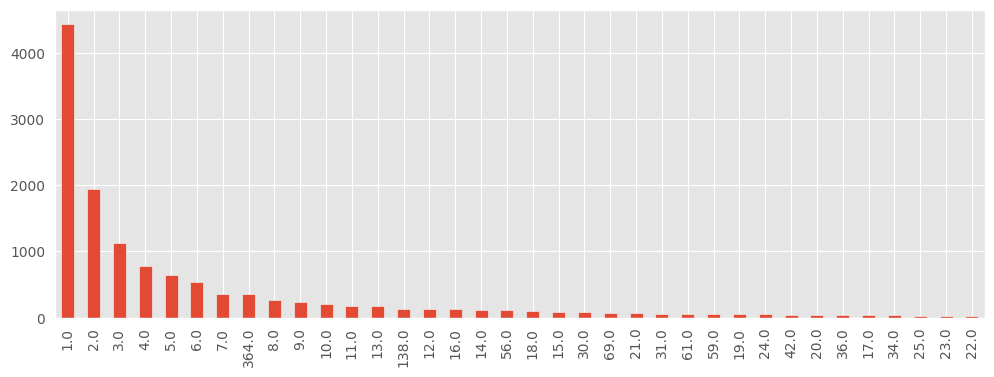

In [ ]:
data['duplicate_count'].value_counts().plot(kind='bar', figsize=(12,4), grid=True)

Чаще всего строки имеют небольшое количество дубликатов - от 1 до 10, это вполне укладывается в количество продаж модели определенной модификации в течении месяца. А строк с большим количеством дубликатов немного, и мы их объяснили большими оптовыми покупками.
Таким образом выяснили, что данные верные и дубликаты удалять не будем.

### Анализ числовых столбцов.

Смотрим на общую статистику:

In [ ]:
data.describe()

engine_volume      quantity      price_usd  sell_price_usd  \
count   37559.000000  39966.000000   39966.000000    3.996600e+04   
mean        2.262577      1.348196   28250.157462    3.375945e+04   
std         0.877733      2.372886   20005.756629    5.070127e+04   
min         1.200000      1.000000    7100.000000    0.000000e+00   
25%         1.600000      1.000000   15518.499690    1.660193e+04   
50%         2.000000      1.000000   24282.267910    2.624896e+04   
75%         2.500000      1.000000   32505.655770    3.500000e+04   
max        13.000000    115.000000  328510.970600    3.778206e+06   

       duplicate_count  
count     12824.000000  
mean         17.769495  
std          61.616278  
min           1.000000  
25%           1.000000  
50%           3.000000  
75%           7.000000  
max         364.000000

Объем двигателя от 0 (обусловлено пропусками в данных) до13 л.

Кол-во, купеленное за одну сделку от 1 до 115 автомобилей.

Цена в рамках одной сделки - от 7 100 до 328 511 USD.

Максимальная продажа - 3 778 206 USD.

Изучим уровень корреляции между столбцами:

Text(0.5, 1.0, 'Уровень корреляции между столбцами')

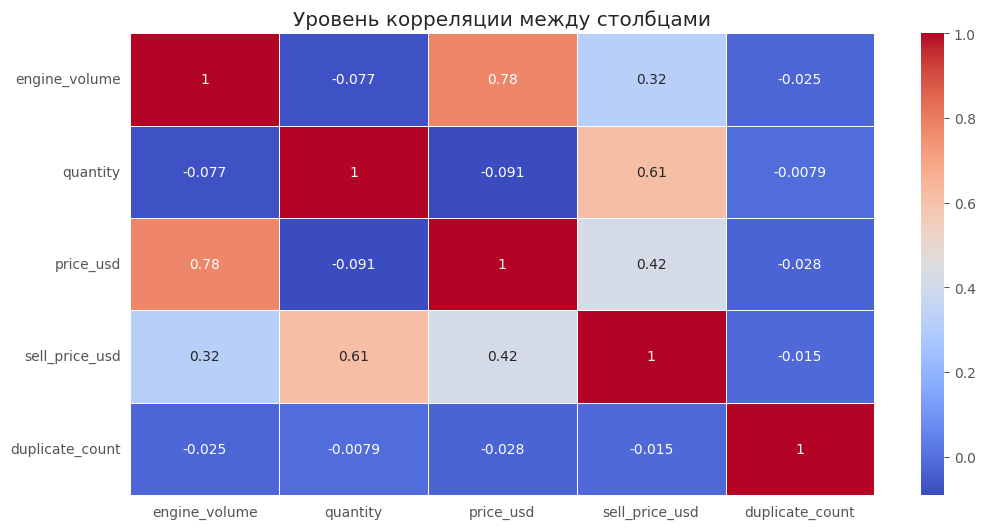

In [ ]:
plt.figure(figsize=(12,6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Уровень корреляции между столбцами')

Есть корреляция выше среднего: quantity/sell_price_usd, что вполне понятно.
Также есть высокая корреляция price_usd/engine_volume, что тоже логично.
Но также видим, что sell_price_usd меньше зависит от engine_volume, вероятно есть большие заказы среди автомобителей с маленьким объемом.
Есть корреляция между price_usd и sell_price_usd, и это понятно.

Остальные корреляции незначительны.

Изучим каждый цифровой столбец в отдельности:

#### quantity

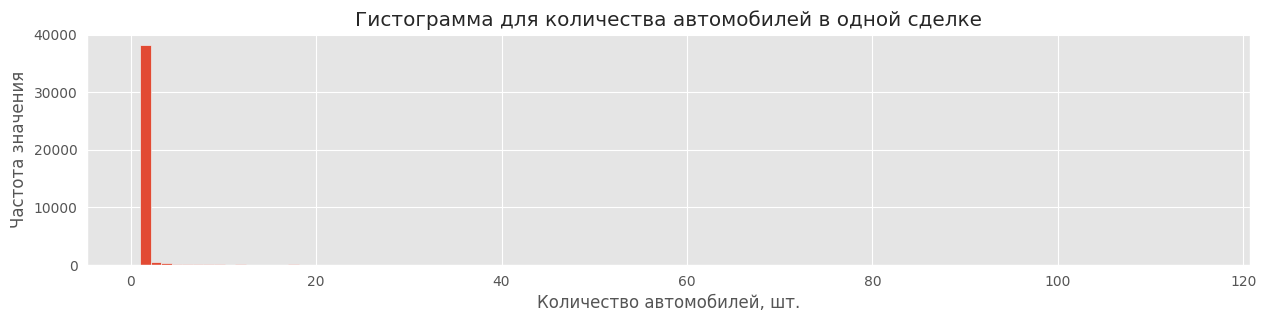

In [ ]:
data.quantity.hist(figsize=(15,3), bins=100)
plt.title('Гистограмма для количества автомобилей в одной сделке')
plt.xlabel('Количество автомобилей, шт.')
plt.ylabel('Частота значения')
plt.show()

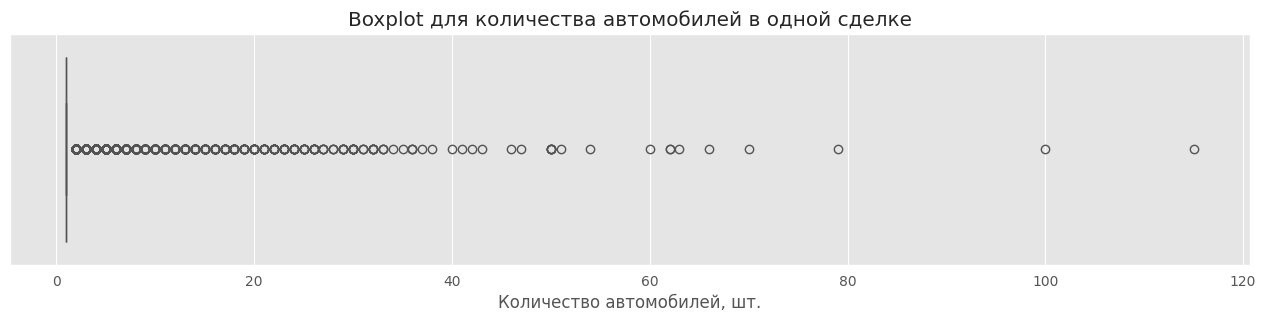

In [ ]:
plt.figure(figsize=(16, 3))
sns.boxplot(x=data['quantity'])
plt.title('Boxplot для количества автомобилей в одной сделке')
plt.xlabel('Количество автомобилей, шт.')
plt.show()

Наиболее частые сделки с одним автомобилем, но есть и оптовые сделки, исчисляющиеся десятками и сотнями автомобилей.

Посмотрим модели, которые покупают большими партиями:

In [ ]:
display("Самые дорогие заказы с количеством авто в чеке больше 50:",data[['brand','model', 'quantity','sell_price_usd']].sort_values(by='sell_price_usd',ascending=False).head(15))
display("Модели, которые чаще всего покупают большими партиями:", data[['brand','model', 'quantity']].sort_values(by='quantity',ascending = False).head(30))

'Самые дорогие заказы с количеством авто в чеке больше 50:'

brand      model  quantity  sell_price_usd
39561         Daewoo     BC 095        50    3.778206e+06
39553         Daewoo  BC 211 MA        30    3.157812e+06
39560         Daewoo     BC 095        30    2.277368e+06
20218            MAN         TG        20    2.004333e+06
25555          Skoda    Octavia       100    1.870000e+06
20214            MAN         TG        10    1.477016e+06
20222            MAN         TG        14    1.400791e+06
38408     Volkswagen       Polo        79    1.261460e+06
38710         Daewoo   BS 106 D        16    1.199778e+06
20349  Mercedes-Benz    G-Class         7    1.156569e+06
20358  Mercedes-Benz    G-Class         7    1.142559e+06
13699            Jac         S3        70    1.092977e+06
16885           Lada        4x4       115    1.035000e+06
38423     Volkswagen       Polo        62    9.780142e+05
38424     Volkswagen       Polo        62    9.771019e+05

'Модели, которые чаще всего покупают большими партиями:'

brand    model  quantity
16885        Lada      4x4       115
25555       Skoda  Octavia       100
38408  Volkswagen     Polo        79
13699         Jac       S3        70
16968        Lada      4x4        66
16299         Kia      Rio        63
38424  Volkswagen     Polo        62
38423  Volkswagen     Polo        62
16363         Kia      Rio        60
16858        Lada      4x4        54
17525        Lada   Largus        51
39561      Daewoo   BC 095        50
17684        Lada   Largus        50
17102        Lada   Granta        50
17194        Lada   Granta        50
17031        Lada   Granta        50
16949        Lada      4x4        47
16913        Lada      4x4        46
17389        Lada   Granta        43
17575        Lada   Largus        42
17661        Lada   Largus        41
17347        Lada   Granta        40
17606        Lada   Largus        38
16015         Kia   Cerato        37
17093        Lada   Granta        36
17253        Lada   Granta        36
17404        Lada   Granta        36
16847        Lada      4x4        35
17306        Lada   Granta        34
16943        Lada      4x4        33

Очень больших заказов (от 50 машин ) немного.

Самый дорогой заказ 3млн 778тыс. долларов - 50 штук Daewoo BC095 (городской автобус среднего класса).

Самые дорогие оптовые заказы: городские автобусы и грузовики.

В количественном выражении больше всего оптом покупают бюджетные и средние варианты: Lada, Skoda	Octavia, Volkswagen Polo,Jac S3, Kia Rio.

Выбросы не похожи на аномалии, потому что наибольшие суммы в чеках - это оптовые продажами от 7 до 115 штук и значения выглядят соответственно ценам.

#### price_usd

 Создадим для удобства визуализации новый столбец для значений цены в тысячах USD:

In [ ]:
data.price_usd_mil = data.price_usd / 1000

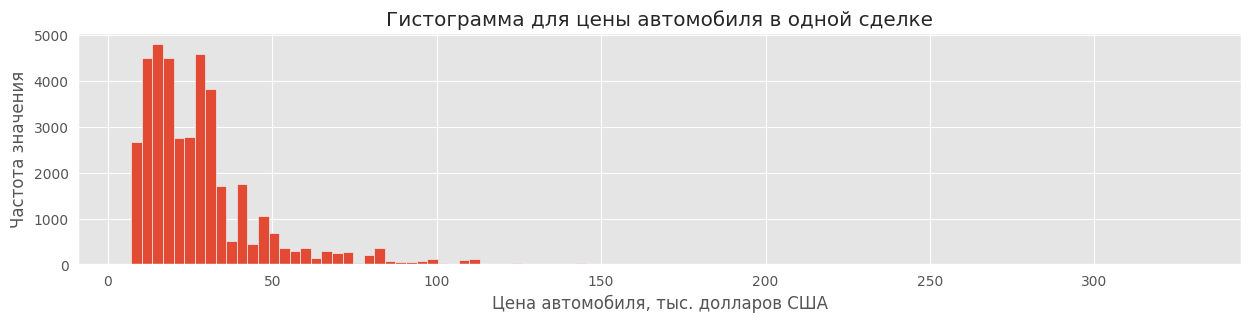

In [ ]:
data.price_usd_mil.hist(figsize=(15,3), bins=100)
plt.title('Гистограмма для цены автомобиля в одной сделке')
plt.xlabel('Цена автомобиля, тыс. долларов США')
plt.ylabel('Частота значения')
plt.show()

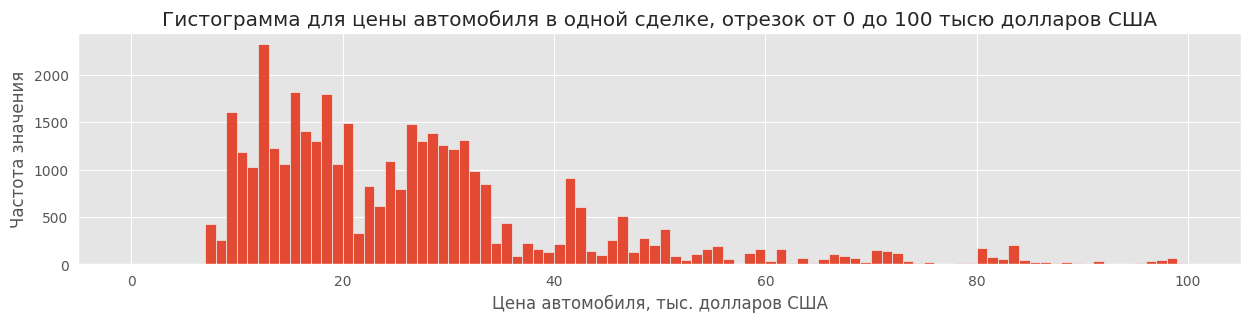

In [ ]:
data.price_usd_mil.hist(figsize=(15,3), bins=100, range=(0,100))
plt.title('Гистограмма для цены автомобиля в одной сделке, отрезок от 0 до 100 тысю долларов США')
plt.xlabel('Цена автомобиля, тыс. долларов США')
plt.ylabel('Частота значения')
plt.show()

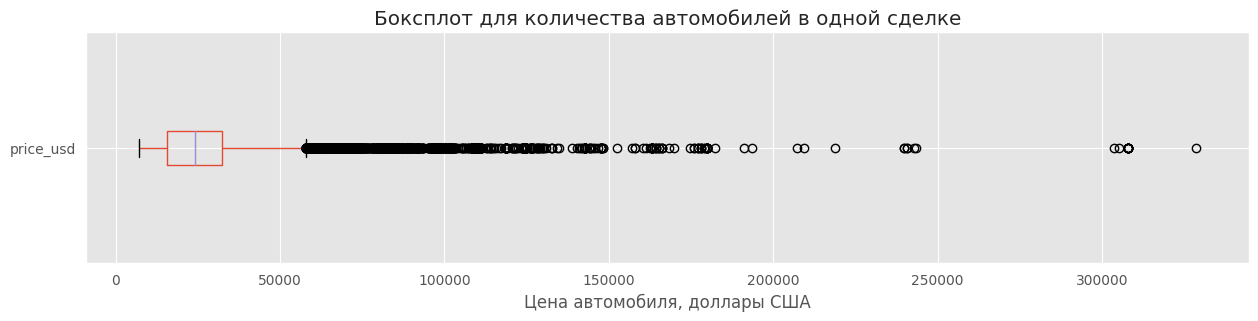

In [ ]:
data.boxplot('price_usd', vert=False, figsize=(15,3));
plt.title('Боксплот для количества автомобилей в одной сделке')
plt.xlabel('Цена автомобиля, доллары США')
plt.show()

Чаще всего встречаются заказы от 15 500 до 32 500 долларов, медианный чек 28 250 долларов. Присутствует плотная полоса выбросов в пределах до 328 500 долларов.

#### sell_price_usd

In [ ]:
data.sell_price_usd_mil = data.price_usd / 1000

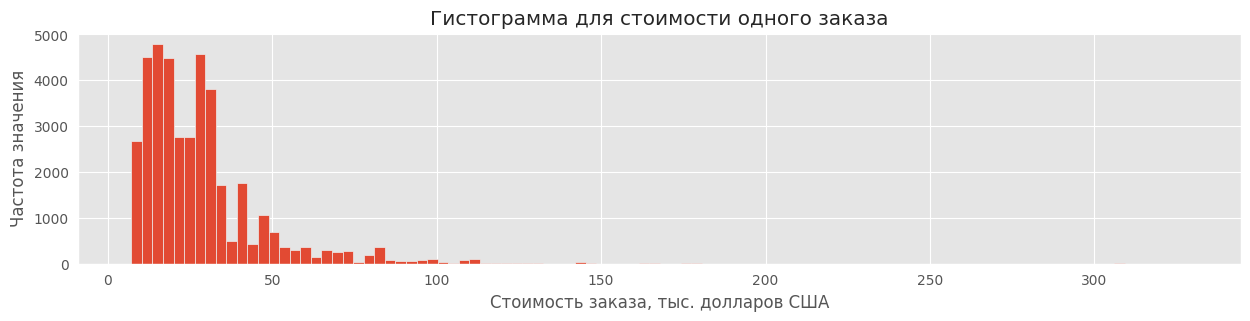

In [ ]:
data.sell_price_usd_mil.hist(figsize=(15,3), bins=100)
plt.title('Гистограмма для стоимости одного заказа')
plt.xlabel('Стоимость заказа, тыс. долларов США')
plt.ylabel('Частота значения')
plt.show()

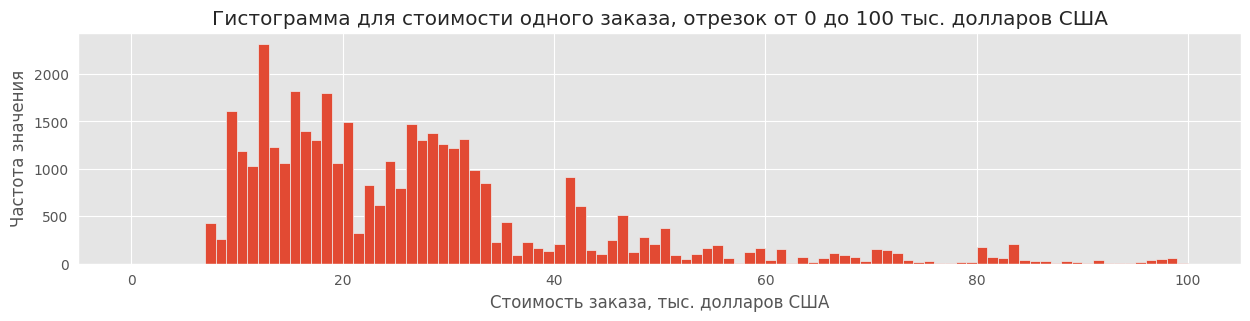

In [ ]:
data.sell_price_usd_mil.hist(figsize=(15,3), bins=100, range=(0,100))
plt.title('Гистограмма для стоимости одного заказа, отрезок от 0 до 100 тыс. долларов США')
plt.xlabel('Стоимость заказа, тыс. долларов США')
plt.ylabel('Частота значения')
plt.show()

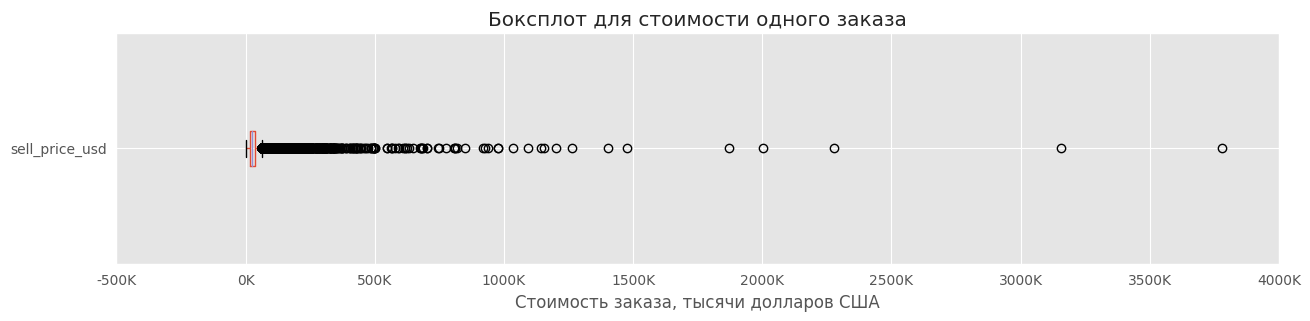

In [ ]:
data.boxplot('sell_price_usd', vert=False, figsize=(15,3));

# Convert tick labels to thousands
plt.xticks(plt.xticks()[0], [f'{int(x/1000)}K' for x in plt.xticks()[0]])

plt.title('Боксплот для стоимости одного заказа')
plt.xlabel('Стоимость заказа, тысячи долларов США')
plt.show()

Наиболее частотные значения стоимости заказа находятся примерно на том же уровне, что и цена одного автомобиля - потому что самая частая сделка - это покупка одного автомобиля. Также есть инетересные выбросы с очень большой суммой продажи, вероятно это были очень крупные заказы - посмотрим на эти записи

In [ ]:
data.loc[data.sell_price_usd > 1000000,
            ['brand', 'model', 'price_usd','quantity','sell_price_usd']].sort_values(by='sell_price_usd',
                                                                                             ascending=False)

brand      model     price_usd  quantity  sell_price_usd
39561         Daewoo     BC 095   75564.12528        50     3778206.264
39553         Daewoo  BC 211 MA  105260.38790        30     3157811.637
39560         Daewoo     BC 095   75912.25590        30     2277367.677
20218            MAN         TG  100216.63130        20     2004332.626
25555          Skoda    Octavia   18700.00000       100     1870000.000
20214            MAN         TG  147701.63540        10     1477016.354
20222            MAN         TG  100056.48350        14     1400790.769
38408     Volkswagen       Polo   15967.84791        79     1261459.985
38710         Daewoo   BS 106 D   74986.11074        16     1199777.772
20349  Mercedes-Benz    G-Class  165224.10220         7     1156568.715
20358  Mercedes-Benz    G-Class  163222.67930         7     1142558.755
13699            Jac         S3   15613.95351        70     1092976.745
16885           Lada        4x4    9000.00000       115     1035000.000

Да, действительно, видим большие оптовые заказы.

#### engine_volume

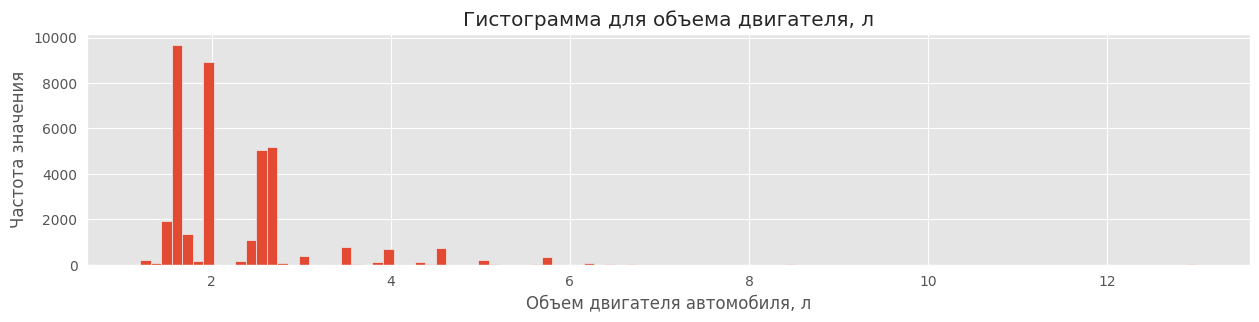

In [ ]:
data.engine_volume.hist(figsize=(15,3), bins=100)
plt.title('Гистограмма для объема двигателя, л')
plt.xlabel('Объем двигателя автомобиля, л')
plt.ylabel('Частота значения')
plt.show()

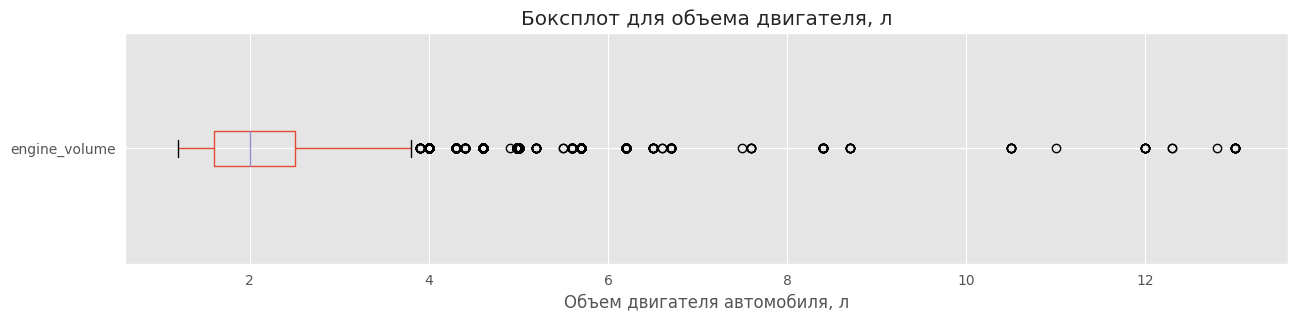

In [ ]:
data.boxplot('engine_volume', vert=False, figsize=(15,3));
plt.title('Боксплот для объема двигателя, л')
plt.xlabel('Объем двигателя автомобиля, л')
plt.show()

Чаще всего продаются автомобили с объемом двигателя от 1,7 до 2,7 л. Редкие выбросы до 13 л.
Посмотрим на продажи с объемом двигателя > 4 л:

In [ ]:
data.query('engine_volume > 4.0')[['brand','model','engine_volume','class_2013']].drop_duplicates()

brand              model  engine_volume  \
43               BMW            5 серия           4.40   
63               BMW            7 серия           4.40   
64               BMW            7 серия           6.60   
146              BMW                 X5           4.40   
190              BMW                 X6           4.40   
198              BMW                 X7           4.40   
831        Chevrolet              Tahoe           6.20   
1805             GAZ               3302           4.30   
2179             GAZ               3308           4.30   
2234             GAZ               3309           4.30   
2292             GAZ               Next           4.30   
9632         Hyundai             HD 170           7.50   
9699         Hyundai           Universe          12.30   
13031       Infiniti               QX80           5.60   
13146          Isuzu                NMR           8.70   
13238          Isuzu                NPR           5.20   
15040         Jaguar                 XF           5.00   
18727     Land Rover        Range Rover           5.00   
18823     Land Rover  Range Rover Sport           5.00   
19013          Lexus                 GX           4.60   
19046          Lexus                 LX           5.70   
20212            MAN                 TG          10.50   
20362  Mercedes-Benz            G-Class           5.50   
20386  Mercedes-Benz             Actros          12.00   
20387  Mercedes-Benz             Actros          12.80   
20389  Mercedes-Benz             Actros          11.00   
20402  Mercedes-Benz           Tourismo          12.00   
25430         Scania           G-Series          13.00   
25431         Scania           P-Series          13.00   
25433         Scania           R-Series          13.00   
26426         Toyota              Camry           4.60   
34928         Toyota              LC200           4.60   
38158     Volkswagen               Polo           8.70   
38783       Cadillac           Escalade           6.20   
39181         Scania           S-Series          13.00   
39183          Isuzu                NQR           5.20   
39395           Hino                500           7.60   
39439        Hyundai              HD 79           4.90   
39476            BMW            8 серия           4.40   
39508          Isuzu                NPS           5.20   
39597          ANKAI           HFF6850G           5.00   
39638          ANKAI           HFF6850G           4.98   
39809  Mercedes-Benz          GLE Coupe           5.50   
39828          ANKAI        HFF6127GZ-4           8.40   
39849         Yutong          ZK6108HGH           6.70   
39880         Yutong          ZK6108HGH           6.50   

                      class_2013  
43                       E класс  
63                       F класс  
64                       F класс  
146           Полноразмерные SUV  
190           Полноразмерные SUV  
198           Полноразмерные SUV  
831          Среднеразмерные SUV  
1805     Малотоннажные грузовики  
2179   Среднетоннажные грузовики  
2234     Малотоннажные грузовики  
2292     Малотоннажные грузовики  
9632   Среднетоннажные грузовики  
9699            Большие автобусы  
13031         Полноразмерные SUV  
13146    Малотоннажные грузовики  
13238    Малотоннажные грузовики  
15040                    E класс  
18727         Полноразмерные SUV  
18823        Среднеразмерные SUV  
19013         Полноразмерные SUV  
19046         Полноразмерные SUV  
20212  Крупнотоннажные грузовики  
20362         Полноразмерные SUV  
20386  Крупнотоннажные грузовики  
20387  Крупнотоннажные грузовики  
20389  Крупнотоннажные грузовики  
20402           Большие автобусы  
25430  Крупнотоннажные грузовики  
25431  Крупнотоннажные грузовики  
25433  Крупнотоннажные грузовики  
26426                    D класс  
34928         Полноразмерные SUV  
38158                    B класс  
38783         Полноразмерные SUV  
39181  Крупнотоннажные грузовики  
39183  Среднетоннажные грузо

Среди автомобилей с супер большими объемами двигателей представлены большие грузовики, большие автобусы, люксовые кроссоверы и седаны. Данные соответствуют моделям.

### Анализ категориальных столбцов.

Проведем первичный анализ категориальных значений по всему рынку - посмотрим на распределение по количеству заказов:

In [ ]:
data.columns

Index(['company', 'brand', 'model', 'modification', 'release_year',
       'manufacturing_country', 'fuel_type', 'engine_volume',
       'transmission_type', 'drive_type', 'segment', 'region', 'dealer',
       'client_type', 'payment_type', 'quantity', 'price_usd',
       'sell_price_usd', 'state', 'segment_2013', 'class_2013', 'segment_eng',
       'product_localization', 'month_name', 'sale_date', 'volume_cat',
       'duplicate_count'],
      dtype='object')

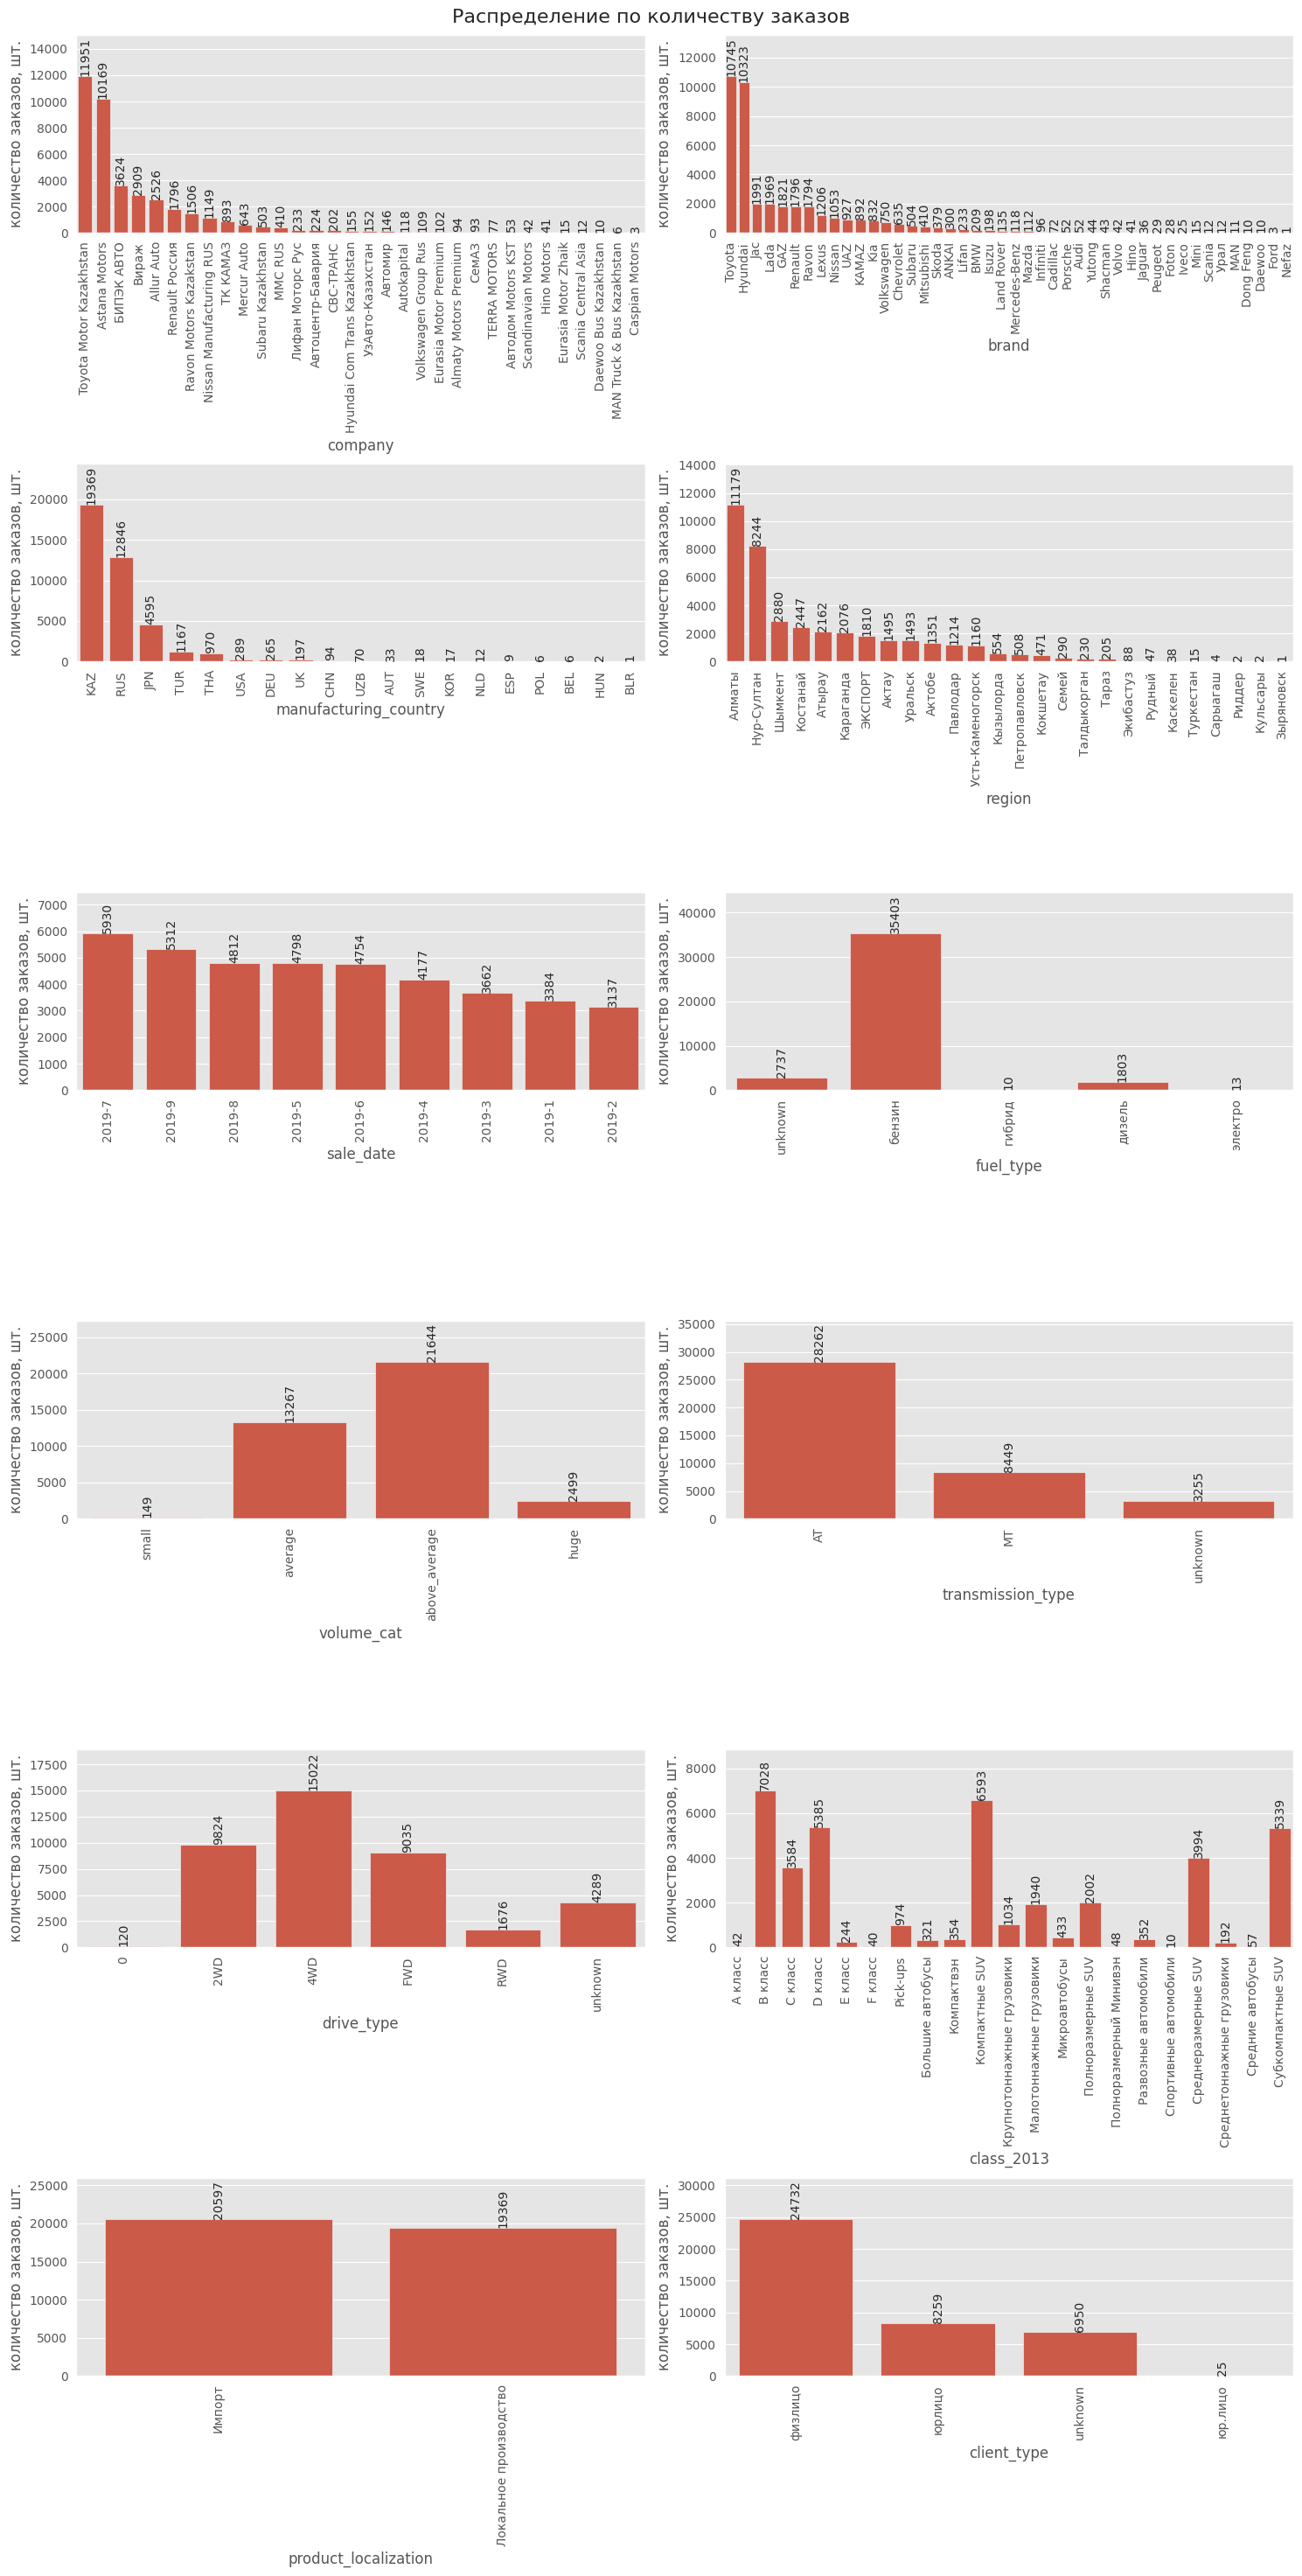

In [ ]:
# сохраним в отдельный список категориальные столбцы, для которых будем строить рейтинг
list_param = ['company','brand','manufacturing_country','region','sale_date','fuel_type', 'volume_cat',
            'transmission_type', 'drive_type','class_2013','product_localization','client_type']


# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика
count_plt_row = math.ceil(len(list_param)/2)

plt.figure(figsize=(15,5 * count_plt_row)).suptitle('Распределение по количеству заказов',
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот
for counter, i in enumerate(list_param):

    ax = plt.subplot(count_plt_row, 2, counter+1)

    df = data.groupby(i) \
                 .agg({'quantity':'count'}) \
                 .sort_values(by='quantity', ascending=False).reset_index()

    ax1 = sns.barplot(data=df,
                 y='quantity',
                 x=i)
    # вывод подписей на бары
    ax1.bar_label(ax.containers[0], rotation=90)

    ax1.set_ylim(ax1.get_ylim()[0],ax1.get_ylim()[1]+ax1.get_ylim()[1]/5)
    plt.ylabel('количество заказов, шт.')
    plt.xticks(rotation=90)

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.97)
plt.show()


По количеству заказов по всему датасету видим следующих лидеров:

- компания - лидер Тойота Мотор Казахстан, далее - Астана Моторс, БИПЭК Авто, Вираж и Allur Auto;
- бренд автомобиля - лидеры  Toyota и Hyundai, за ними с большим отставанием Jac, Lada и GAZ;
- страны-производители - лидирует местное производство,Казахстан, следом Россия, далее с большим отставанием Япония, Турция и Тайланд;
- регион продаж - лидеры Алматы и Нур-Султан, далее с отставанием в разы Шымкент, Костанай и Атерау.
- месяц продаж - больше всего продаж в июне, в августе и в сентябрь продажи просели, в мае и июне продажи на уровне августа;
- вид топлива - бензин с серьезным отрывом от остальных видов топлива;
- объем двигателя - больше всего
продается автомобилей со средним(1,2-1,8 л) и большим(1,8-3,5 л) объемом двигателя;
- трансмиссия - автоматов продается в разы больше, чем механики;
- тип привода - полный привод самый популярный, на втором месте автомобили с приводом на два колеса, на третьем переднеприводные автомобили. Автомобили с задним приводом продаются меньше всего.
- по сегментации - внедорожники и легковые автомобили
- по классу - В-класс, компактные SUV и субкомпактные SUV;
- импорт немного популярней, чем локальное производство;
- физические лица - основные покупатели, количество заказов юридических лиц меньше.

### Выводы

Мы исследовали корреляции между переменными, выявили выбросы и получили представление о распределении данных, используя статистические сводки и визуализации. Количественные и качественные характеристики набора данных были детально проанализированы с помощью различных графиков. Результаты дают полное представление о наборе данных и закладывают основу для более углубленных исследований авторынка Казахстана.

Также предварительный анализ показал, что:
- в Казахстане чаще всего производятся сделки с физическими лицами, которые покупают 1 автомобиль примущественно с бензиновым двигателем, В-класса, компактные и субкомпактные паркетники с автоматической коробкой передач.
- Больше всего продаж в центральных городах - Аламаты и Астане.
- Чаще всего продаются Toyota и Hyundai, компании лидеры по количеству продаж - Toyota Motors Kazakhstan и Astana Motors.
- Самые активный период продаж - с мая по сентябрь

## Часть 3. Анализ авторынка Казахстана.

Анализ рынка
емкость рынка автомобилей в денежном и количественном выражении;
марки-лидеры на рынке автомобилей;
динамика рынка, общая и по сегментам;
BFM-анализ
продажи в разрезе бренд/сегмент;
продажи по маркам;
продажи по регионам;
продажи автоцентров;
модели - лидеры рынка;
проверка гипотезы, что средняя стоимость покупки зависит от уровня развития региона (средней заработной платы по региону).

### Продажи на рынке Казахстана всех марок в денежном и количественном выражении

In [ ]:
print('Общая сумма продаж за девять месяцев 2019 года составляет: {:.2f} млн. долларов США'.format(data.sell_price_usd.sum()/1000000))

Общая сумма продаж за девять месяцев 2019 года составляет: 1349.23 млн. долларов США


In [ ]:
print(f'Общее количество проданных за девять месяцев 2019 года автомобилей составляет: {int(data.quantity.sum())}  шт.')

Общее количество проданных за девять месяцев 2019 года автомобилей составляет: 53882  шт.


По данным заказчика исследования, продажи за четвертый квартал составляют 40% от продаж за предыдущие три квартала.

Рассчитаем годовую емкость рынка:

In [ ]:
print('Общая сумма продаж за 2019 года составит: {:.2f} млн. долларов США'.format(data.sell_price_usd.sum()/1000000*1.4))

Общая сумма продаж за 2019 года составит: 1888.92 млн. долларов США


In [ ]:
print(f'Общее количество проданных за 2019 года автомобилей составит: {int(data.quantity.sum()*1.4)}  шт.')

Общее количество проданных за 2019 года автомобилей составит: 75434  шт.


### Динамика продаж в целом по рынку: в денежном и натуральном выражении (помесячно)

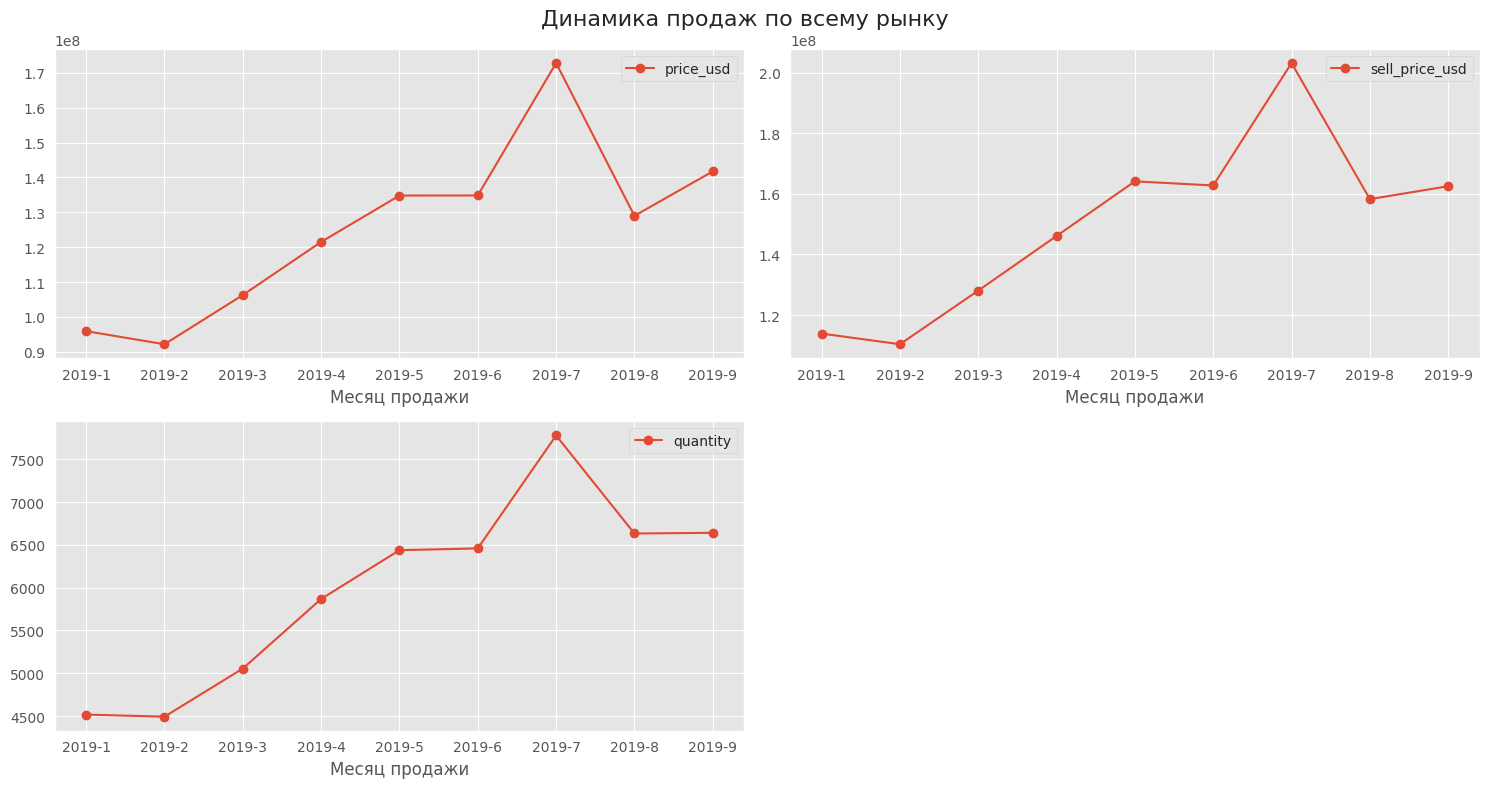

In [ ]:
# сохраним в отдельный список категориальные столбцы, для которых будем строить рейтинг
list_param = ['price_usd', 'sell_price_usd', 'quantity']

# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 2 графика
count_plt_row = math.ceil(len(list_param)/2)

plt.figure(figsize=(15, 4 * count_plt_row)).suptitle('Динамика продаж по всему рынку',
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот
for counter, i in enumerate(list_param):

    ax = plt.subplot(count_plt_row, 2, counter+1)
    df = data.groupby('sale_date').agg({i:'sum'})
    df.plot(ax=ax,
           marker='o',
           grid=True)
    plt.xlabel('Месяц продажи')

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.93)
plt.show()



### Динамика продаж по категориям (помесячно): тип топлива, класс, сегмент, регион

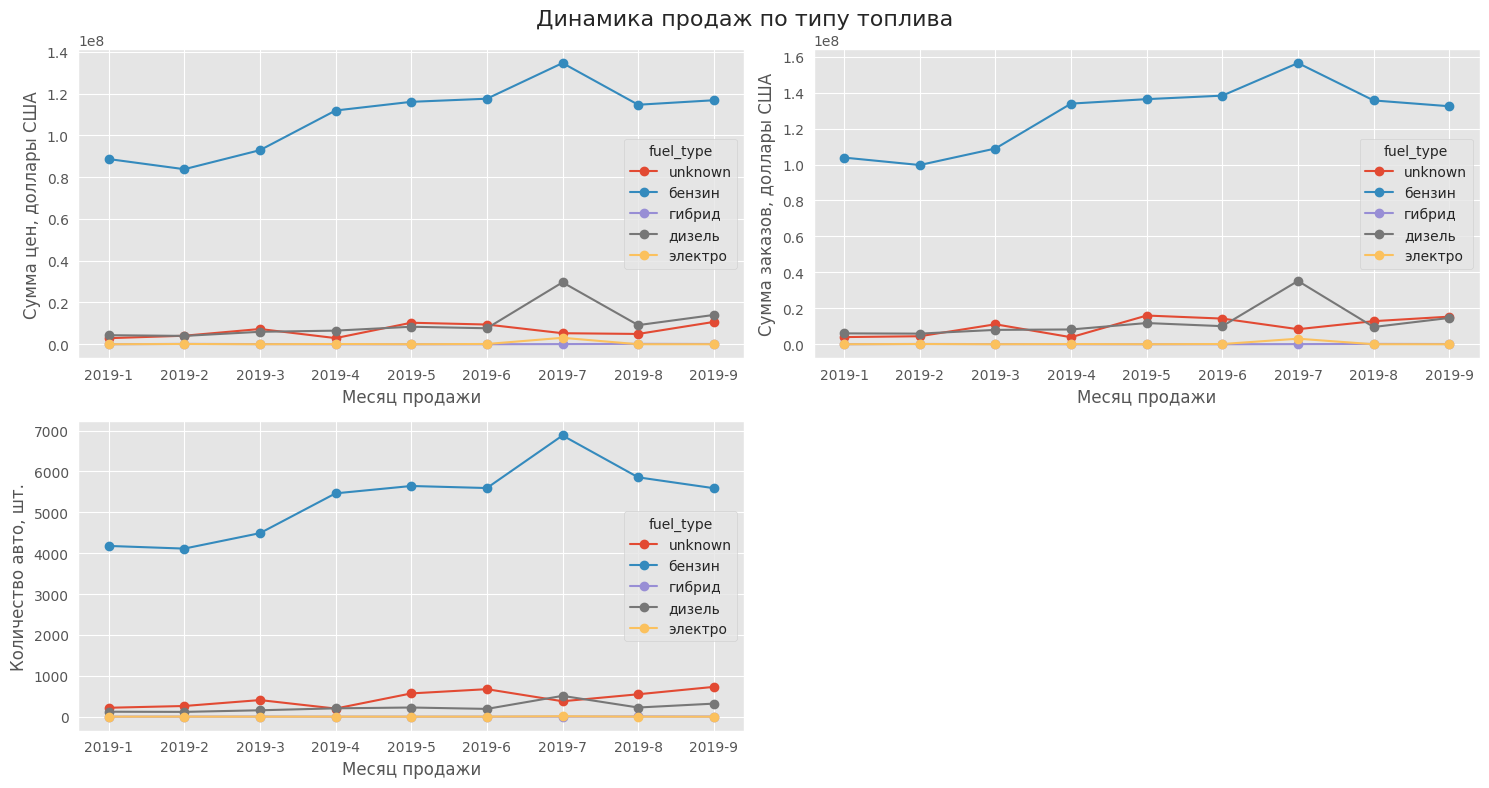

In [ ]:
# сохраним в отдельный список категориальные столбцы, для которых будем строить рейтинг
list_param = ['price_usd', 'sell_price_usd', 'quantity']

# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 2 графика
count_plt_row = math.ceil(len(list_param)/2)

plt.figure(figsize=(15, 4 * count_plt_row)).suptitle('Динамика продаж по типу топлива',
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот
for counter, i in enumerate(list_param):

    ax = plt.subplot(count_plt_row, 2, counter+1)

    df = data.pivot_table(index='sale_date',
                            columns='fuel_type',
                            values=i,
                            aggfunc='sum')

    df.plot(ax=ax,
           marker='o',
           grid=True)

    if (i == 'quantity'): plt.ylabel('Количество авто, шт.')
    if (i == 'price_usd'): plt.ylabel('Сумма цен, доллары США')
    if (i == 'sell_price_usd'): plt.ylabel('Сумма заказов, доллары США')
    plt.xlabel('Месяц продажи')

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.93)
plt.show()


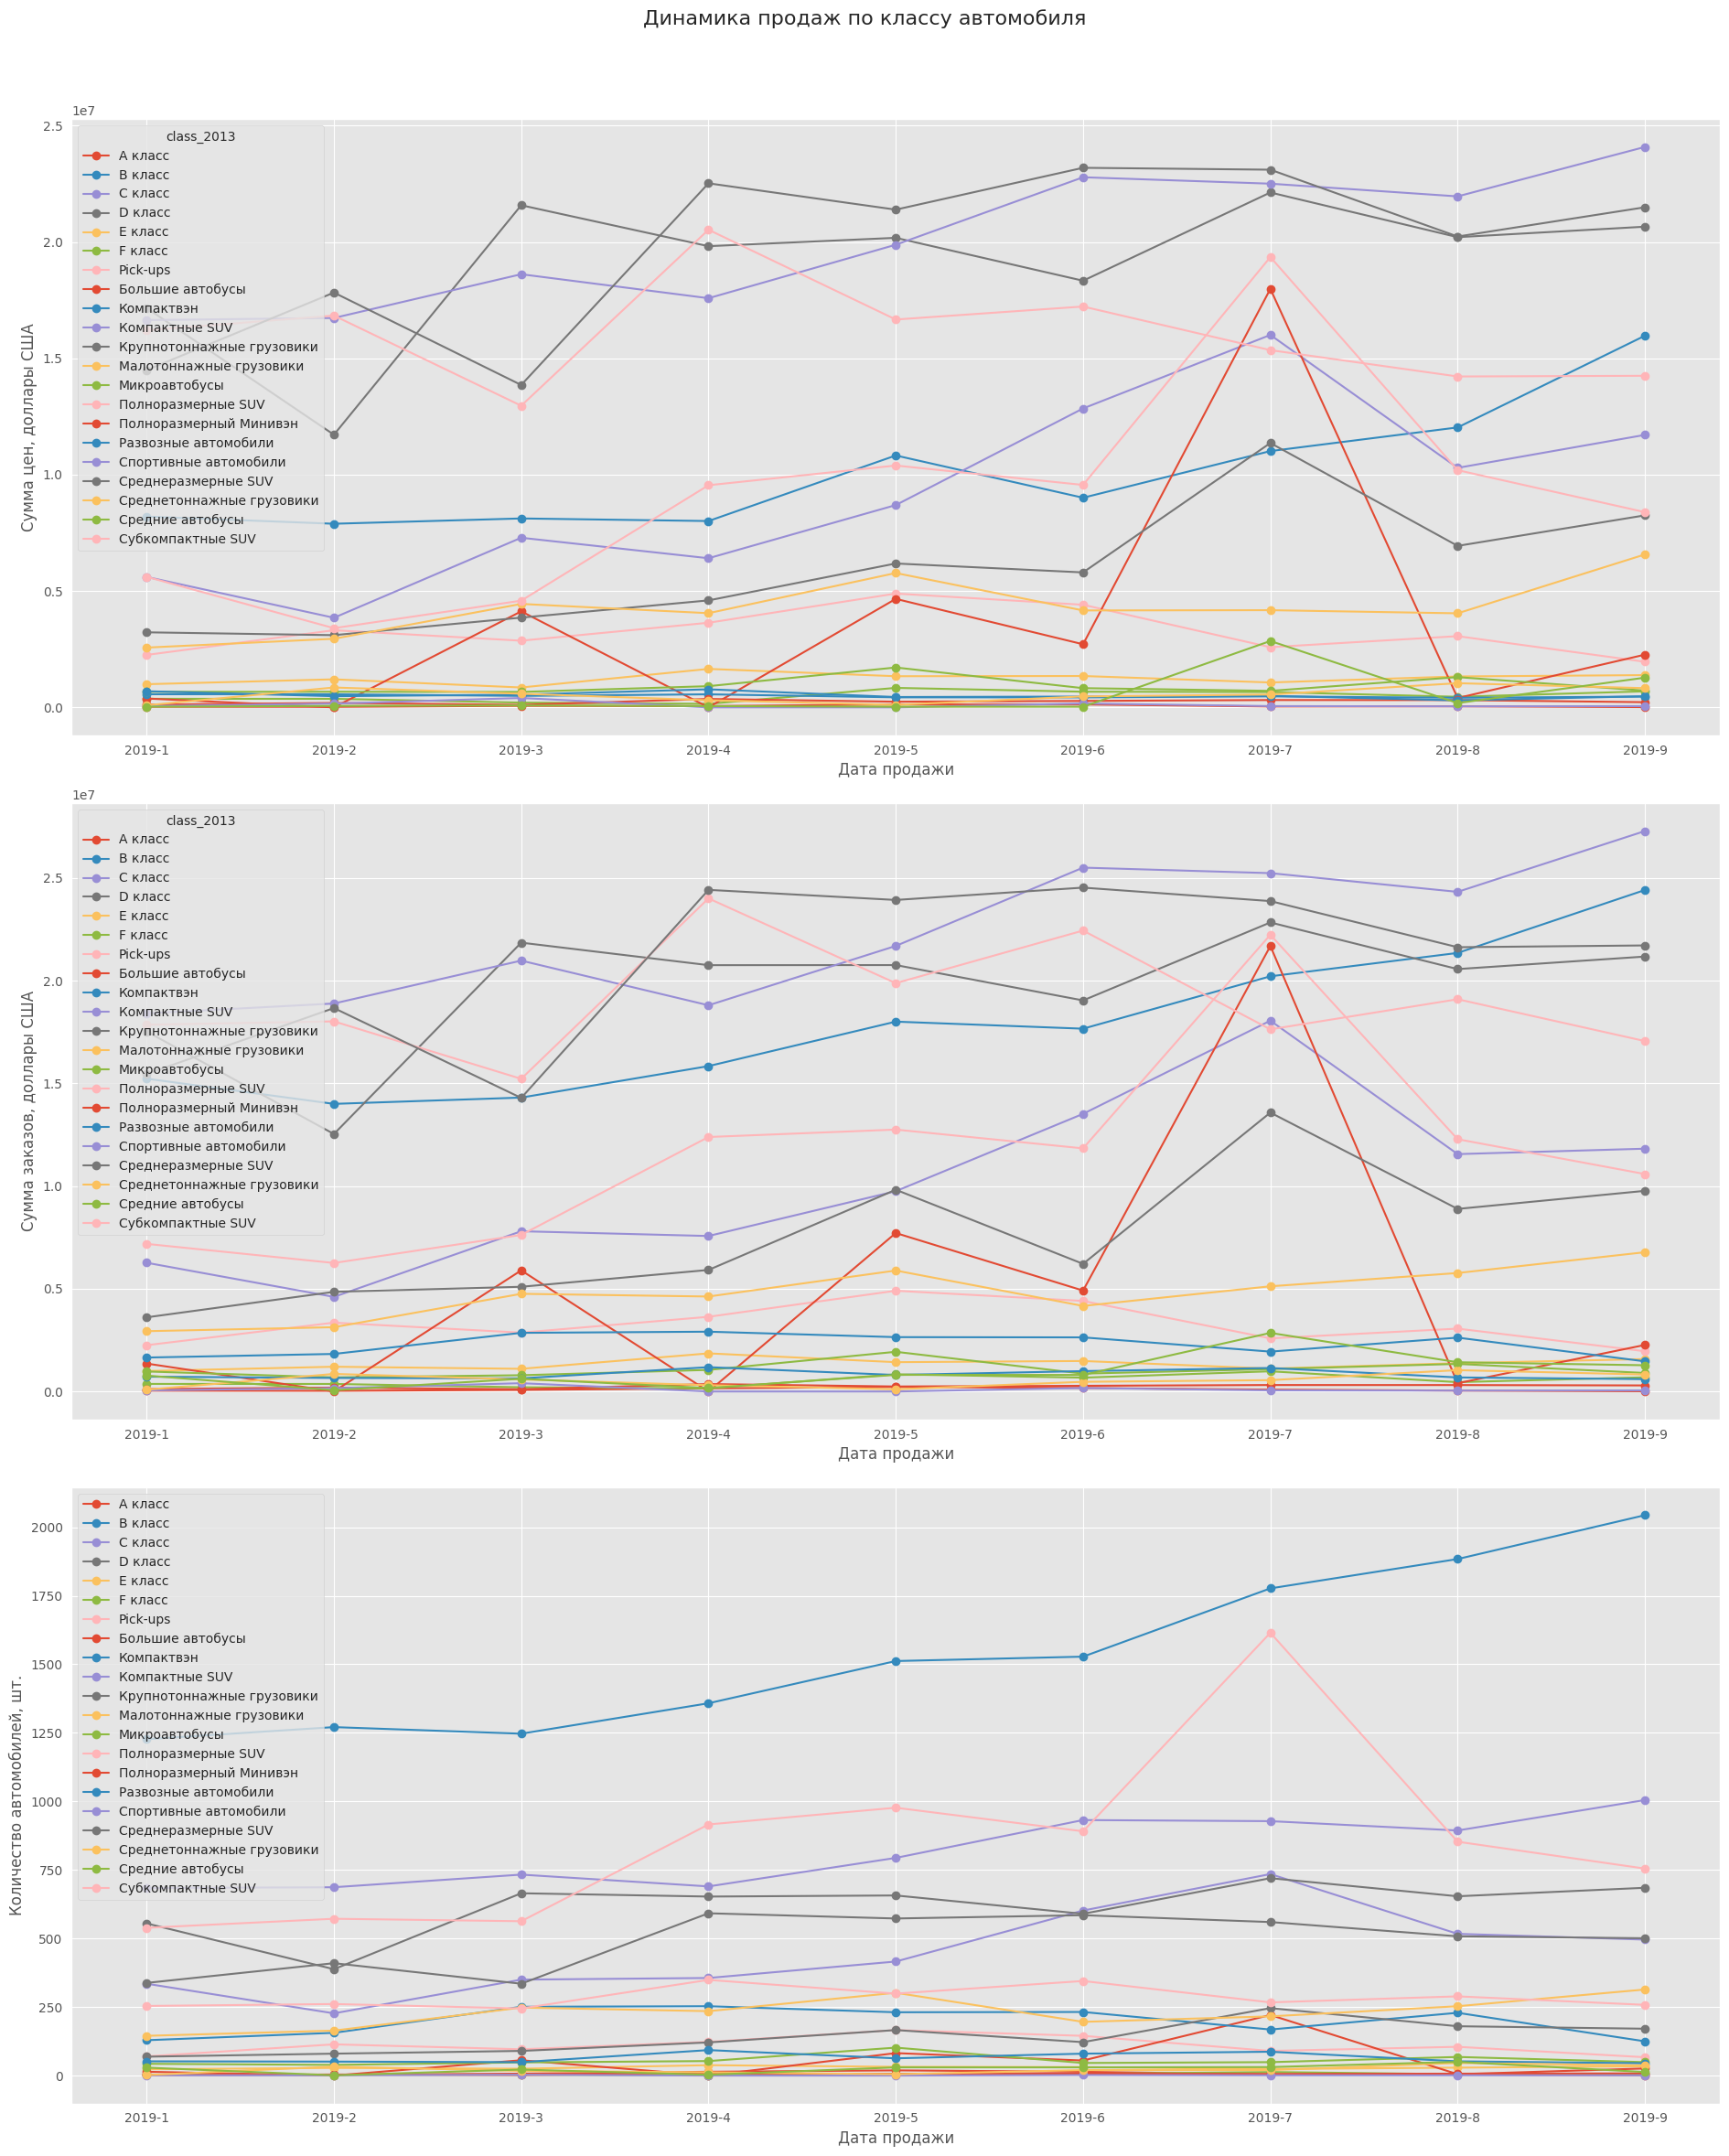

In [ ]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 1 графику
count_plt_row = math.ceil(len(list_param)/1)

plt.figure(figsize=(19, 8 * count_plt_row)).suptitle('Динамика продаж по классу автомобиля',
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот
df.plot(ax=ax, marker='o', grid=True, label='Метка_1')
for counter, i in enumerate(list_param):

    ax = plt.subplot(count_plt_row, 1, counter+1)

    df = data.pivot_table(index='sale_date',
                            columns='class_2013',
                            values=i,
                            aggfunc='sum')

    df.plot(ax=ax,
           marker='o',
           grid=True)
    if (i == 'quantity'): plt.ylabel('Количество автомобилей, шт.')
    if (i == 'price_usd'): plt.ylabel('Сумма цен, доллары США')
    if (i == 'sell_price_usd'): plt.ylabel('Сумма заказов, доллары США')
    plt.xlabel('Дата продажи')

# Добавим легенду для каждого графика
ax.legend(title='class_2013', fontsize='small')
plt.legend(loc='upper left')

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.93)
plt.show()


Динамика продаж по сегменту автомобиля:

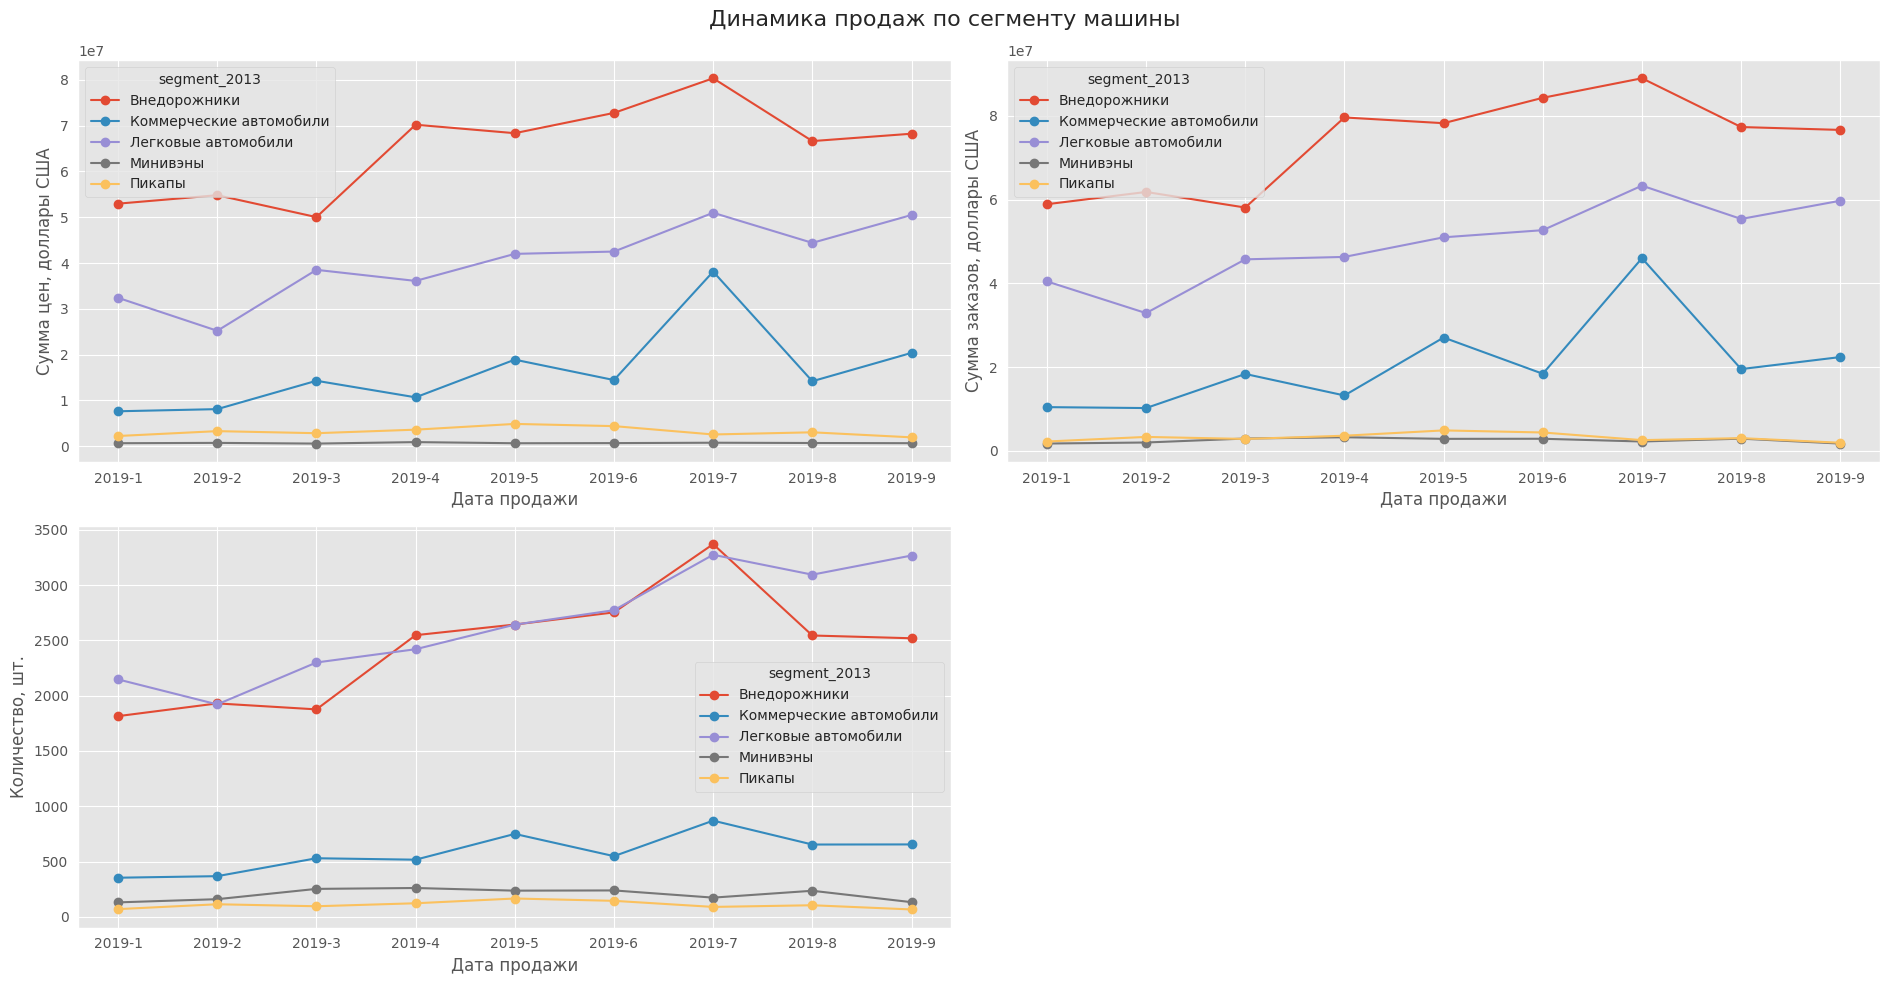

In [ ]:
# сохраним в отдельный список категориальные столбцы, для которых будем строить рейтинг
list_param = ['price_usd', 'sell_price_usd', 'quantity']

# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 2 графика
count_plt_row = math.ceil(len(list_param)/2)

plt.figure(figsize=(19, 5 * count_plt_row)).suptitle('Динамика продаж по сегменту машины',
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот
for counter, i in enumerate(list_param):

    ax = plt.subplot(count_plt_row, 2, counter+1)

    df = data.pivot_table(index='sale_date',
                            columns='segment_2013',
                            values=i,
                            aggfunc='sum')

    df.plot(ax=ax,
           marker='o',
           grid=True)
    if (i == 'quantity'): plt.ylabel('Количество, шт.')
    if (i == 'price_usd'): plt.ylabel('Сумма цен, доллары США')
    if (i == 'sell_price_usd'): plt.ylabel('Сумма заказов, доллары США')
    plt.xlabel('Дата продажи')

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.93)
plt.show()

Продажи по регионам

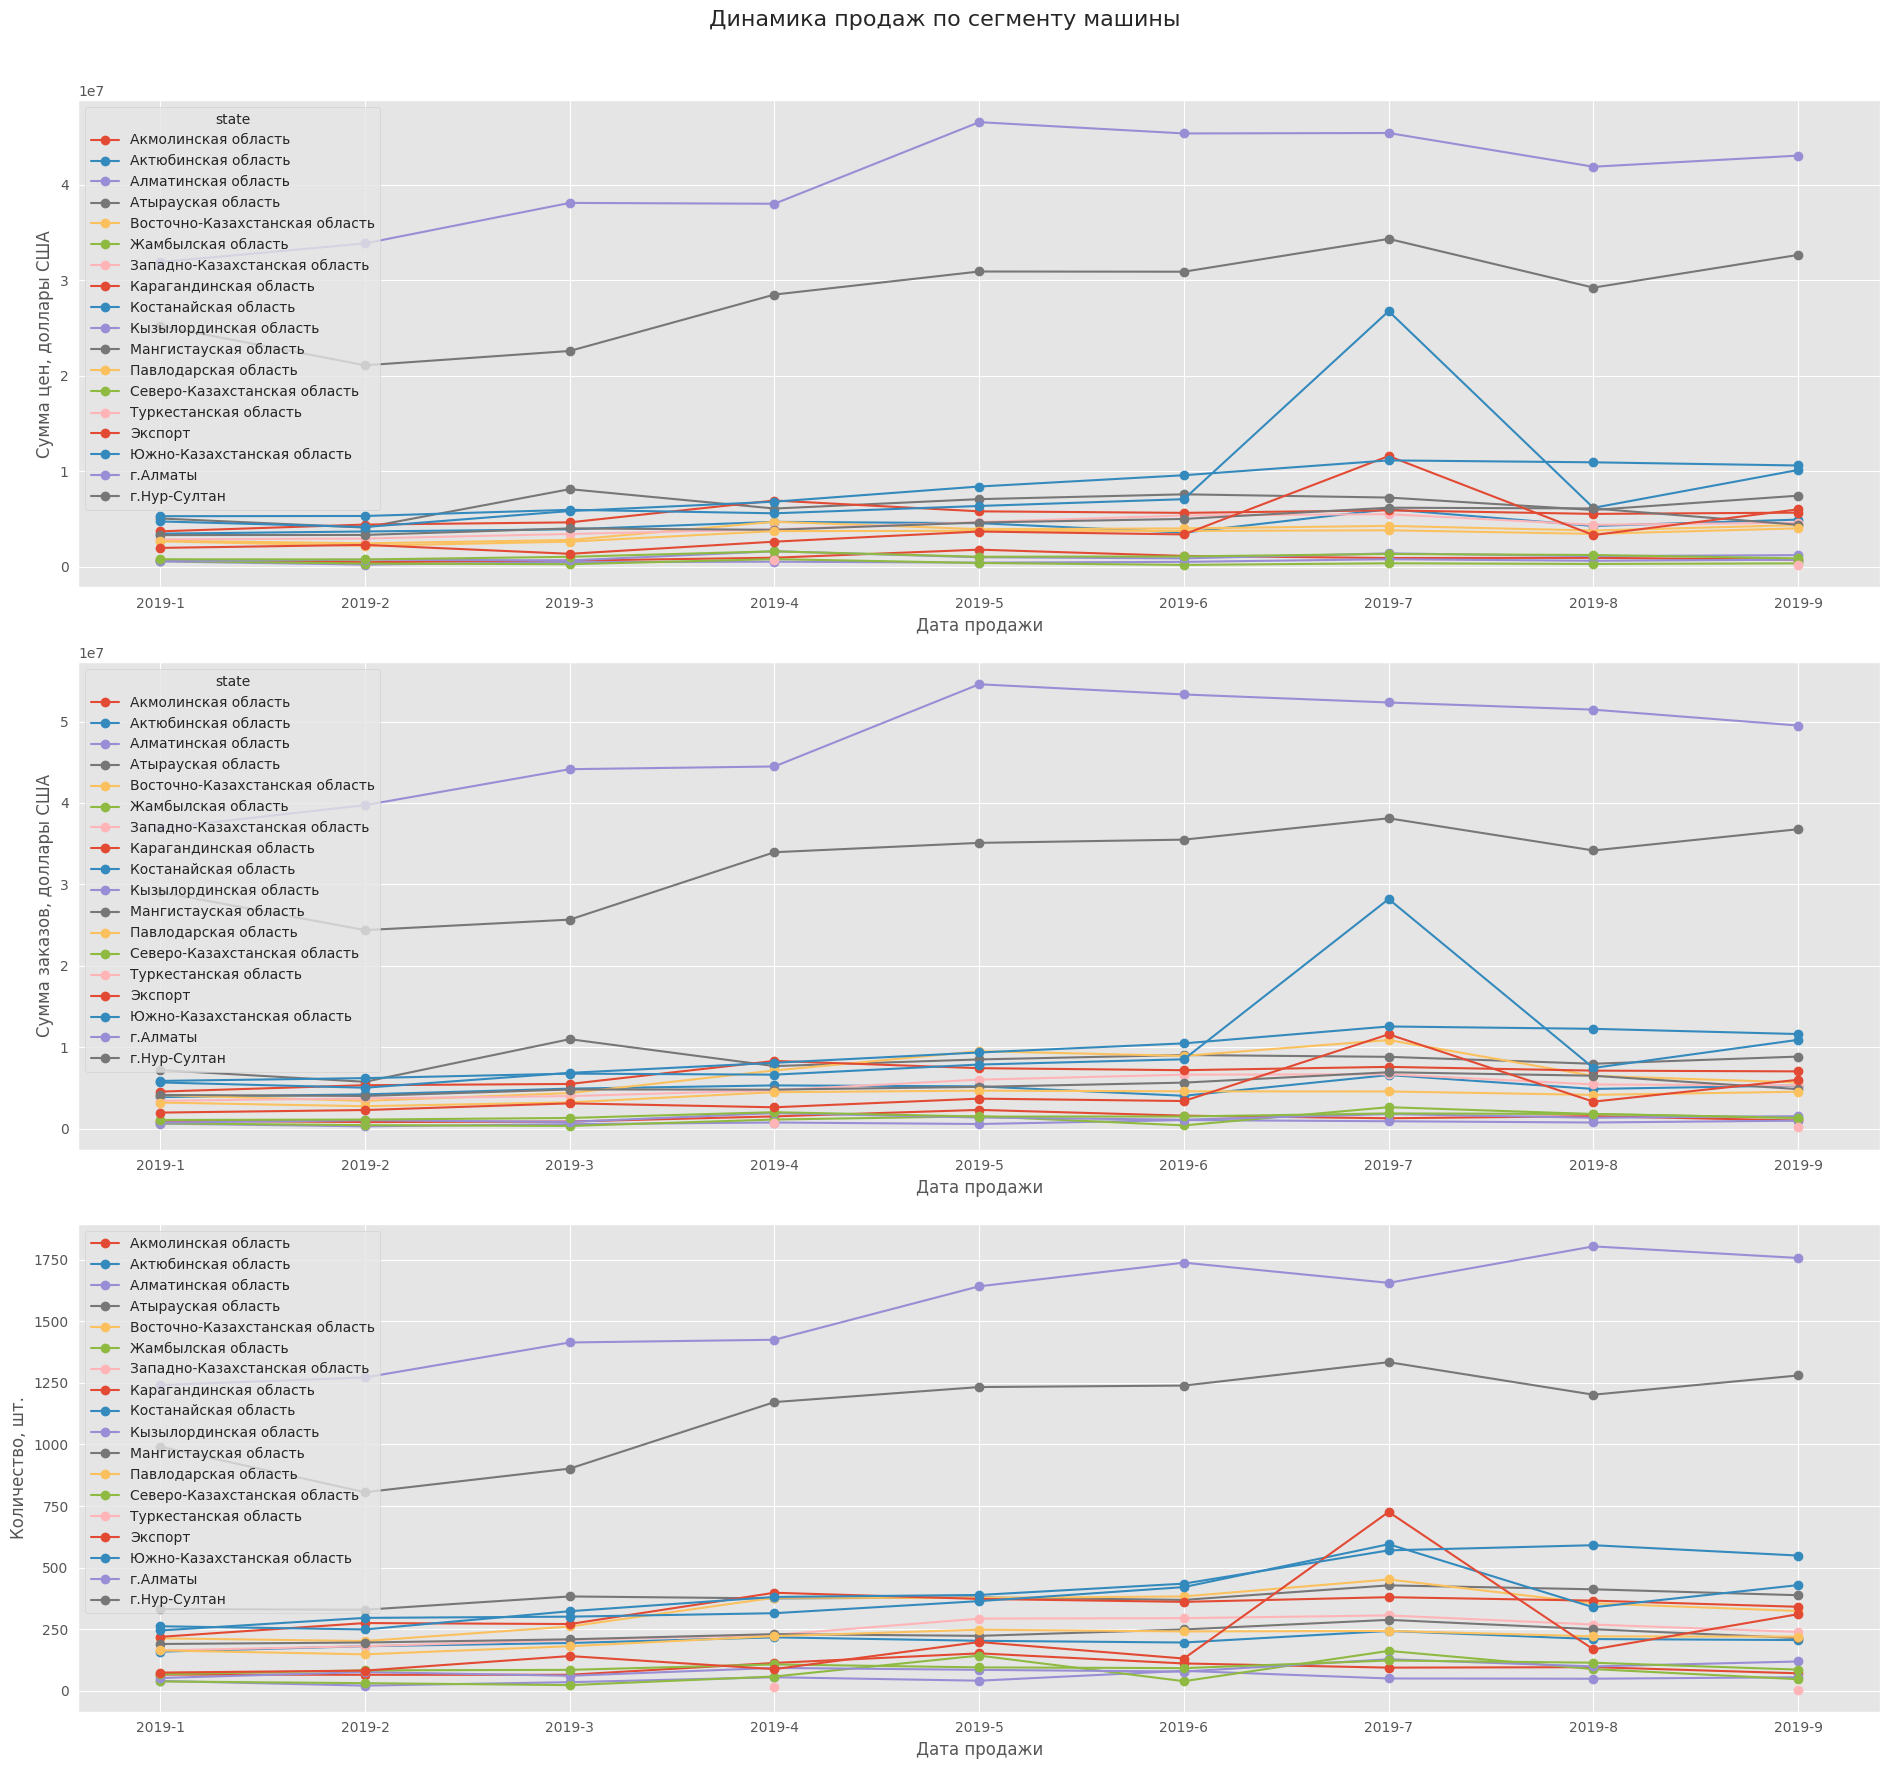

In [ ]:
# сохраним в отдельный список категориальные столбцы, для которых будем строить рейтинг
list_param = ['price_usd', 'sell_price_usd', 'quantity']

# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 2 графика
count_plt_row = math.ceil(len(list_param)/1)

plt.figure(figsize=(19,6 * count_plt_row)).suptitle('Динамика продаж по сегменту машины',
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот
for counter, i in enumerate(list_param):

    ax = plt.subplot(count_plt_row, 1, counter+1)

    df = data.pivot_table(index='sale_date',
                            columns='state',
                            values=i,
                            aggfunc='sum')

    df.plot(ax=ax,
           marker='o',
           grid=True)
    if (i == 'quantity'): plt.ylabel('Количество, шт.')
    if (i == 'price_usd'): plt.ylabel('Сумма цен, доллары США')
    if (i == 'sell_price_usd'): plt.ylabel('Сумма заказов, доллары США')
    plt.xlabel('Дата продажи')

    # Добавим легенду для каждого графика
ax.legend(title='state', fontsize='small')
plt.legend(loc='upper left')

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.93)
plt.show()

### Общее количество проданных автомобилей в разбивке:

#### По бренду и по классу

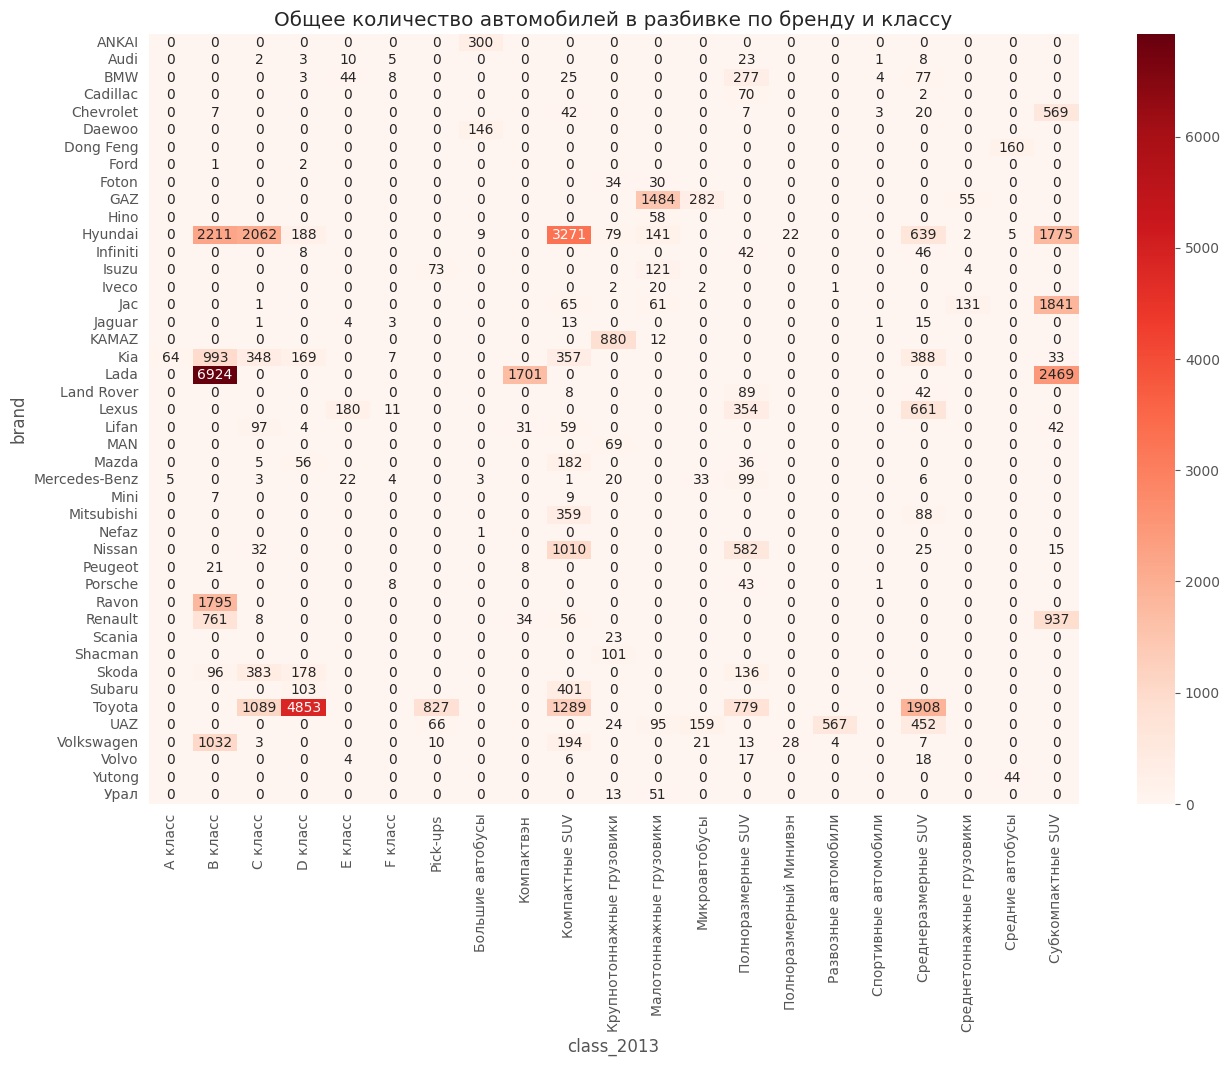

In [ ]:
df = data.pivot_table(index='brand',
                   columns='class_2013',
                   values='quantity',
                   aggfunc='sum').fillna(0).astype('float')

plt.figure(figsize=(15, 10))
sns.heatmap(df,
            fmt='g',
            annot = True,
            cmap='Reds')
plt.title('Общее количество автомобилей в разбивке по бренду и классу')
plt.show()

Больше всего было продано автомобилей бренда LADA B-класса (6924 шт.), Toyota D-класса (4853 шт.) и Huyndai класса компактные SUV (3271 шт.).

#### По типу трансмиссии и региону

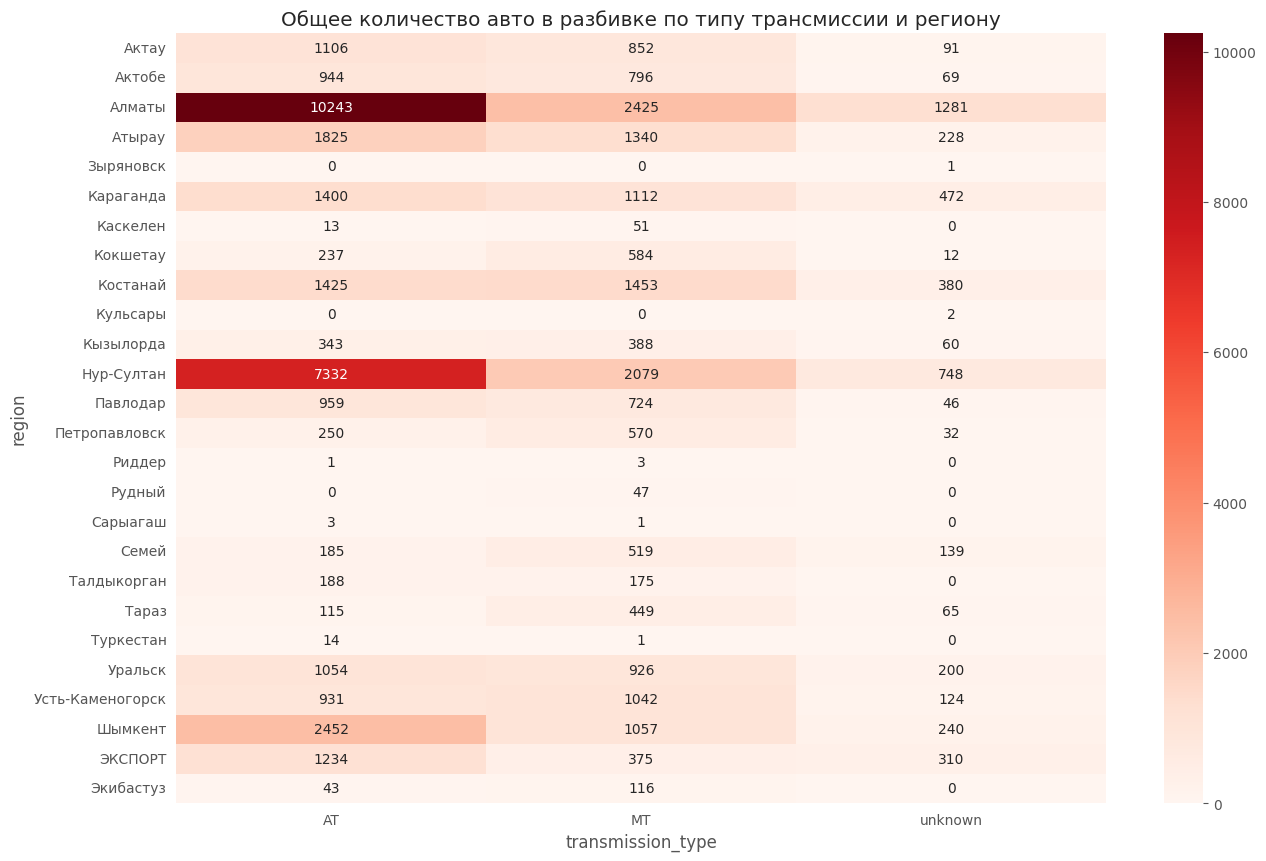

In [ ]:
df = data.pivot_table(index='region',
                   columns='transmission_type',
                   values='quantity',
                   aggfunc='sum').fillna(0).astype('float')

plt.figure(figsize=(15, 10))
sns.heatmap(df,
            fmt='g',
          annot = True,
           cmap='Reds')
plt.title('Общее количество авто в разбивке по типу трансмиссии и региону')
plt.show()

Самое большое количество продаж - в г. Алмааты по автомобилям с автоматической коробкой передач (10243 шт). На втором месте г.Нур-Султан, также автомобили на автомате (7332 шт.), на третьем месте Шымкент, продано 2452 шт. с автоматической еоробкой передач. Автомобилей с МКП продается значительно меньше.

#### По компании и региону

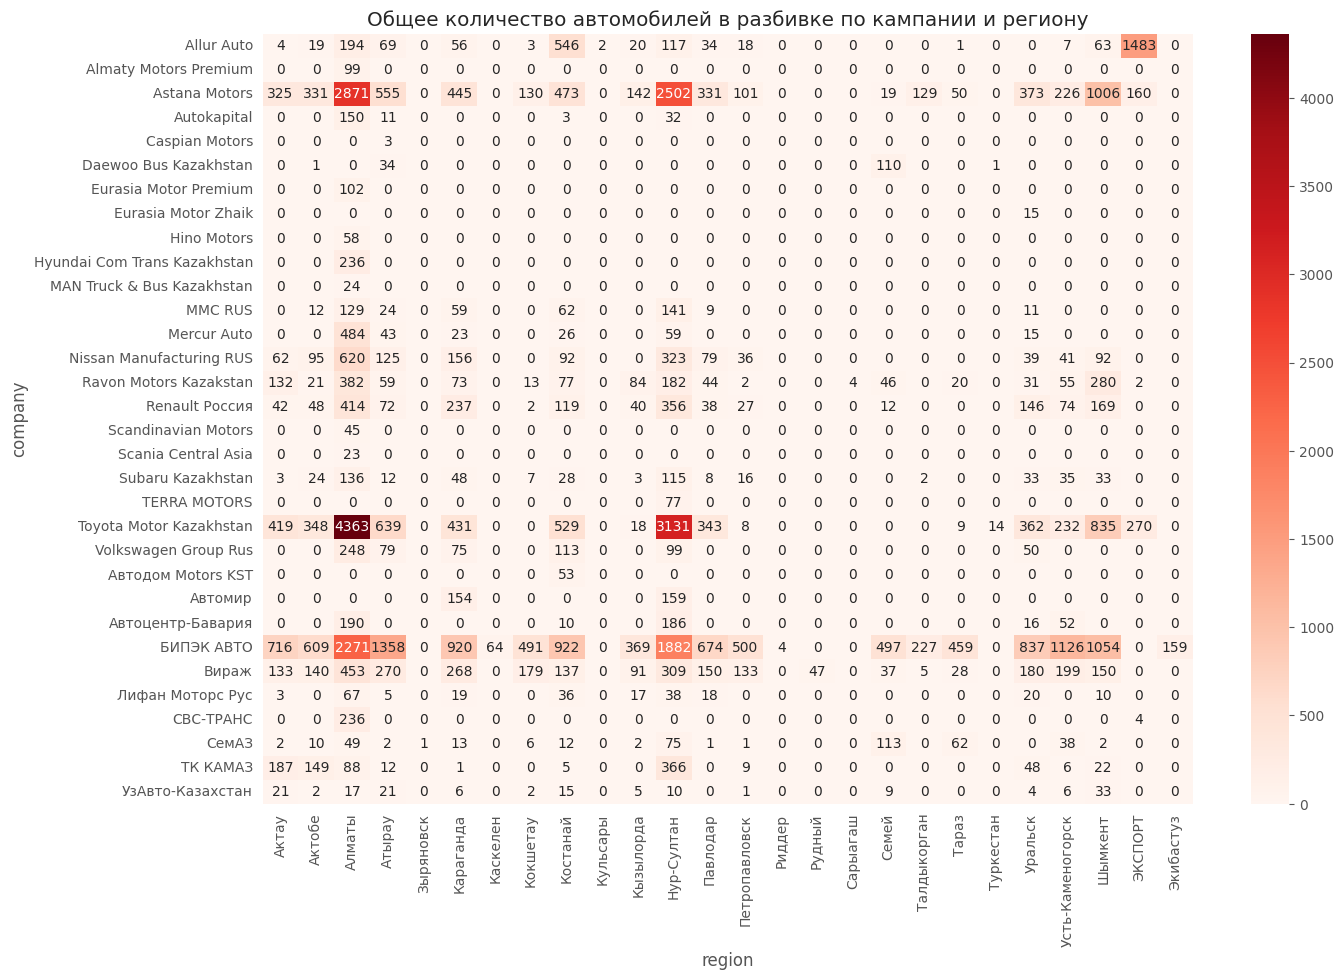

In [ ]:
df = data.pivot_table(index='region',
                   columns='company',
                   values='quantity',
                   aggfunc='sum').fillna(0).astype('float')

plt.figure(figsize=(15,10))
sns.heatmap(df.T,
            fmt='g',
          annot = True,
           cmap='Reds')
plt.title('Общее количество автомобилей в разбивке по компании и региону')
plt.show()

Лидеры рынка по количеству продаваемых автомобилей - Toyota Motor Kazakhstan и Астана Моторс, основные продажи идут в городах Алма-Аты и Нур-Султан.

## Часть 4. Анализ положения Mercur Auto

Анализ положения Mercur Auto

- выручка:  общая, - по маркам, средняя, ежемесячная, ежемесячная по маркам;

- продажи по регионам: общие, по маркам;

- конкурентный анализ;

- BSG-анализ (анализ продаж по моделям).

### 4.1 Рейтинг компаний-дилеров по продажам и место Mercur Auto:

Перед анализом Меркур выведем рейтинг по продажам среди компаний-дилеров и определим, где находится компания Mercur Auto

Выведем барплоты по количеству автомобилей, суммарным ценам и по суммарным стоимостям заказов:

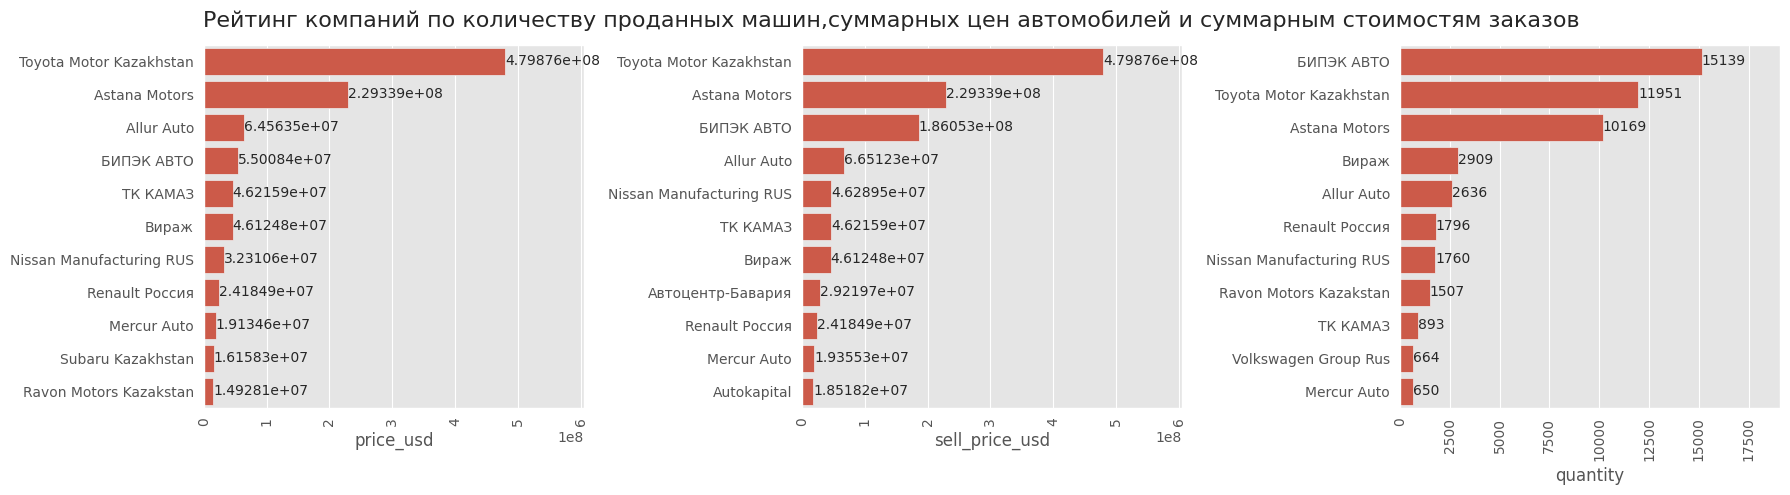

In [ ]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика
count_plt_row = math.ceil(len(list_param)/3)

plt.figure(figsize=(18, 5 * count_plt_row)).suptitle('Рейтинг компаний по количеству проданных машин,'
                                                     'суммарных цен автомобилей и суммарным стоимостям заказов ',
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот
for counter, i in enumerate(list_param):

    ax = plt.subplot(count_plt_row, 3, counter+1)

    df = data.groupby('company') \
                 .agg({i:'sum'}) \
                 .sort_values(by=i, ascending=False).reset_index()

    ax1 = sns.barplot(data=df.head(11),
                 y='company',
                 x=i,
                orient='h')
    # вывод подписей на бары
    ax1.bar_label(ax.containers[0])

    ax1.set_xlim(ax1.get_xlim()[0],ax1.get_xlim()[1]+ax1.get_xlim()[1]/5)

    plt.xticks(rotation=90)
    plt.ylabel(None)

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.91)
plt.show()

Меркур Авто находится на 9-11 строчках рейтинга, поэтому помимо него будем сразу анализировать 4 лидеров - БИПЭК АВТО, Тойота Мотор Казахстан, Астана Моторс, Вираж - чтобы понять в чем их главное премущество по сравнению с менее популярным автосалоном


### 4.2 Продажи Mercur Auto и сравнение с компаниями-лидерами рынка

In [ ]:
list_company = ['Toyota Motor Kazakhstan',
               'Astana Motors',
               'БИПЭК АВТО',
                'Allur Auto',
               'Mercur Auto']

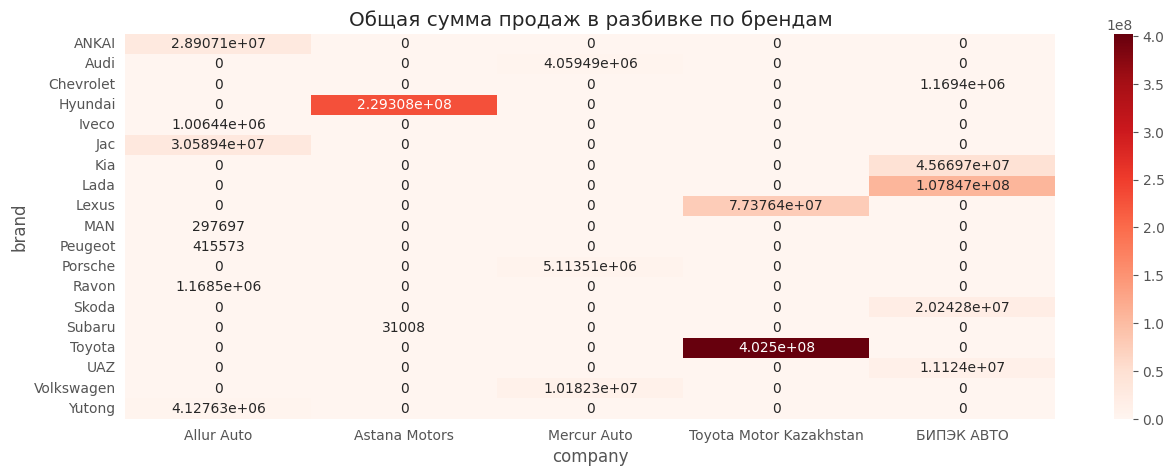

In [ ]:
df = data.query('company in @list_company').pivot_table(index='brand',
                   columns='company',
                   values='sell_price_usd',
                   aggfunc='sum').fillna(0).astype('float')

plt.figure(figsize=(15, 5))
sns.heatmap(df,
            fmt='g',
          annot = True,
           cmap='Reds')
plt.title('Общая сумма продаж в разбивке по брендам')
plt.show()

В продажах по брендам лидируют Toyota Motor Kazakstan (бренд Toyota), Astana Motors (бренд Hyundai) и Бипек Авто (бренд Lada).

Mercur Auto продает автомобили трех брендов: Audi, Porsche, Volkswagen.

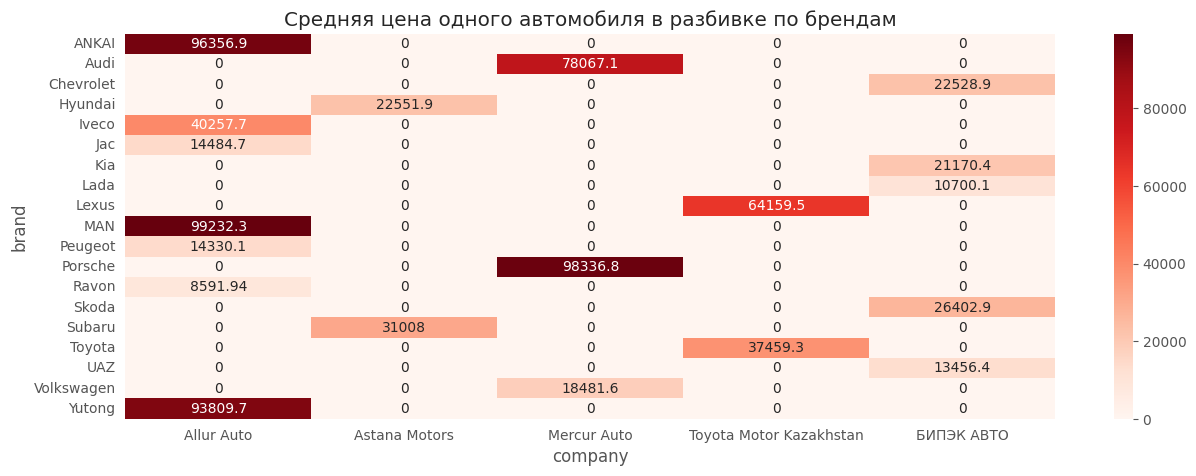

In [ ]:
df = data.query('company in @list_company').pivot_table(index='brand',
                   columns='company',
                   values='price_usd',
                   aggfunc='mean').fillna(0).astype('float')
#df

plt.figure(figsize=(15, 5))
sns.heatmap(df,
            fmt='g',
          annot = True,
           cmap='Reds')
plt.title('Средняя цена одного автомобиля в разбивке по брендам')
plt.show()

Самые дорогие автомобили у компании Allur Auto (бренды MAN, ANKAI, Yutong - производители больших туристических автобусов) и у Mercur Auto (бренд Porche и Audi), То есть компании представляют разные сегменты и не являются конкурентами.

Посмотрим, какая была динамика продаж по компаниям:

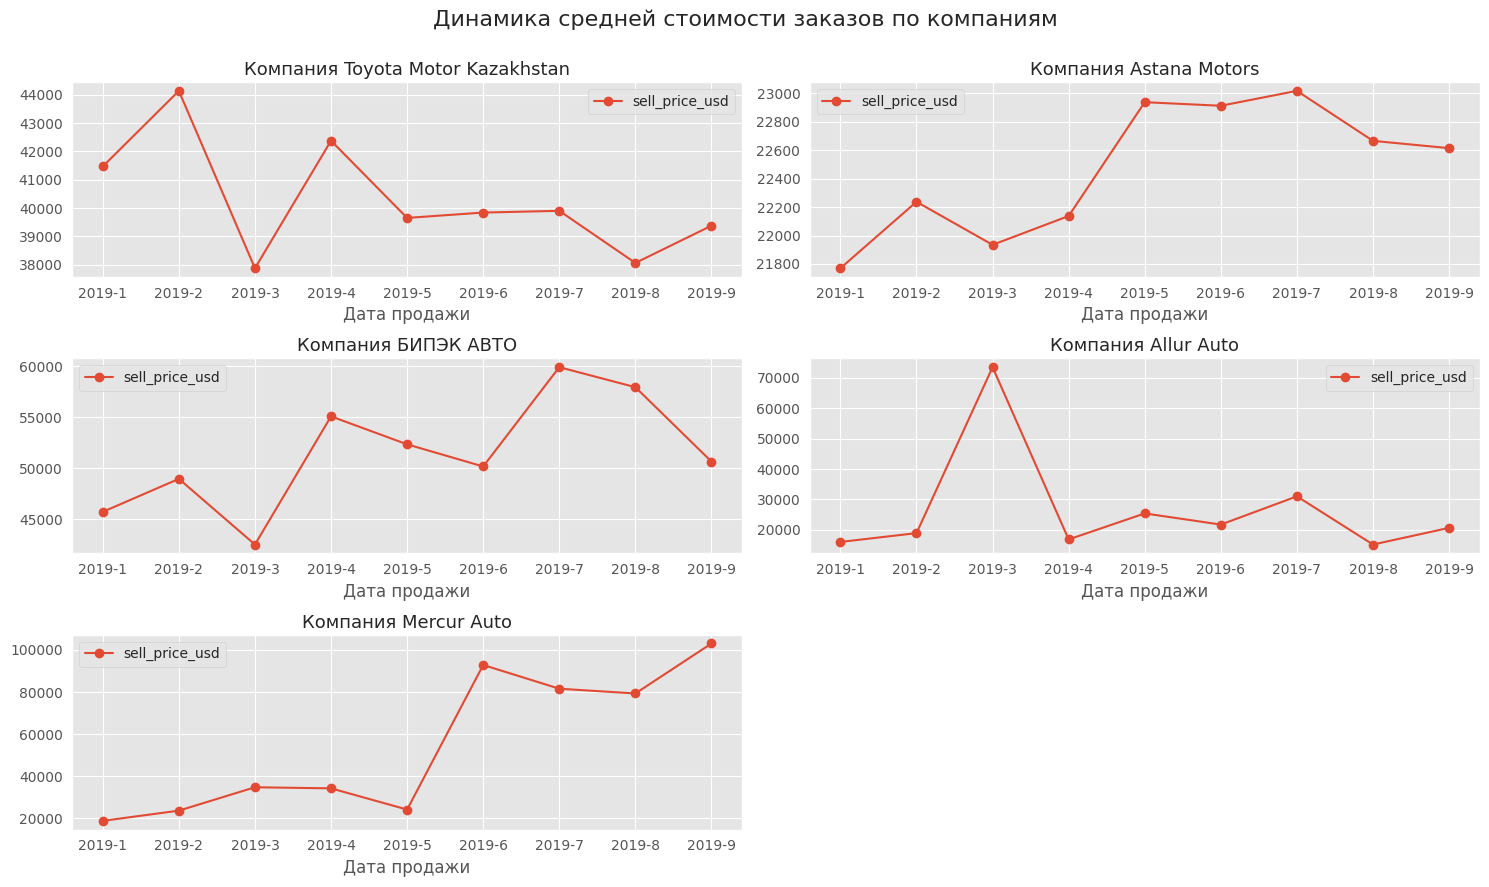

In [ ]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 2 графика
count_plt_row = math.ceil(len(list_company)/2)

plt.figure(figsize=(15, 3 * count_plt_row)).suptitle('Динамика средней стоимости заказов по компаниям',
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот
for counter, i in enumerate(list_company):

    ax = plt.subplot(count_plt_row, 2, counter+1)
    df = data.query('company == @i').groupby('sale_date').agg({'sell_price_usd':'mean'})

    df.plot(ax=ax,
           marker='o',
           grid=True)
    plt.xlabel('Дата продажи')
    plt.title('Компания {}'.format(i), fontsize=13, pad=5)

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.9)
plt.show()

Видим, что у компании Mercur Auto резко выросли средние стоимости заказов в мае и оставались высокими до конца периода.

Похожая динамика у компаний Astana Motors и у БИПЕК АВТО.


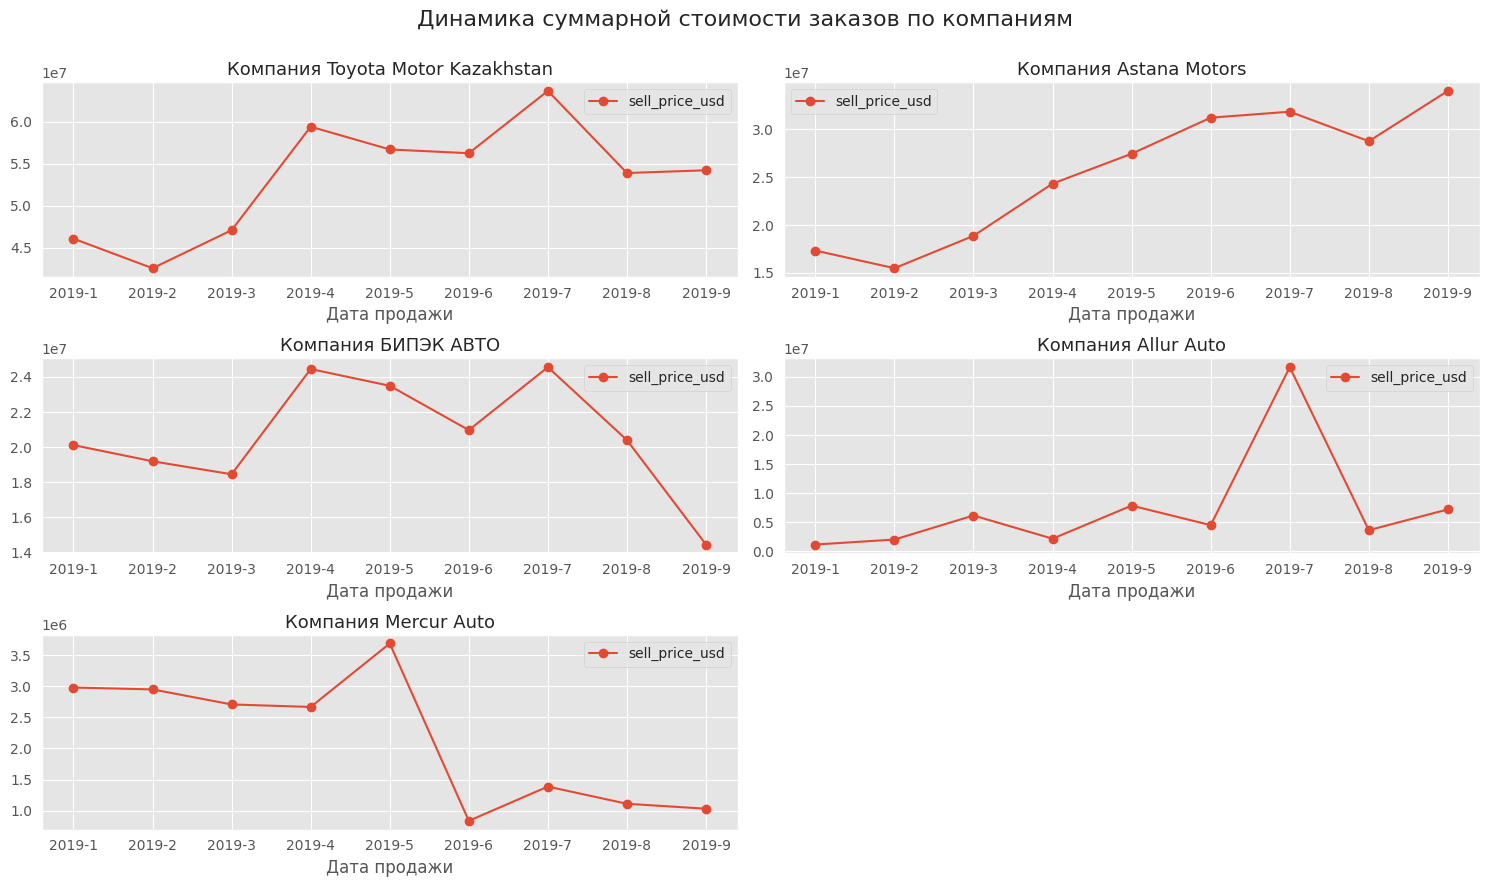

In [ ]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 2 графика
count_plt_row = math.ceil(len(list_company)/2)

plt.figure(figsize=(15, 3 * count_plt_row)).suptitle('Динамика суммарной стоимости заказов по компаниям',
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот
for counter, i in enumerate(list_company):

    ax = plt.subplot(count_plt_row, 2, counter+1)
    df = data.query('company == @i').groupby('sale_date').agg({'sell_price_usd':'sum'})

    df.plot(ax=ax,
           marker='o',
           grid=True)
    plt.xlabel('Дата продажи')
    plt.title('Компания {}'.format(i), fontsize=13, pad=5)

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.9)
plt.show()

Несмотря на то, что средняя стоимость заказов в мае выросла, общая выручка компании при этом резко упала. У компаний-конкурентов продажи оставались на том же уровне либо росли (за исключением Бипек Авто, там картина другая). То есть с мая месяца у компании заказы стали дороже, но количество их уменьшилось.

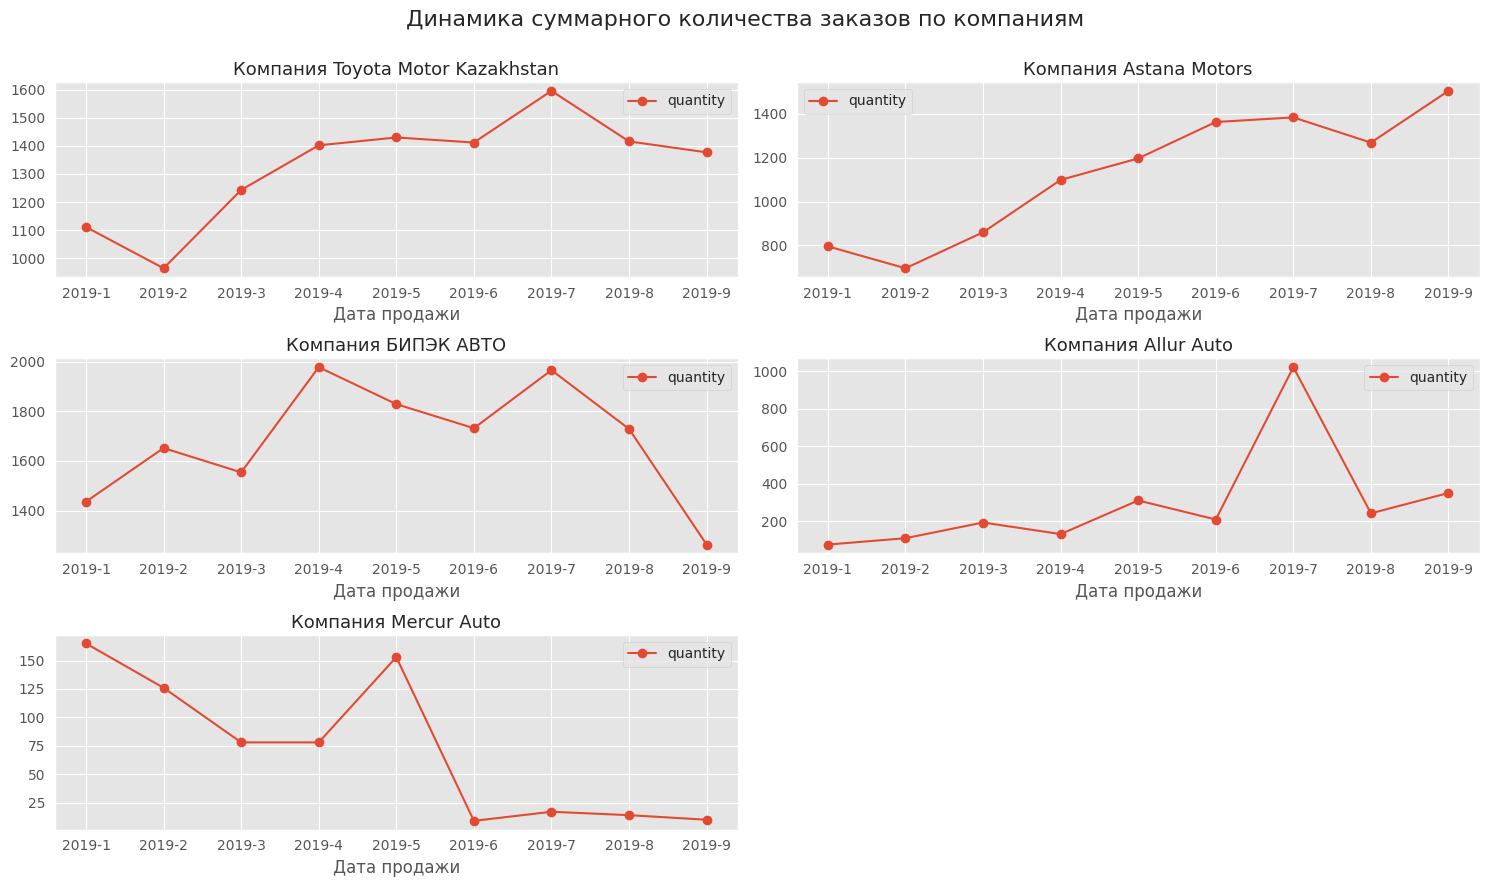

In [ ]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 2 графика
count_plt_row = math.ceil(len(list_company)/2)

plt.figure(figsize=(15, 3 * count_plt_row)).suptitle('Динамика суммарного количества заказов по компаниям',
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот
for counter, i in enumerate(list_company):

    ax = plt.subplot(count_plt_row, 2, counter+1)
    df = data.query('company == @i').groupby('sale_date').agg({'quantity':'sum'})

    df.plot(ax=ax,
           marker='o',
           grid=True)
    plt.xlabel('Дата продажи')
    plt.title('Компания {}'.format(i), fontsize=13, pad=5)

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.9)
plt.show()

Да, график подтверждает падение количества продаж начиная с мая месяца, в то время как у других компаний дела идут хорошо.Следовательно, падение продаж связано не с ситуацией на рынке, а с проблемами самой компании.

Посмотрим на динамику продаж внутри компаний по маркам автомобилей:

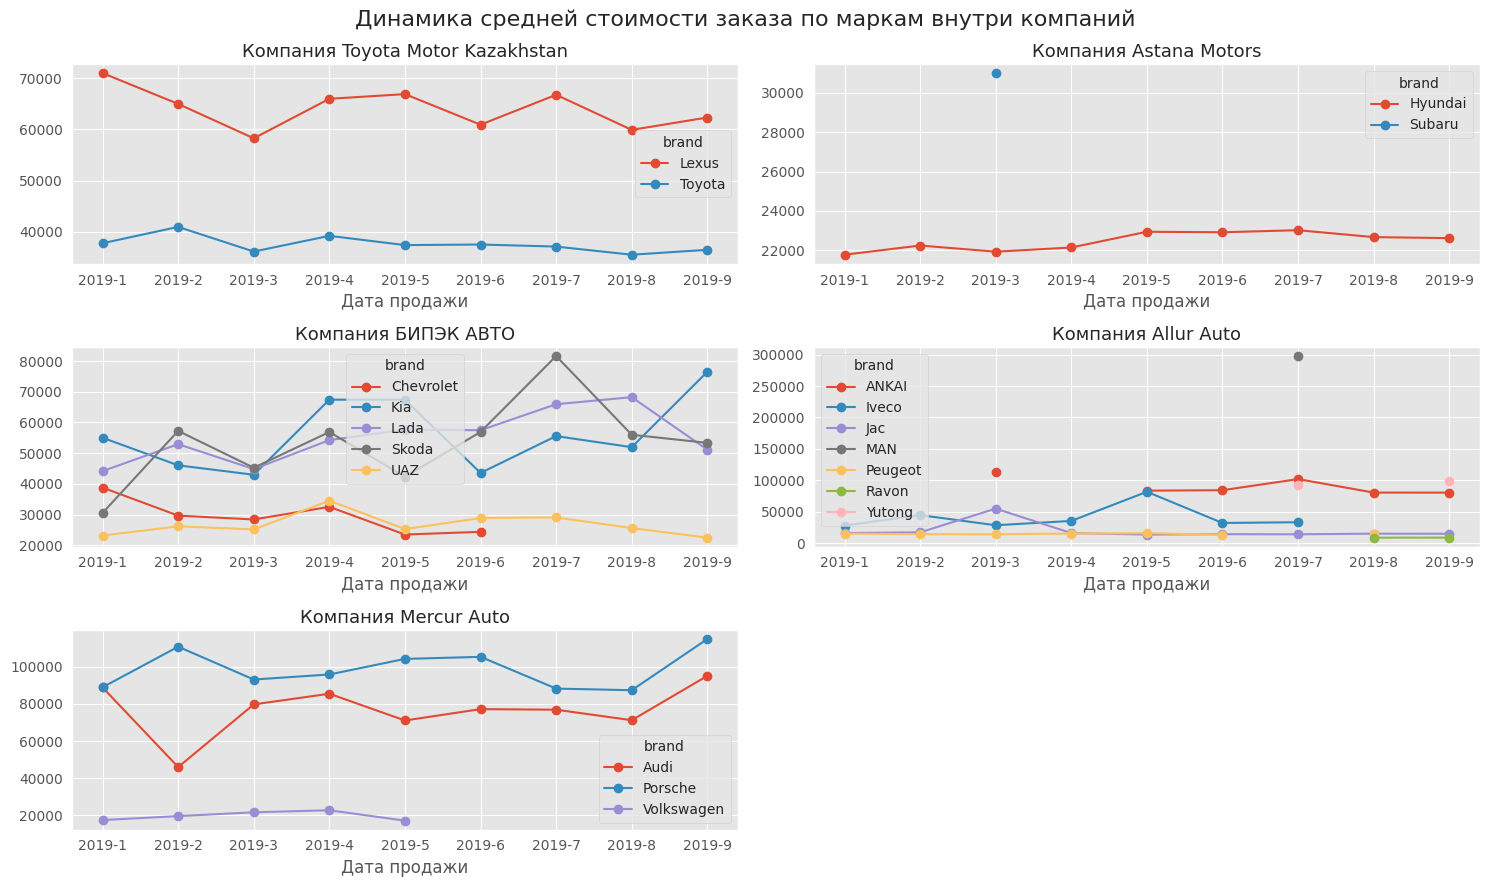

In [ ]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика
count_plt_row = math.ceil(len(list_company)/2)

plt.figure(figsize=(15, 3 * count_plt_row)).suptitle('Динамика средней стоимости заказа по маркам внутри компаний',
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный плот
for counter, i in enumerate(list_company):

    ax = plt.subplot(count_plt_row, 2, counter+1)

    df = data.query('company == @i').pivot_table(index='sale_date',
                            columns='brand',
                            values='sell_price_usd',
                            aggfunc='mean')

    df.plot(ax=ax,
           marker='o',
           grid=True)
    plt.xlabel('Дата продажи')
    plt.title('Компания {}'.format(i), fontsize=13, pad=5)

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.92)
plt.show()



 Важная информация - мы видим, что именно в мае остановились продажи бренда Volkswagen, в то время как заказы Audi и Porche оставались стабильными. То есть ушли более дешевые модели Volkswagen и остались только дорогие Audi и Porche, и именно с этим связаны падения продаж компании в целом.


###4.3. Расчет финансовых показателей Mercur Auto.

Рассчитаем параметры прибыли. По данным заказчика в среднем в стоимости автомобилей заложено 3% прибыли.

Добавим новый столбец:

In [ ]:
data['profit_usd'] = data['sell_price_usd'] * 0.03

In [ ]:
print(f' Общая прибыль по всему рынку Казахстана за рассматриваемый период составила: {data.profit_usd.sum(): .0f} долларов США')

 Общая прибыль по всему рынку Казахстана за рассматриваемый период составила:  40476904 долларов США


Посмотрим топ-15 брендов - лидеров по прибыли:

In [ ]:
data.pivot_table(index='brand', values=['profit_usd'], aggfunc='sum') \
    .sort_values('profit_usd', ascending=False) \
    .head(15)

profit_usd
brand                   
Toyota      1.207500e+07
Hyundai     7.170546e+06
Lada        3.235424e+06
Lexus       2.321291e+06
KAMAZ       1.382781e+06
Kia         1.370091e+06
Nissan      1.200383e+06
GAZ         9.685860e+05
Jac         9.176814e+05
ANKAI       8.672117e+05
BMW         8.620731e+05
Volkswagen  7.767258e+05
Renault     7.255472e+05
Skoda       6.072834e+05
UAZ         5.705781e+05

Бренд Volkswagen компании Mercur Auto вошел в топ-15 компаний по прибыльности.

Оценим среднюю стоимость продажи за исследуемый период:

In [ ]:
print(f' Средняя стоимость продажи автомобиля в Казахстана за рассматриваемый\
 период составила: {data.sell_price_usd.mean():.0f} долларов США')

 Средняя стоимость продажи автомобиля в Казахстана за рассматриваемый период составила: 33759 долларов США


Оценим емкость рынка Казахстана за исследуемый период:

In [ ]:
print(f'Общая емкость рынка за исследуемый период составляет {data.sell_price_usd.sum()/1000000:.0f} миллионов долларов USD')

Общая емкость рынка за исследуемый период составляет 1349 миллионов долларов USD


Оценим общую емкость рынка Казахстана. По данным заказчика, последний квартал приносит 40% продаж от всего предыдущего периода:

In [ ]:
print(f'Общая прогнозируемая годовая емкость рынка составляет {data.sell_price_usd.sum()*1.4/1000000:.0f} миллионов долларов USD')

Общая прогнозируемая годовая емкость рынка составляет 1889 миллионов долларов USD


Проанализиркем позиции компании Mercur Auto:

In [ ]:
print(f'общая доля рынка дилера в количественном выражении \
        {data[data["company"] == "Mercur Auto"]["quantity"].sum()/data.quantity.sum():0.2%}')
print(f'общая доля рынка дилера в стоимостном выражении \
        {data[data["company"] == "Mercur Auto"]["sell_price_usd"].sum()/data.sell_price_usd.sum():0.2%}')

общая доля рынка дилера в количественном выражении         1.21%
общая доля рынка дилера в стоимостном выражении         1.43%


Посмотрим, какие марки продает Mercur Auto:

In [ ]:
merkur_brand = data[data['company'] == "Mercur Auto"].pivot_table(index ='brand',  values =['quantity', 'sell_price_usd'], aggfunc = 'sum')\
  .sort_values('sell_price_usd', ascending = False)
merkur_brand

quantity  sell_price_usd
brand                               
Volkswagen       546    1.018227e+07
Porsche           52    5.113513e+06
Audi              52    4.059490e+06

Mercur Auto является дилером трех брендов: Volkswagen, Porche, Audi

In [ ]:
# присоединим таблицу с общими продажами по брендам, торгуемым дилером
all_brand2 = data.pivot_table(index ='brand',  values =['quantity', 'sell_price_usd'], aggfunc = 'sum')
merkur_brand = merkur_brand.merge(all_brand2, on='brand', how='left')
merkur_brand = merkur_brand.reset_index()
merkur_brand.columns = ['m_brand','merkur_count', 'merkur_sum', 'all_count', 'all_sum']
merkur_brand['count_%'] = merkur_brand['merkur_count']/merkur_brand['all_count']*100
merkur_brand['sum_%'] = merkur_brand['merkur_sum']/merkur_brand['all_sum']*100
merkur_brand

m_brand  merkur_count    merkur_sum  all_count       all_sum  \
0  Volkswagen           546  1.018227e+07       1312  2.589086e+07   
1     Porsche            52  5.113513e+06         52  5.113513e+06   
2        Audi            52  4.059490e+06         52  4.059490e+06   

      count_%       sum_%  
0   41.615854   39.327674  
1  100.000000  100.000000  
2  100.000000  100.000000

Выяснили, что продажи Mercur Auto составляют 100% от общих продаж Porsche и Audi , то есть компания является эксклюзивным дилером, и 39% продаж бренда Volkswagen.

Посмотрим конкурентов Mercur Auto по продажам бренда Volkswagen:

In [ ]:
volkswagen = data[data['brand'] == "Volkswagen"].pivot_table(index ='company',  values =['quantity', 'sell_price_usd'], aggfunc = 'sum')\
  .sort_values('sell_price_usd', ascending = False)
volkswagen

quantity  sell_price_usd
company                                       
Volkswagen Group Rus       664    1.366326e+07
Mercur Auto                546    1.018227e+07
Автодом Motors KST          53    1.064732e+06
Автомир                     34    6.605529e+05
Eurasia Motor Zhaik         15    3.200376e+05

На первом месте по продажам Volkswagen Group Rus, Mercur Auto на втором, затем с большим отставанием Автодом Motors KST, Автомир и Eurasia Motor Zhaik.

Посмотрим, автомобили каких классов продает компания Mercur Auto:

In [ ]:
merkur_class = data[data['company'] == "Mercur Auto"].pivot_table(index ='class_2013',  values =['quantity', 'sell_price_usd'], aggfunc = 'sum')\
  .sort_values('sell_price_usd', ascending = False)
merkur_class

quantity  sell_price_usd
class_2013                                         
B класс                         440    6.418764e+06
Полноразмерные SUV               70    6.114382e+06
Компактные SUV                   81    2.642564e+06
F класс                          13    1.636861e+06
E класс                          10    7.787925e+05
Среднеразмерные SUV              11    6.757897e+05
Полноразмерный Минивэн            5    2.841904e+05
Спортивные автомобили             2    2.698261e+05
Микроавтобусы                     8    2.514111e+05
C класс                           5    1.137962e+05
D класс                           3    9.585800e+04
Pick-ups                          2    7.304155e+04
A класс                           0    0.000000e+00
Средние автобусы                  0    0.000000e+00
Среднетоннажные грузовики         0    0.000000e+00
Крупнотоннажные грузовики         0    0.000000e+00
Развозные автомобили              0    0.000000e+00
Малотоннажные грузовики           0    0.000000e+00
Компактвэн                        0    0.000000e+00
Большие автобусы                  0    0.000000e+00
Субкомпактные SUV                 0    0.000000e+00

В ассортименте представлены все классы, кроме крупных грузовиков и автобусов.

Присоединим общую таблицу с продажами по классам:

In [ ]:
all_class = data.pivot_table(index ='class_2013',  values =['quantity', 'sell_price_usd'], aggfunc = 'sum')
merkur_class = merkur_class.merge(all_class, on='class_2013', how='left')
merkur_class = merkur_class.reset_index()
merkur_class.columns = ['class','merkur_count', 'merkur_sum', 'all_count', 'all_sum']
merkur_class['count_%'] = merkur_class['merkur_count']/merkur_class['all_count']*100
merkur_class['sum_%'] = merkur_class['merkur_sum']/merkur_class['all_sum']*100
merkur_class

class  merkur_count    merkur_sum  all_count  \
0                     B класс           440  6.418764e+06      13848   
1          Полноразмерные SUV            70  6.114382e+06       2567   
2              Компактные SUV            81  2.642564e+06       7347   
3                     F класс            13  1.636861e+06         46   
4                     E класс            10  7.787925e+05        264   
5         Среднеразмерные SUV            11  6.757897e+05       4402   
6      Полноразмерный Минивэн             5  2.841904e+05         50   
7       Спортивные автомобили             2  2.698261e+05         10   
8               Микроавтобусы             8  2.514111e+05        497   
9                     C класс             5  1.137962e+05       4034   
10                    D класс             3  9.585800e+04       5567   
11                   Pick-ups             2  7.304155e+04        976   
12                    A класс             0  0.000000e+00         69   
13           Средние автобусы             0  0.000000e+00        209   
14  Среднетоннажные грузовики             0  0.000000e+00        192   
15  Крупнотоннажные грузовики             0  0.000000e+00       1245   
16       Развозные автомобили             0  0.000000e+00        572   
17    Малотоннажные грузовики             0  0.000000e+00       2073   
18                 Компактвэн             0  0.000000e+00       1774   
19           Большие автобусы             0  0.000000e+00        459   
20          Субкомпактные SUV             0  0.000000e+00       7681   

         all_sum    count_%      sum_%  
0   1.610278e+08   3.177354   3.986122  
1   1.712087e+08   2.726919   3.571302  
2   2.011199e+08   1.102491   1.313924  
3   4.725187e+06  28.260870  34.641187  
4   1.213509e+07   3.787879   6.417690  
5   1.885214e+08   0.249886   0.358468  
6   2.212512e+06  10.000000  12.844696  
7   9.328268e+05  20.000000  28.925635  
8   9.630134e+06   1.609658   2.610671  
9   9.094048e+07   0.123946   0.125133  
10  1.770439e+08   0.053889   0.054144  
11  2.902164e+07   0.204918   0.251680  
12  8.355343e+05   0.000000   0.000000  
13  8.788078e+06   0.000000   0.000000  
14  4.829229e+06   0.000000   0.000000  
15  6.774233e+07   0.000000   0.000000  
16  7.423625e+06   0.000000   0.000000  
17  4.316309e+07   0.000000   0.000000  
18  2.055211e+07   0.000000   0.000000  
19  4.423544e+07   0.000000   0.000000  
20  1.031411e+08   0.000000   0.000000

В некоторых сегментах по классам Mercur Auto имеет повышенную долю рынка, как в количественном, так и вденежном выражении, а именно:автомобили F-класса (28% и 34%), спортивные автомобили (20% и 29%). При этом количество проданных автомобилей в этих сегментах небольшое: 13 шт. и 2 шт.

In [ ]:
data_mercur = data[data["company"] == "Mercur Auto"]


Посмотрим продажи Mercur Auto по моделям автомобилей:

In [ ]:
data_mercur. groupby(['brand', 'model']).agg({'quantity': 'sum'})

quantity
brand      model                       
Audi       A3                         2
           A4                         3
           A6                         8
           A7                         2
           A8                         5
           Q5                         8
           Q7                         3
           Q8                        20
           RS5                        1
Porsche    911 Carrera S              1
           Cayenne                   28
           Macan                     15
           Panamera                   8
Volkswagen Amarok                     2
           Jetta                      3
           Multivan                   3
           Polo                     440
           Teramont                   4
           Tiguan                    81
           Touareg                    3
           Transporter                2
           Transporter Kasten         7
           Transporter Kombi          1

По количеству самые большие продажи были у марки Volgswagen Polo( с большим отрывом) и Tiguan, на третьем месте Porsche Cayenne

Рассмотрим работу дилеров Mercur Auto:

In [ ]:
data_mercur.dealer.unique()

array(['Mercur Auto Алматы', 'Mercur Auto Астана',
       'Porsche Centre Almaty', 'Автодом Костанай', 'Mercur Auto Атырау',
       'Автомир-Центр Караганда', 'Eurasia Motors Uralsk'], dtype=object)

У компании Mercur Auto работают семь дилеров.

Какое количество автомобилей продают дилеры? Сгруппируем по месяцу и количеству проданных автомобилей:

In [ ]:
data_mercur_dealer = data_mercur.groupby(['sale_date','dealer']).agg(cnt = ('quantity','sum')).reset_index()

In [ ]:
data_mercur_dealer

sale_date                   dealer  cnt
0     2019-1       Mercur Auto Алматы  141
1     2019-1       Mercur Auto Астана   16
2     2019-1       Mercur Auto Атырау    5
3     2019-1    Porsche Centre Almaty    1
4     2019-1         Автодом Костанай    2
5     2019-2    Eurasia Motors Uralsk    9
6     2019-2       Mercur Auto Алматы   64
7     2019-2       Mercur Auto Астана   20
8     2019-2       Mercur Auto Атырау    8
9     2019-2    Porsche Centre Almaty    5
10    2019-2         Автодом Костанай    2
11    2019-2  Автомир-Центр Караганда   18
12    2019-3    Eurasia Motors Uralsk    5
13    2019-3       Mercur Auto Алматы   25
14    2019-3       Mercur Auto Астана    4
15    2019-3       Mercur Auto Атырау   12
16    2019-3    Porsche Centre Almaty    7
17    2019-3         Автодом Костанай   20
18    2019-3  Автомир-Центр Караганда    5
19    2019-4    Eurasia Motors Uralsk    1
20    2019-4       Mercur Auto Алматы   47
21    2019-4       Mercur Auto Астана   13
22    2019-4       Mercur Auto Атырау    8
23    2019-4    Porsche Centre Almaty    8
24    2019-4         Автодом Костанай    1
25    2019-5       Mercur Auto Алматы  133
26    2019-5       Mercur Auto Астана    1
27    2019-5       Mercur Auto Атырау   10
28    2019-5    Porsche Centre Almaty    8
29    2019-5         Автодом Костанай    1
30    2019-6       Mercur Auto Алматы    4
31    2019-6    Porsche Centre Almaty    5
32    2019-7       Mercur Auto Алматы    9
33    2019-7       Mercur Auto Астана    1
34    2019-7    Porsche Centre Almaty    7
35    2019-8       Mercur Auto Алматы    5
36    2019-8       Mercur Auto Астана    2
37    2019-8    Porsche Centre Almaty    7
38    2019-9       Mercur Auto Алматы    5
39    2019-9       Mercur Auto Астана    1
40    2019-9    Porsche Centre Almaty    4

Лидирует дилер Mercur Auto Алмааты.

In [ ]:
merkur_region = data[data['company'] == "Mercur Auto"]['region'].unique()
merkur_region

array(['Алматы', 'Нур-Султан', 'Костанай', 'Атырау', 'Караганда',
       'Уральск'], dtype=object)

Компания представлена в шести регионах.

Посмотрим на суммы продаж в разрезе регионов и компаний:

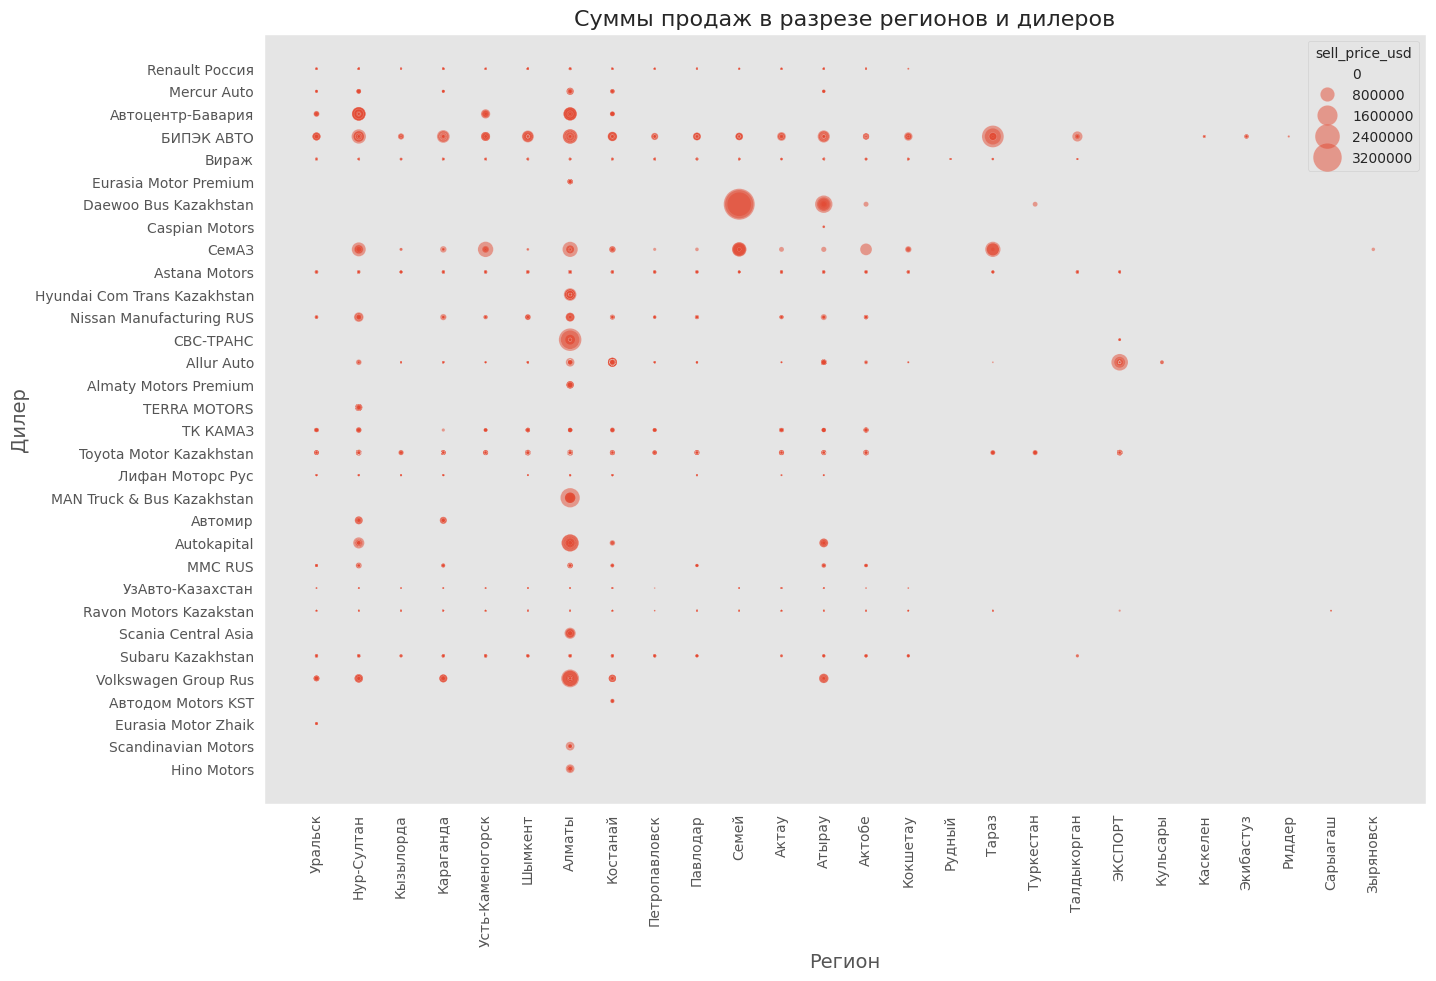

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=data,  x='region', y='company',  size='sell_price_usd',\
                sizes=(0, 500), alpha=.5)
plt.title('Суммы продаж в разрезе регионов и компаний', size = 16)
plt.ylabel('Дилер', size = 14)
plt.xlabel('Регион', size = 14)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

Посмотрим на суммы продаж в разрезе классов автомобилей и компаний:

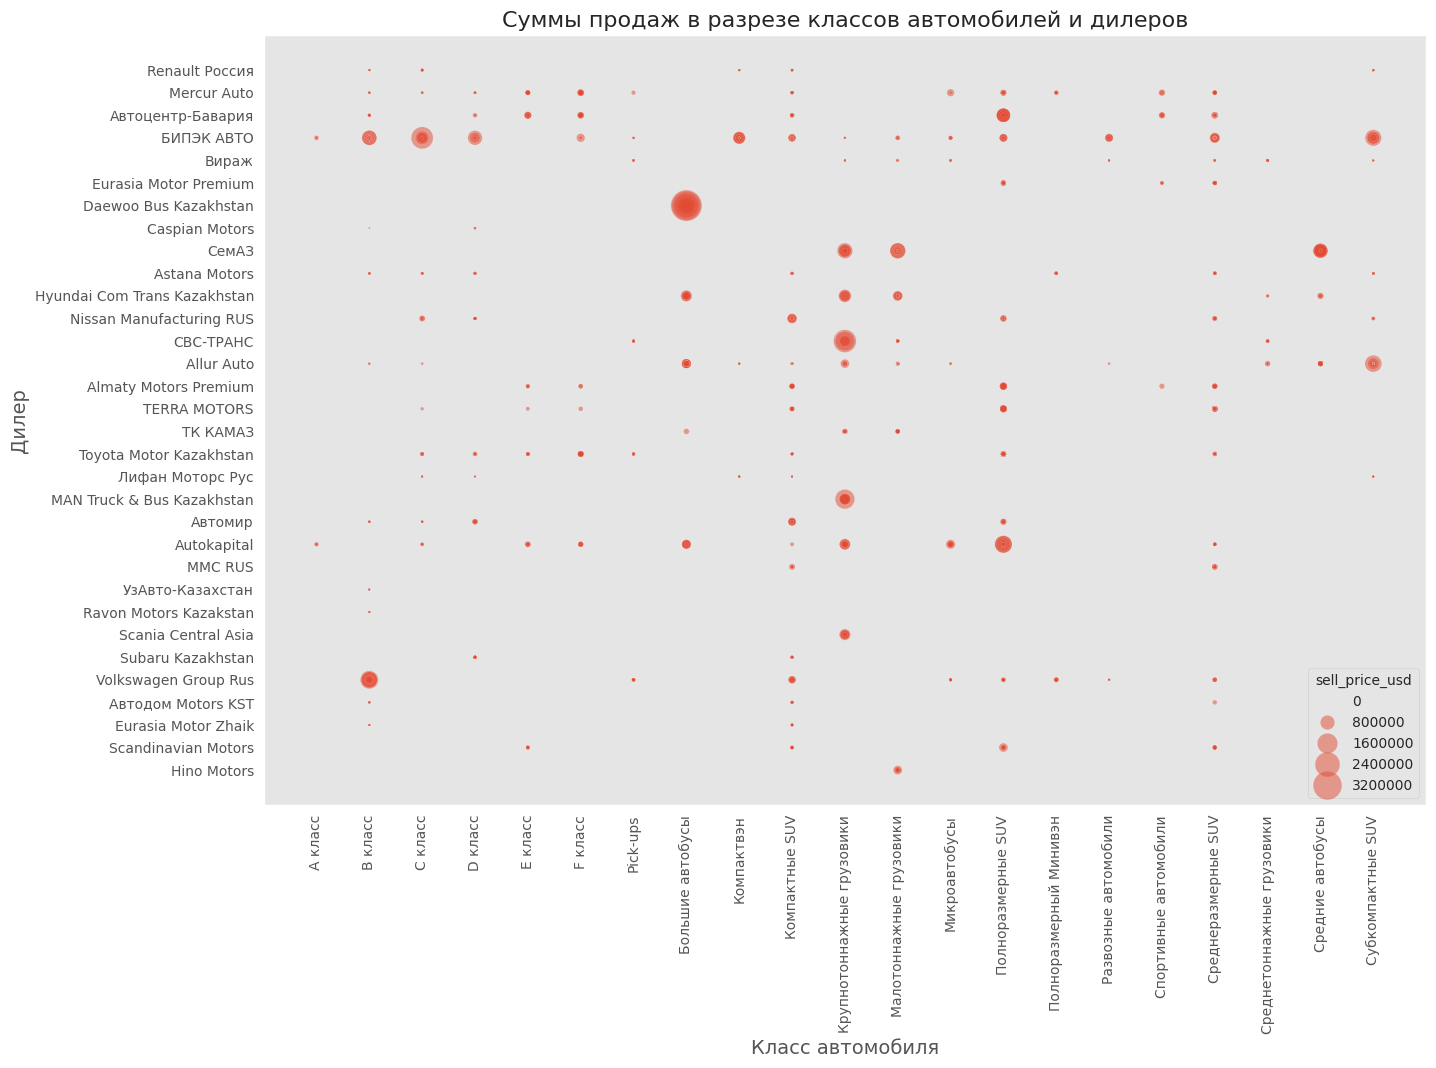

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=data,  x='class_2013', y='company',  size='sell_price_usd',\
                sizes=(0, 500), alpha=.5)
plt.title('Суммы продаж в разрезе классов автомобилей и компаний', size = 16)
plt.ylabel('Дилер', size = 14)
plt.xlabel('Класс автомобиля', size = 14)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

 ## Выводы и рекомендации

### Выводы по исследованию рынка

- В исслелуемом датасете были представлены данные за 2019 год;

- Год выпуска автомобилей с 2011 года до 2018 год;

- Объем двигателя от 1.2 до 13 л;

 - Максимально кол-во, купеленное за одну сделку - 115 автомобилей;

 - Максимальная цена в рамках одной сделки - 328 510 USD, максимальный заказ - 3 778 млн. USD;

- Основной объем датасета представлен автомобилями 2017-2018 года выпуска. Т.к. датасет у нас за 2019 год, то можем сделать вывод, что по всем диллерам основные продажи идут автомобилями прошлого года выпуска и позапрошлого;

- Самые частые частые продажи по 1 шт, однако есть достаточное кол-во оптовых продаж для юридических лиц;

- Наиболее частая цена авто - от 15 до 34 тыс долларов. В рамках отдельных сделок цена автомобиля доходит до 328,5 тыс долларов;

- Наиболее частотные значения суммы итоговой продажи находятся примерно на том же уровне, что и цена одного автомобиля - потому что самая частая сделка включает 1 автомобиль;

**Лидеры по количеству продаж:**

- страны-производители - РФ и Казахстан, на третьей позиции с отставанием в три раза - Япония;

- компания - Тойота Мотор Казахстан, далее в два раза меньше - Астана Моторс, БИПЭК Авто и Вираж;

- бренд автомобиля - Toyotа и Hyundai;

- регионы продаж - Алматы и Астана;

- месяцы продаж - с мая по сентябрь;

- вид топлива - бензин вне конкуренции;

- тип коробки передач - автомат и механика;

- тип привода - полный и передний;

- по сегментации - внедорожники и легковые автомобили;

- по классу - В-класс, Компактные SUV;

-доля  импорта и локального производства практически равны;

- физические лица покупают чаще юридических лиц;**

- Обнаружена высокая положительная корреляция между ценой и объемом двигателя, что подтверждает известный факт, что с чем больше объем двигателя, тем выше цена
Общая сумма продаж среди всех диллеров меньше зависит от объема двигателя. Это обусловленно большими закупками автомобителей с маленьким объемом в рамках одной сделки;

**Бренды - лидеры рынка:**

- по количеству проданных машин - бренды Lada и Toyota, далее идет Hyundai, остальные марки примерно на одном уровне - GAZ, Kia, Ravon, Nissan, Renault, UAZ, Lexus;

- по суммарным ценам автомобилей  - Toyota с большим отрывом, далее Hyundai, на третьем месте Lexus;

- по суммарным суммам сделок - также с большим отрывом лидер Toyota, далее Hyundai, на третьем месте Lada и на четвертом Lexus;

**Динамика продаж:**
- как по всему рынку по количеству машин, так и по суммарной цене и общей сумме сделок имеет одинаковую тенденцию - подъем с февраля с резким скачком начиная с мая и небольшим спадом в июле и с последующим нарастанием в августе;

- по типу топлива видим среди бензиновых двигателей самые большие продажи. Тренды совпадают с общей динамикой по рынку. Пик продаж приходит с мая по сентябрь;

- легковые авто растут в продажах по количеству с мая по июнь, далее немного падают. Цена авто и сумма сделки имеет такую же динамику;

- внедорожники за исключением небольших провалов в марте и июле имеют рост по всем показателям на протяжении всего года;


**Лидеры продаж по классам автомобилей:**

- Лады в В классе, далее идет Тойота Е класс и Лада Субкомпактные SUV;

**Регионы-лидеры рынка:**

- Алматы и Астане. Больше всего машин продается в Тойота Моторс Казахстан в Алматы. Его главный конкурент в этом же регионе - Астана Моторс и БИПЭК Авто.







### Выводы по анализу Mercur Auto

- Выяснили, что компания занимает девятое место по суммам продаж и одиннадцатое место по колличеству проданных автомобилей. Лидеры по выручке и продажам - БИПЭК АВТО, Тойота Мотор Казахстан, Астана Моторс, Вираж;

- В продажах по брендам лидируют Toyota Motor Kazakstan (бренд Toyota), Astana Motors (бренд Hyundai) и Бипек Авто (бренд Lada);

- Mercur Auto является дилером трех брендов: Volkswagen, Porche, Audi, при этом для Porche и Audi он является эксклюзивным дистрибьютером, а Volkswagen на рынке Казахстана представляют- еще четыре компании. На первом месте по продажам Volkswagen Group Rus, Mercur Auto на втором, затем с большим отставанием Автодом Motors KST, Автомир и Eurasia Motor Zhaik;

- Самые дорогие автомобили у компании Allur Auto (бренды MAN, ANKAI, Yutong - производители больших туристических автобусов) и у Mercur Auto (бренд Porche и Audi), то есть компании представляют разные сегменты и не являются конкурентами;

- Изучение динамики продаж выявило, что в мае 2019 года у компании полностью остановились продажи автомобилей более дешевого бренда Volkswagen, продажи люксовых Porsche и Audi оставались на стабильном уровне;-

- Определили общую прогнозируемую годовую емкость рынка, она составляет 1889 миллионов долларов USD. Общая доля рынка дилера Mercur Auto в количественном выражении  - 1.21%, в стоимостном выражении - 1.43%;

- Компания продает автомобили всех классов, кроме крупных грузовиков и автобусов.
В некоторых сегментах по классам Mercur Auto имеет повышенную долю рынка, как в количественном, так и вденежном выражении, а именно:автомобили F-класса (28% и 34%), спортивные автомобили (20% и 29%). При этом количество проданных автомобилей в этих сегментах небольшое: 13 шт. и 2 шт.;

- По количеству самые большие продажи были у марки Volgswagen Polo( с большим отрывом) и Tiguan, на третьем месте Porsche Cayenne;-

- У компании Mercur Auto работают семь дилеров: 'Mercur Auto Алматы', 'Mercur Auto Астана', 'Porsche Centre Almaty', 'Автодом Костанай', 'Mercur Auto Атырау', 'Автомир-Центр Караганда', 'Eurasia Motors Uralsk' в шести регионах:'Алматы', 'Нур-Султан', 'Костанай', 'Атырау', 'Караганда','Уральск'.


### Рекомендации по итогам анализа:

- в настоящий момент компания продает только люксовые автомобили Porsche и Audi в самых развитых регионах страны. Продажи буквально штучные и вряд ли обеспечат значительное увеличение продаж в будущем;

- поэтому основная задача компании -расширить линейку брендов и моделей более дешевых по ценам;

- для этого рекомендуется  найти новый бренд на замену ушедшему бренду Volkswagen, продажи которого приносили основную прибыль компании. А именноподобрать подходящие  аналоги моделям Polo и Tiguan;

- компания представляет немецкие концерны, так что было бы логично дополнить список брендом BMW, который находится в рейтинге прибыльности продаж на 11 месте, опережая Volkswagen, и брендом Skoda, как более доступном по ценам, но тоже достаточно прибыльном.

- так же рекомендуется рассмотреть возможность  пополнения ассортимента азиатскими брендами  лидерами продаж по рынку Toyota или Huyndai, или менее популярными, но тоже очень прибыльны Kia, Lexus, Nissan;

- после расширения линейки брендов и моделей от люксовых автомобилей в сторону бизнес-класса или даже эконом-класса стоит рассмотреть возможность открытия дополнительных  дилерских центров в новых регионах.